In [4]:
library(dplyr)
library(Seurat)
library(DropletUtils)  
library(celldex)
library(SingleR)
library(ggplot2)
library(patchwork)
library(tidyverse)
library(Seurat)
library(SeuratData)
library(SeuratDisk)
library('CellMixS')
library(vegan)

library(scbp)

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowC

In [5]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX',
              'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 
              'SarcomaS914GEX', 'SarcomaS956GEX' )



In [6]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX',
              'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 
              'SarcomaS914GEX', 'SarcomaS956GEX' )

minFeature <- 300
maxFeature <- 7500
minCount <- 600
maxCount <- 40000
maxMT <- 10
object.list <- lapply(pat_list, function (x) readRDS(paste0('data/', x, "/", x, "_cnv_non_malignant.rds")))
tumor.list <- lapply(pat_list, function (x) readRDS(paste0('data/', x, "/", x, "_cnv_malignant.rds")))
all_cells.list <- lapply(pat_list, function (x) readRDS(paste0('data/', x, '/data_', x, '_genes_', minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))


In [7]:
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX',
              'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 
              'SarcomaS914GEX', 'SarcomaS956GEX' )

object.list <- lapply(pat_list, function (x) readRDS(paste0('data/', x, "/data_", x, "_annotated_numbat.rds")))
tumor.list <- lapply(object.list, function(x) subset(x, subset = compartment_opt=='tumor'))

In [8]:
tumor_cells= 0
cells = 0
for (x in tumor.list){
    tumor_cells = tumor_cells + length(Cells(x))
    }
for (x in object.list){
    cells = cells + length(Cells(x))
    }
cells-tumor_cells


[1] 29046

In [9]:
tumor_cells

[1] 46670

In [10]:
samp1_167_S410.list <- c(tumor.list[[1]], tumor.list[[6]])
samp1_167_S410.list <- lapply(X = samp1_167_S410.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = samp1_167_S410.list)
samp1.anchors <- FindIntegrationAnchors(object.list = samp1_167_S410.list, anchor.features = features)


Warning message in CheckDuplicateCellNames(object.list = object.list):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."
Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5620 anchors

Filtering anchors

	Retained 1896 anchors



In [11]:
samp1_167_S410 <- IntegrateData(anchorset = samp1.anchors)


Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [12]:
DefaultAssay(samp1_167_S410) <- "integrated"

# Run the standard workflow for visualization and clustering
samp1_167_S410 <- ScaleData(samp1_167_S410, verbose = FALSE)
samp1_167_S410 <- RunPCA(samp1_167_S410, npcs = 30, verbose = FALSE)
samp1_167_S410 <- RunUMAP(samp1_167_S410, reduction = "pca", dims = 1:30)
samp1_167_S410 <- FindNeighbors(samp1_167_S410, reduction = "pca", dims = 1:30)
samp1_167_S410 <- FindClusters(samp1_167_S410, resolution = 0.5)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
16:50:56 UMAP embedding parameters a = 0.9922 b = 1.112

16:50:56 Read 7707 rows and found 30 numeric columns

16:50:56 Using Annoy for neighbor search, n_neighbors = 30

16:50:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:50:57 Writing NN index file to temp file /tmp/RtmpjT2Eaa/file16e877e739c9

16:50:57 Searching Annoy index using 1 thread, search_k = 3000

16:51:00 Annoy recall = 100%

16:51:01 Commencing smooth kNN distance calibration using 1 thread

16:51:03 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7707
Number of edges: 296741

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8420
Number of communities: 10
Elapsed time: 0 seconds


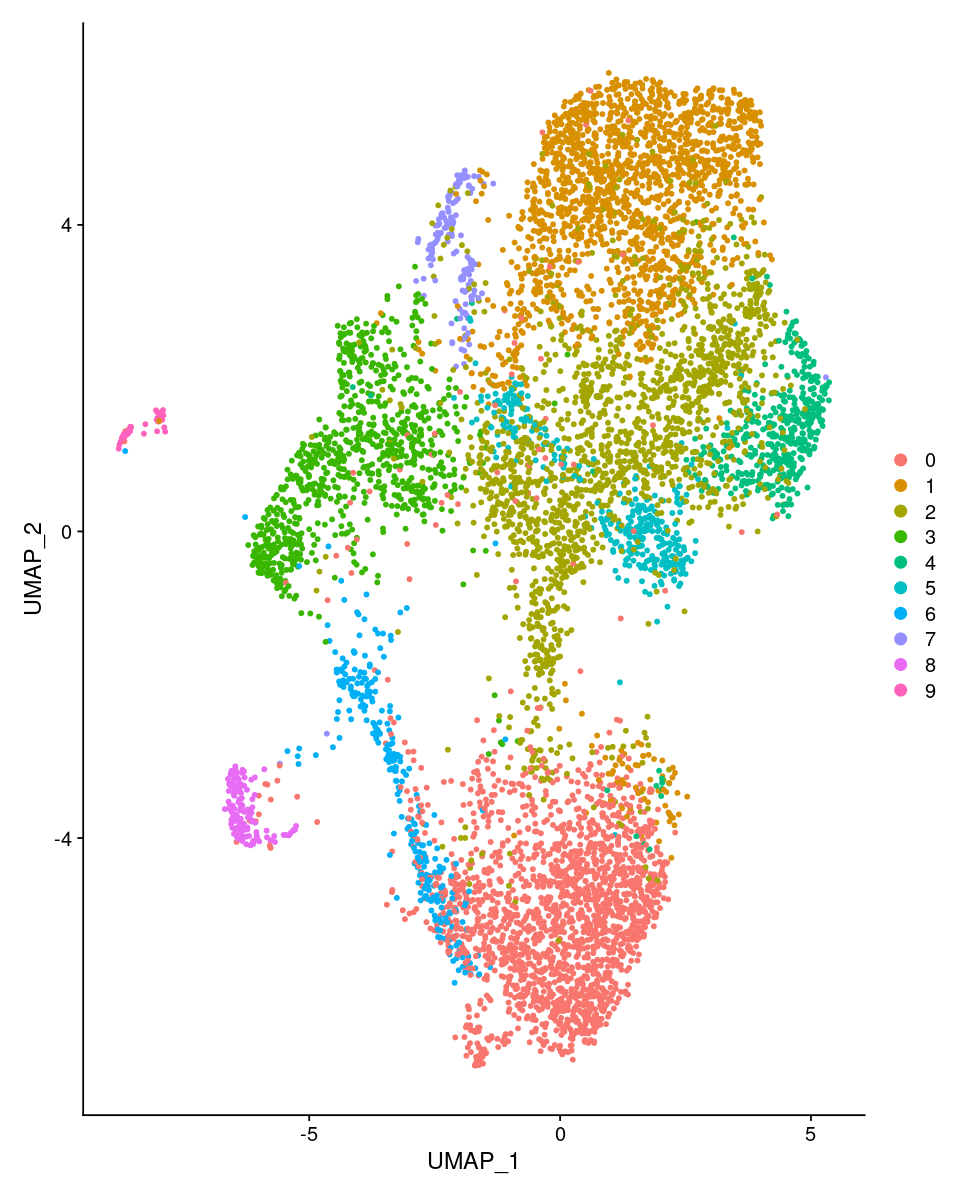

In [13]:
options(repr.plot.width=8, repr.plot.height=10)

DimPlot(samp1_167_S410, pt.size = 1)

In [14]:
Idents(samp1_167_S410) <- 'orig.ident'
Idents(samp1_167_S410)
mark.167_S410 <- FindAllMarkers(samp1_167_S410, min.pct = 0.25)

GATTCAGAGCCGATTT-1_1 ATCGAGTGTGCTTCTC-1_1 CTAGAGTGTTCCCGAG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TCTGAGACAATCCAAC-1_1 GCATGATAGTGACTCT-1_1 GAACCTAGTTTCCACC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
CATCAGAAGCTTTGGT-1_1 GTTCGGGCACAGACAG-1_1 CATGCCTTCCAAATGC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GACAGAGTCGGATGTT-1_1 GCTGCAGAGGGATACC-1_1 GGAACTTCACATGTGT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GTCATTTGTCATACTG-1_1 CACAGTATCTTTAGGG-1_1 GTTAAGCAGCAACGGT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GTTACAGTCGGTCCGA-1_1 CTCCTAGCAGTCCTTC-1_1 TCGAGGCAGACTAAGT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
CAACCTCCACAGACAG-1_1 ATCTACTAGAGTAAGG-1_1 TTTGTCATCGTTACAG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TCGAGGCTCACTTACT-1_1 CATTCGCAGCGTTTAC-1_1 CACTCCAAGCAATATG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GAAGCAGCACAGCGTC-1_1 ATCATCTCAGCCAATT-1_1 TTGCGTCTCGCGGATC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TTGTAGGCAATGAATG-1_1 GATGAGGAGAAGATTC-1_1 TTGCCGTCAAATACAG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GGATTACCATTCACTT-1_1 GCTGGGTAGGATCGCA-1_1 CGTCACTCAAGGTTTC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TACTCGCAGCAGCCTC-1_1 CTAGAGTAGGCCGAAT-1_1 GTTACAGCAGCAGTTT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
CCTATTAAGTGATCGG-1_1 GACGGCTTCATAGCAC-1_1 CCACTACAGTAGCCGA-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TGCTGCTTCAGTTTGG-1_1 TCAGCAACACTACAGT-1_1 CCGTTCACAGTAACGG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
AATCGGTCATTGGCGC-1_1 ACATGGTGTGAAATCA-1_1 AGATCTGGTGCCTGGT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
CGTCAGGAGGGAACGG-1_1 TGAGCCGAGTGGGTTG-1_1 ACGATGTAGATCGGGT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GTCATTTCACTCTGTC-1_1 CAAGATCAGAGTACAT-1_1 TGATTTCGTGGACGAT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GGTGTTAAGAGGTAGA-1_1 AACACGTAGGTGGGTT-1_1 ACCCACTGTCAAGCGA-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
ACGTCAATCCAAACTG-1_1 TAGAGCTAGACTCGGA-1_1 CTCGGGAGTGCACTTA-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
AGGTCCGCAAGCCGTC-1_1 CGAGCCAGTGAGGGTT-1_1 TGCTACCAGCCGATTT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
CATCGGGCAAAGGTGC-1_1 GGTGAAGCATATGCTG-1_1 GACCAATCAGCCTTTC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
CGGAGTCGTCCTCTTG-1_1 GTTAAGCAGGCAGTCA-1_1 GGAAAGCGTAAATGTG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GGAGCAACATGGTCTA-1_1 CGACTTCCAGTCGTGC-1_1 CAACCAATCGAGGTAG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TAGGCATAGTCGTACT-1_1 TGAAAGACAAGTTGTC-1_1 ACACTGAAGTCGTACT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TGGTTAGCACGAAGCA-1_1 TCTGAGAAGACAATAC-1_1 TCGCGAGGTGTTTGTG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
AGCTCCTTCAACGGCC-1_1 TGCGCAGTCCTGCTTG-1_1 ACAGCTACACCGTTGG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GCGGGTTCAAAGGTGC-1_1 GTGGGTCAGTCTCCTC-1_1 TTCTTAGGTAGGGTAC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GCGCCAAGTCCTAGCG-1_1 CATTCGCGTGAGCGAT-1_1 TAAGTGCGTGAGTGAC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GTACTTTTCAAGGCTT-1_1 TGTTCCGAGAACAACT-1_1 CAGCAGCGTTGCCTCT-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
AGCTCTCTCTTGTATC-1_1 CTCACACTCATTCACT-1_1 GTGAAGGAGGCTAGAC-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
GATCGCGGTAGGCTGA-1_1 GACAGAGGTAAATACG-1_1 GTCACAAAGTGTCCCG-1_1 
       Sarcoma167GEX        Sarcoma167GEX        Sarcoma167GEX 
TGCCAAACACCCTATC-1_1 TTCTCAATCGC

Calculating cluster Sarcoma167GEX

Calculating cluster SarcomaS410GEX



In [15]:
mark.167_S410[mark.167_S410$cluster == "Sarcoma167GEX" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene


[1] "AC124254.2"  "AC093895.1"  "DPP6"        "F13A1"       "ZNF804B"    
  [6] "LINC02253"   "AOAH"        "SLC26A7"     "TBXAS1"      "F5"         
 [11] "ADAM28"      "SGO1-AS1"    "RAD51AP1"    "DPY19L2"     "DACH2"      
 [16] "NCAPG"       "CDH6"        "KCNQ3"       "MARCH1"      "AC073050.1" 
 [21] "PTCHD1-AS"   "PI15"        "AC010967.1"  "FYB1"        "MRC1"       
 [26] "SNHG31"      "SPC25"       "CENPE"       "KCNMB2"      "KCNN2"      
 [31] "CD36"        "NTRK3"       "ACSM3"       "TLR2"        "RNLS"       
 [36] "ECT2"        "PXDNL"       "GAS2L3"      "EXOC6"       "LINC01619"  
 [41] "CNTNAP2"     "AC105094.2"  "ANLN"        "DIAPH3"      "STUM"       
 [46] "RGS1"        "ELMO1"       "KIF20B"      "IFI44L"      "BRCA2"      
 [51] "CENPK"       "FMO1"        "APOLD1"      "FRMD5"       "LINC01602"  
 [56] "MAOB"        "KCNJ8"       "AC120193.1"  "AC098829.1"  "BARD1"      
 [61] "MAP2"        "AC073529.1"  "FRMD3"       "ARHGAP20"    "NGF"        
 [66] "HTR2A"       "ACTA2"       "GRID2"       "ZNF730"      "AL033504.1" 
 [71] "LINC01505"   "VGLL3"       "RFC3"        "MYO3A"       "DTNA"       
 [76] "LRFN5"       "AL096854.1"  "CLSTN2"      "KCNB2"       "LEF1"       
 [81] "BBOX1-AS1"   "FGF7"        "ADGRF5"      "AP003486.2"  "TRPA1"      
 [86] "PCDH9"       "DLEU1"       "TMEFF2"      "PTPRZ1"      "CACNB2"     
 [91] "ATRNL1"      "AC083837.1"  "SMOC2"       "BX284613.2"  "RYR2"       
 [96] "EPSTI1"      "BRIP1"       "AC093607.1"  "PRSS12"      "GALR1"      
[101] "LINC01088"   "EZH2"        "GPM6B"       "HDAC9"       "TXNIP"      
[106] "MERTK"       "NFIA"        "IL1RAPL1"    "AFF2"        "LUZP2"      
[111] "CEP128"      "CCDC102B"    "FAM200B"     "RBMS3"       "KCNQ5"      
[116] "SAMD5"       "NLGN4X"      "SP110"       "AC097512.1"  "CENPP"      
[121] "COBLL1"      "EBF1"        "AL691420.1"  "THRB"        "GPSM2"      
[126] "PCGF5"       "TEX41"       "AL365295.1"  "MMS22L"      "TRIM22"     
[131] "RAPGEF5"     "CPEB2"       "EFNA5"       "TSHZ1"       "ZFPM2"      
[136] "GBP1"        "TRPM3"       "CAMK2D"      "GPC6"        "NXPH2"      
[141] "GTDC1"       "LINC00607"   "ADAMTS9-AS2" "LINC02615"   "PBX3"       
[146] "AC079142.1"  "XRCC4"       "NEB"         "STK32B"      "ZBTB20"     
[151] "ZEB2"        "GPC3"        "SLC8A1"      "FAM110B"     "CASC15"     
[156] "JAKMIP2"     "ATAD2"       "LHFPL6"      "PDE8B"       "ZCCHC7"     
[161] "PLXDC2"      "ALPK1"       "SEC22B"      "NFIB"        "G2E3"       
[166] "PRKACB"      "PARD3B"      "EBF2"        "NHS"         "ANK2"       
[171] "ALDH1A3"     "SH3GL3"      "MSC-AS1"     "TCF4"        "SETBP1"     
[176] "ADGRL3"      "PDGFD"       "ARL15"       "ANKS1B"      "LINC01592"  
[181] "SLCO5A1"     "NCALD"       "AC011346.1"  "FAT3"        "DGKB"       
[186] "RBPJ"        "ARRDC3"      "ITGA1"       "FBXL7"       "AC107223.1" 
[191] "AC024901.1"  "AC104596.1"  "CDH18"       "KNTC1"       "CAMKMT"     
[196] "SLIT3"       "MEF2C"       "SLCO3A1"     "CYP7B1"      "DCLK1"      
[201] "SLIT2"       "DIAPH2"      "NAV3"        "EGFLAM"      "NOS1AP"     
[206] "TSHZ2"       "LDB2"        "PRICKLE1"    "DPYD"        "FOXP1"      
[211] "POLA1"       "SEMA5A"      "PARD3"       "CDK14"       "PDE3A"      
[216] "DLC1"        "ADGRA3"      "CACNA2D1"    "UBA6-AS1"    "BNC2"       
[221] "SLC24A3"     "AC046134.2"  "CNNM2"       "MEG8"        "MIR924HG"   
[226] "FBXL17"      "HPSE2"       "LINC00882"   "SOX5"        "LINC02328"  
[231] "LRCH2"       "SEMA3A"      "GASK1B"      "KIAA1324L"   "MEF2A"      
[236] "IGFBP5"      "FHIT"        "CMSS1"       "MEIS2"       "SGIP1"      
[241] "LINC01473"   "HS2ST1"      "NCKAP5"      "SDK1"        "PIEZO2"     
[246] "BRINP3"      "ATP13A3"     "INPP4B"      "AC114763.1"  "BICC1"      
[251] "NOX4"        "RORA"        "UNC5C"       "EXOC4"       "RAB28"      
[256] "TRPS1"       "PPP3CA"      "PREX2"       "AL035401.1"  "PBX1"       
[261] "LINC01060"   "RYR3"        "MAML2"       "M

In [16]:
mark.167_S410[mark.167_S410$cluster == "SarcomaS410GEX" & mark.167_S410$p_val_adj < 0.05 &  
              mark.167_S410$avg_log2FC >0, ]


p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster       
CXCL6.1       0.000000e+00 0.5563693  0.265 0.042  0.000000e+00 SarcomaS410GEX
PRDM1.1       0.000000e+00 0.5095758  0.265 0.042  0.000000e+00 SarcomaS410GEX
MEDAG.1       0.000000e+00 0.3419378  0.270 0.057  0.000000e+00 SarcomaS410GEX
CARD11.1      0.000000e+00 0.2513289  0.256 0.118  0.000000e+00 SarcomaS410GEX
SDC4.1       1.532467e-306 0.3523845  0.265 0.079 3.064933e-303 SarcomaS410GEX
EGR1.1       2.845167e-280 0.4003913  0.266 0.111 5.690334e-277 SarcomaS410GEX
MIR34AHG.1   1.510711e-267 0.8175764  0.280 0.066 3.021421e-264 SarcomaS410GEX
RIPOR3.1     4.060056e-261 0.3948131  0.283 0.104 8.120111e-258 SarcomaS410GEX
MMP3.1       1.470651e-259 0.8856801  0.303 0.001 2.941302e-256 SarcomaS410GEX
GALNT18.1    3.570525e-258 0.4692753  0.291 0.026 7.141049e-255 SarcomaS410GEX
IRF1.1       9.873022e-255 0.4739211  0.285 0.080 1.974604e-251 SarcomaS410GEX
LINC01705.1  1.743787e-252 0.8235729  0.301 0.015 3.487573e-249 SarcomaS410GEX
DUSP1.1      2.079892e-244 0.2590689  0.290 0.109 4.159785e-241 SarcomaS410GEX
WNT5B.1      4.964668e-243 0.6439180  0.302 0.024 9.929335e-240 SarcomaS410GEX
ROS1.1       1.141364e-223 0.7200140  0.315 0.008 2.282729e-220 SarcomaS410GEX
H3F3B.1      3.024602e-218 0.4835678  0.999 0.283 6.049203e-215 SarcomaS410GEX
HECW1.1      7.157847e-217 0.3576583  0.296 0.125 1.431569e-213 SarcomaS410GEX
SAT1.1       7.092645e-196 0.4241970  0.291 0.108 1.418529e-192 SarcomaS410GEX
AC010735.2.1 1.777424e-195 0.2725250  0.288 0.033 3.554849e-192 SarcomaS410GEX
HS3ST3A1.1   7.799781e-186 0.2886786  0.316 0.133 1.559956e-182 SarcomaS410GEX
NRG1.1       3.250951e-183 0.4104909  0.317 0.163 6.501903e-180 SarcomaS410GEX
GSDME.1      1.245776e-179 0.3020804  0.321 0.148 2.491553e-176 SarcomaS410GEX
TIMP3.1      8.392332e-172 1.3079965  0.312 0.167 1.678466e-168 SarcomaS410GEX
ADAMTS14.1   1.220195e-171 0.7035511  0.316 0.139 2.440390e-168 SarcomaS410GEX
HAS2.1       4.454661e-170 0.2915898  0.315 0.257 8.909323e-167 SarcomaS410GEX
F3.1         9.625131e-168 0.7253151  0.324 0.097 1.925026e-164 SarcomaS410GEX
MIR222HG.1   3.438349e-164 0.2574479  0.328 0.241 6.876699e-161 SarcomaS410GEX
SLC20A1.1    1.430318e-158 0.4421450  0.323 0.255 2.860637e-155 SarcomaS410GEX
KIAA1549L.1  1.178474e-155 0.5842888  0.337 0.070 2.356948e-152 SarcomaS410GEX
UBC.1        1.952403e-149 0.7210712  0.339 0.132 3.904807e-146 SarcomaS410GEX
⋮            ⋮             ⋮          ⋮     ⋮     ⋮             ⋮             
HSP90AA1.1   1.182650e-35  0.2624533  0.465 0.149 2.365300e-32  SarcomaS410GEX
TMSB4X.1     6.040983e-35  0.3123392  0.609 0.057 1.208197e-31  SarcomaS410GEX
GFPT2.1      1.051652e-33  0.7069118  0.437 0.137 2.103305e-30  SarcomaS410GEX
FTH1.1       4.324787e-33  1.0405156  0.826 0.396 8.649574e-30  SarcomaS410GEX
SERPINE1.1   7.713164e-32  0.8570575  0.439 0.125 1.542633e-28  SarcomaS410GEX
CXCL1.1      4.254670e-31  1.0523773  0.433 0.017 8.509340e-28  SarcomaS410GEX
FLT1.1       6.774473e-31  0.6033781  0.457 0.224 1.354895e-27  SarcomaS410GEX
ERRFI1.1     1.515974e-30  0.5218080  0.456 0.263 3.031948e-27  SarcomaS410GEX
RPL28.1      1.118312e-28  0.2588514  0.593 0.044 2.236625e-25  SarcomaS410GEX
MYO10.1      1.286421e-24  0.5434289  0.481 0.323 2.572843e-21  SarcomaS410GEX
CYTOR.1      1.568393e-22  0.2795861  0.536 0.546 3.136786e-19  SarcomaS410GEX
SNX9.1       4.186003e-22  0.2551413  0.588 0.507 8.372006e-19  SarcomaS410GEX
SERPINH1.1   2.968549e-21  0.4310371  0.804 0.379 5.937099e-18  SarcomaS410GEX
CA12.1       9.821576e-19  0.3685162  0.295 0.004 1.964315e-15  SarcomaS410GEX
NAV2.1       1.959132e-18  0.2817191  0.584 0.494 3.918263e-15  SarcomaS410GEX
COL12A1.1    8.100577e-17  0.3081130  0.594 0.583 1.620115e-13  SarcomaS410GEX
RPL35.1      7.783068e-15  0.4142697  0.468 0.042 1.556614e-11  SarcomaS410GEX
PCBP3.1      3.321490e-14  0.8540327  0.463 0.074 6.642981e-11  SarcomaS410GEX
CXCL8.1      5.551473e-12  0.7875035  0.463 0.014 1.110295e-08 

In [17]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


genes = mark.167_S410[mark.167_S410$cluster == "Sarcoma167GEX" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature


dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_167 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)

dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- mut_enr[1:25,]#[1:500,]

h_mut_enr_167 <- h_mut_enr1

ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
pdf(paste0("sarc167_s410_gsea_results.pdf"), width = 10, height = 10)
print(myggp)
dev.off()


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1] 42 10

[1] 1928   10

[1] 1970   10

png 
  2

In [18]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


genes = mark.167_S410[mark.167_S410$cluster == "SarcomaS410GEX" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature


dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_S410 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr_S410[1:25,]#[1:500,]
h_mut_enr_S410 <- h_mut_enr1



Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1] 34 10

[1] 1030   10

[1] 1970   10

In [19]:
h_mut_enr_S410

Term                              Overlap P.value      Adjusted.P.value
1  TNF-alpha Signaling via NF-kB     21/200  2.229292e-22 7.579591e-21    
2  Epithelial Mesenchymal Transition 15/200  5.197362e-14 8.835515e-13    
3  Hypoxia                           14/200  9.881888e-13 1.119947e-11    
4  Apoptosis                         11/161  3.997474e-10 3.397853e-09    
5  Complement                        8/200   6.336140e-06 4.308575e-05    
6  IL-2/STAT5 Signaling              7/199   5.594834e-05 2.572134e-04    
7  Inflammatory Response             7/200   5.774775e-05 2.572134e-04    
8  Coagulation                       6/138   6.052079e-05 2.572134e-04    
9  UV Response Dn                    6/144   7.666359e-05 2.896180e-04    
10 Androgen Response                 5/100   1.328033e-04 4.515313e-04    
11 KRAS Signaling Up                 6/200   4.551605e-04 1.406860e-03    
12 IL-6/JAK/STAT3 Signaling          4/87    8.837886e-04 2.504068e-03    
13 Estrogen Response Early           5/200   3.046495e-03 7.967755e-03    
14 Cholesterol Homeostasis           3/74    5.750402e-03 1.396526e-02    
15 UV Response Up                    4/158   7.624162e-03 1.728143e-02    
16 mTORC1 Signaling                  4/200   1.690555e-02 3.381110e-02    
17 p53 Pathway                       4/200   1.690555e-02 3.381110e-02    
18 Reactive Oxygen Species Pathway   2/49    2.407077e-02 4.546701e-02    
19 TGF-beta Signaling                2/54    2.883294e-02 5.159579e-02    
20 Interferon Gamma Response         3/200   7.527751e-02 1.218779e-01    
21 Glycolysis                        3/200   7.527751e-02 1.218779e-01    
22 Unfolded Protein Response         2/113   1.061441e-01 1.640409e-01    
23 Angiogenesis                      1/36    1.622105e-01 2.397895e-01    
24 Wnt-beta Catenin Signaling        1/42    1.865881e-01 2.643331e-01    
25 Estrogen Response Late            2/200   2.568151e-01 3.358352e-01    
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0           0                    30.050279  1498.162331   
2  0           0                    19.261153   589.160912   
3  0           0                    17.666667   488.357946   
4  0           0                    16.649195   360.291723   
5  0           0                     9.125000   109.219323   
6  0           0                     7.896635    77.316596   
7  0           0                     7.855321    76.663423   
8  0           0                     9.767787    94.869857   
9  0           0                     9.340265    88.509130   
10 0           0                    11.209394   100.062242   
11 0           0                     6.625280    50.980606   
12 0           0                    10.160984    71.444855   
13 0           0                     5.433416    31.479928   
14 0           0                     8.820311    45.499448   
15 0           0                     5.456756    26.609504   
16 0           0                     4.278333    17.456082   
17 0           0                     4.278333    17.456082   
18 0           0                     8.800975    32.799096   
19 0           0                     7.952724    28.202243   
20 0           0                     3.158696     8.170201   
21 0           0                     3.158696     8.170201   
22 0           0                     3.714527     8.331526   
23 0           0                     5.851841    10.643681   
24 0           0                     4.993965     8.384128   
25 0           0                     2.073232     2.818349   
   Genes                                                                                                                     
1  EGR1;CXCL6;SDC4;DUSP1;GFPT2;SERPINE1;TNFAIP3;CXCL1;SLC2A3;CXCL3;SOD2;SAT1;CXCL2;F3;IRF1;BHLHE40;PHLDA1;ATF3;CD44;IER3;MCL1
2  CXCL6;CXCL8;SERPINE2;SDC4;MMP1;SERPINE1;COL12A1;MMP3;TNFAIP3;CXCL1;SAT1;SERPINH1;TIMP3;VIM;CD44                           
3  CA12;ERRFI1;SDC4;HSPA5;DUSP1;SERPINE1;TNFAIP3;SLC2A3;NDRG1;F

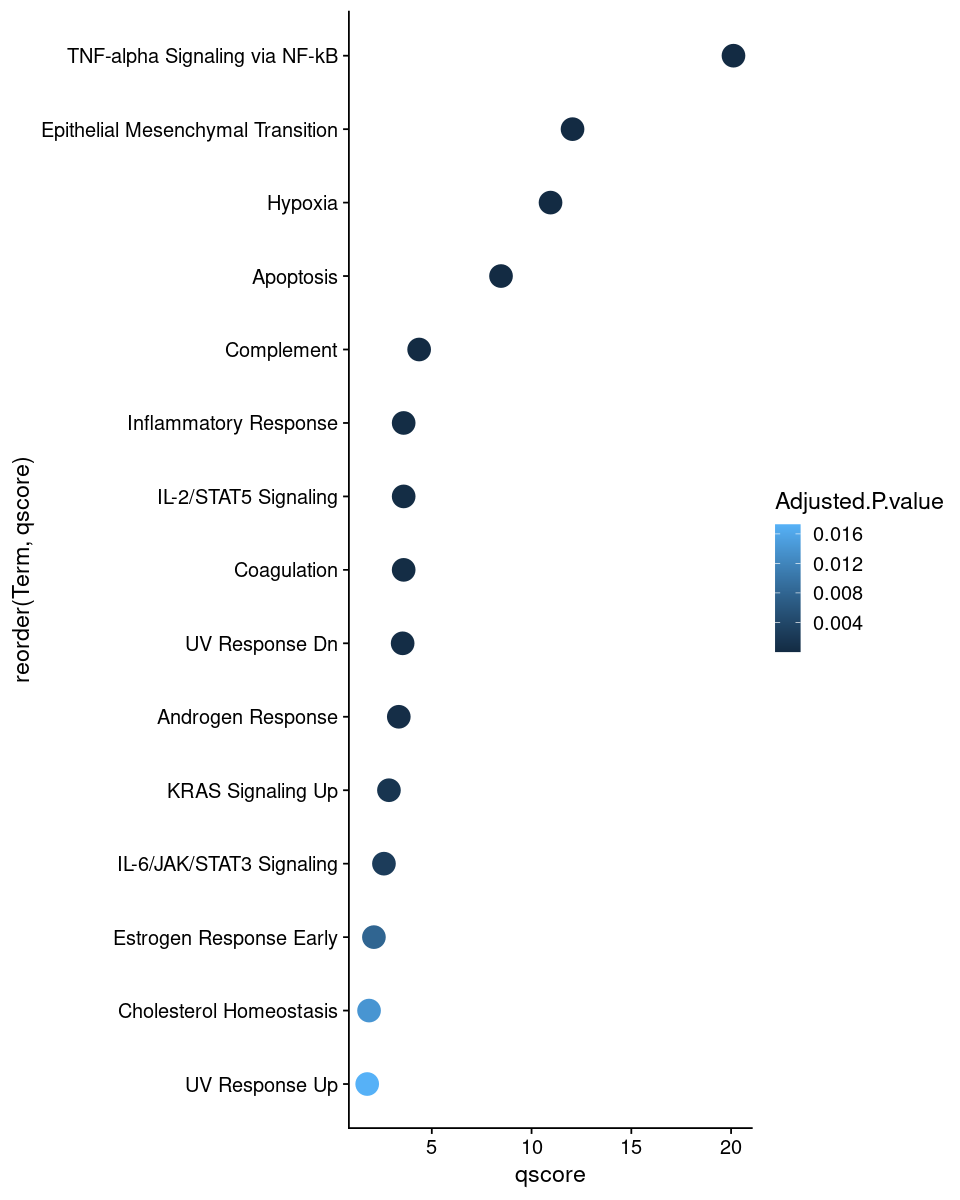

In [20]:
ggplot(h_mut_enr_S410[1:15,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value, dotsize =Adjusted.P.value)) +
  geom_point(size = 6) 

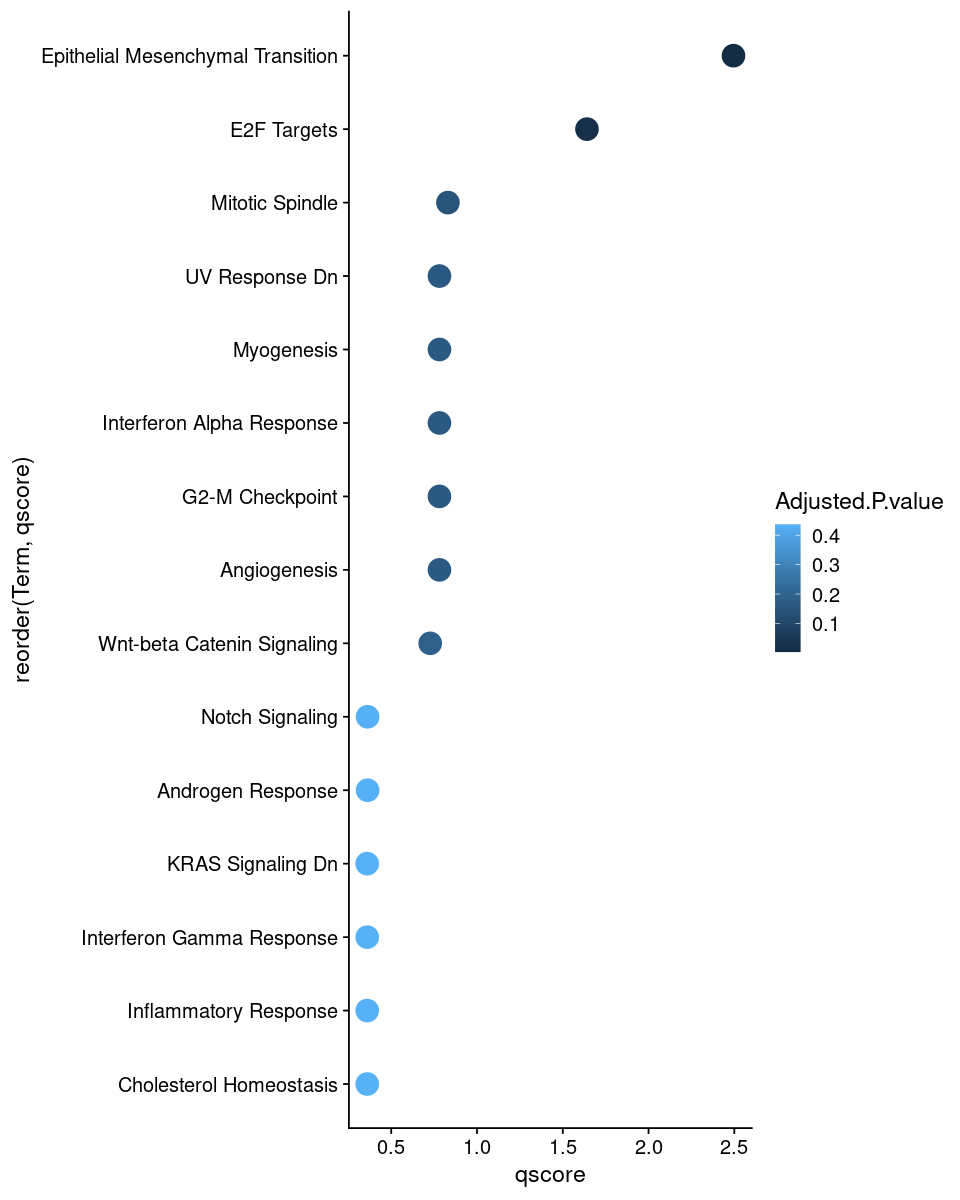

In [21]:
ggplot(h_mut_enr_167[1:15,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value, dotsize =Adjusted.P.value)) +
  geom_point(size = 6) 

In [22]:
mut_enr_S410_t <- mut_enr_S410[rev(rownames(mut_enr_S410)),]


pathways<- (unique(c(mut_enr_167[1:11,]$Term, tail(mut_enr_S410_t, n = 11)$Term)))

length(pathways)

[1] 19

In [23]:
t20.167.S410 <- (mut_enr_167[mut_enr_167$Term %in% pathways,])
rownames(t20.167.S410) <- t20.167.S410$Term
t20.167.S410<- t20.167.S410[pathways,]
temp <- t20.167.S410[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
t20.167.S410 <- t20.167.S410[,c()]
t20.167.S410$P.val.167 <- temp$Adjusted.P.value
t20.167.S410$Qscore.167 <- temp$qscore
temp <- (mut_enr_S410[mut_enr_S410$Term %in% pathways,])
rownames(temp) <- temp$Term
temp<- temp[pathways,]
t20.167.S410$P.val.S410 <- temp$Adjusted.P.value
t20.167.S410$Qscore.S410 <- temp$qscore
t20.167.S410$Qscore.S410[is.na(t20.167.S410$Qscore.S410)] <- 0
t20.167.S410$P.val.S410[is.na(t20.167.S410$P.val.S410)] <- 1
t20.167.S410$Qscore.167[is.na(t20.167.S410$Qscore.167)] <- 0
t20.167.S410$P.val.167[is.na(t20.167.S410$P.val.167)] <- 1

library("scales")
 
t20.167.S410$Qscore.S410 <- rescale(t20.167.S410$Qscore.S410, to=c(0,1))
t20.167.S410$Qscore.167 <- rescale(t20.167.S410$Qscore.167, to=c(0,1))

t20.167.S410



Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




P.val.167  Qscore.167  P.val.S410  
Epithelial Mesenchymal Transition 0.00319774 1.000000000 8.835515e-13
E2F Targets                       0.02285091 0.657712722 1.000000e+00
Mitotic Spindle                   0.14774094 0.332844462 1.000000e+00
UV Response Dn                    0.16552150 0.313064717 2.896180e-04
Angiogenesis                      0.16552150 0.313064717 2.397895e-01
G2-M Checkpoint                   0.16552150 0.313064717 1.000000e+00
Myogenesis                        0.16552150 0.313064717 3.358352e-01
Interferon Alpha Response         0.16552150 0.313064717 4.781918e-01
Wnt-beta Catenin Signaling        0.18741915 0.291439002 2.643331e-01
Androgen Response                 0.43419596 0.145206991 4.515313e-04
Notch Signaling                   0.43419596 0.145206991 1.000000e+00
KRAS Signaling Up                 0.65503667 0.073636407 1.406860e-03
NA                                1.00000000 0.000000000 2.572134e-04
Inflammatory Response             0.43654179 0.144269155 2.572134e-04
IL-2/STAT5 Signaling              0.97456295 0.004484729 2.572134e-04
Complement                        0.87062765 0.024113732 4.308575e-05
Apoptosis                         0.66650176 0.070616282 3.397853e-09
Hypoxia                           0.85902300 0.026449322 1.119947e-11
TNF-alpha Signaling via NF-kB     0.87062765 0.024113732 7.579591e-21
                                  Qscore.S410
Epithelial Mesenchymal Transition 0.59908330 
E2F Targets                       0.00000000 
Mitotic Spindle                   0.00000000 
UV Response Dn                    0.17585051 
Angiogenesis                      0.03082301 
G2-M Checkpoint                   0.00000000 
Myogenesis                        0.02355196 
Interferon Alpha Response         0.01592407 
Wnt-beta Catenin Signaling        0.02871960 
Androgen Response                 0.16626507 
Notch Signaling                   0.00000000 
KRAS Signaling Up                 0.14173454 
NA                                0.17841169 
Inflammatory Response             0.17841169 
IL-2/STAT5 Signaling              0.17841169 
Complement                        0.21697761 
Apoptosis                         0.42090688 
Hypoxia                           0.54426489 
TNF-alpha Signaling via NF-kB     1.00000000

In [24]:
t20.167.S410

P.val.167  Qscore.167  P.val.S410  
Epithelial Mesenchymal Transition 0.00319774 1.000000000 8.835515e-13
E2F Targets                       0.02285091 0.657712722 1.000000e+00
Mitotic Spindle                   0.14774094 0.332844462 1.000000e+00
UV Response Dn                    0.16552150 0.313064717 2.896180e-04
Angiogenesis                      0.16552150 0.313064717 2.397895e-01
G2-M Checkpoint                   0.16552150 0.313064717 1.000000e+00
Myogenesis                        0.16552150 0.313064717 3.358352e-01
Interferon Alpha Response         0.16552150 0.313064717 4.781918e-01
Wnt-beta Catenin Signaling        0.18741915 0.291439002 2.643331e-01
Androgen Response                 0.43419596 0.145206991 4.515313e-04
Notch Signaling                   0.43419596 0.145206991 1.000000e+00
KRAS Signaling Up                 0.65503667 0.073636407 1.406860e-03
NA                                1.00000000 0.000000000 2.572134e-04
Inflammatory Response             0.43654179 0.144269155 2.572134e-04
IL-2/STAT5 Signaling              0.97456295 0.004484729 2.572134e-04
Complement                        0.87062765 0.024113732 4.308575e-05
Apoptosis                         0.66650176 0.070616282 3.397853e-09
Hypoxia                           0.85902300 0.026449322 1.119947e-11
TNF-alpha Signaling via NF-kB     0.87062765 0.024113732 7.579591e-21
                                  Qscore.S410
Epithelial Mesenchymal Transition 0.59908330 
E2F Targets                       0.00000000 
Mitotic Spindle                   0.00000000 
UV Response Dn                    0.17585051 
Angiogenesis                      0.03082301 
G2-M Checkpoint                   0.00000000 
Myogenesis                        0.02355196 
Interferon Alpha Response         0.01592407 
Wnt-beta Catenin Signaling        0.02871960 
Androgen Response                 0.16626507 
Notch Signaling                   0.00000000 
KRAS Signaling Up                 0.14173454 
NA                                0.17841169 
Inflammatory Response             0.17841169 
IL-2/STAT5 Signaling              0.17841169 
Complement                        0.21697761 
Apoptosis                         0.42090688 
Hypoxia                           0.54426489 
TNF-alpha Signaling via NF-kB     1.00000000

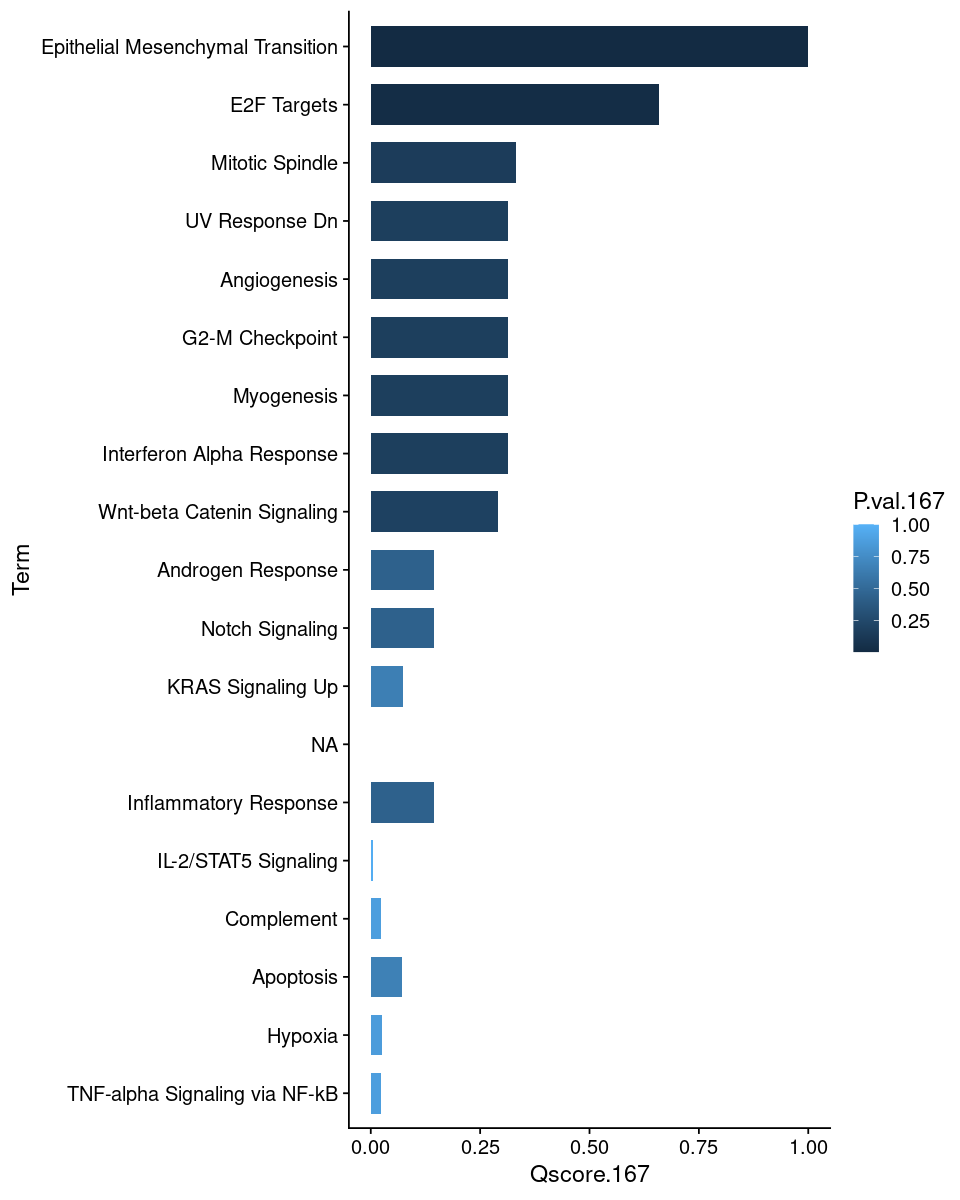

In [25]:

t20.167.S410 <- t20.167.S410[rev(rownames(t20.167.S410)),]

t20.167.S410$Term <- rownames(t20.167.S410)


t20.167.S410$Term <- factor(t20.167.S410$Term, levels = t20.167.S410$Term)
ggplot(t20.167.S410, aes(x = Term , y =  Qscore.167, 
                                  fill=P.val.167)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() 


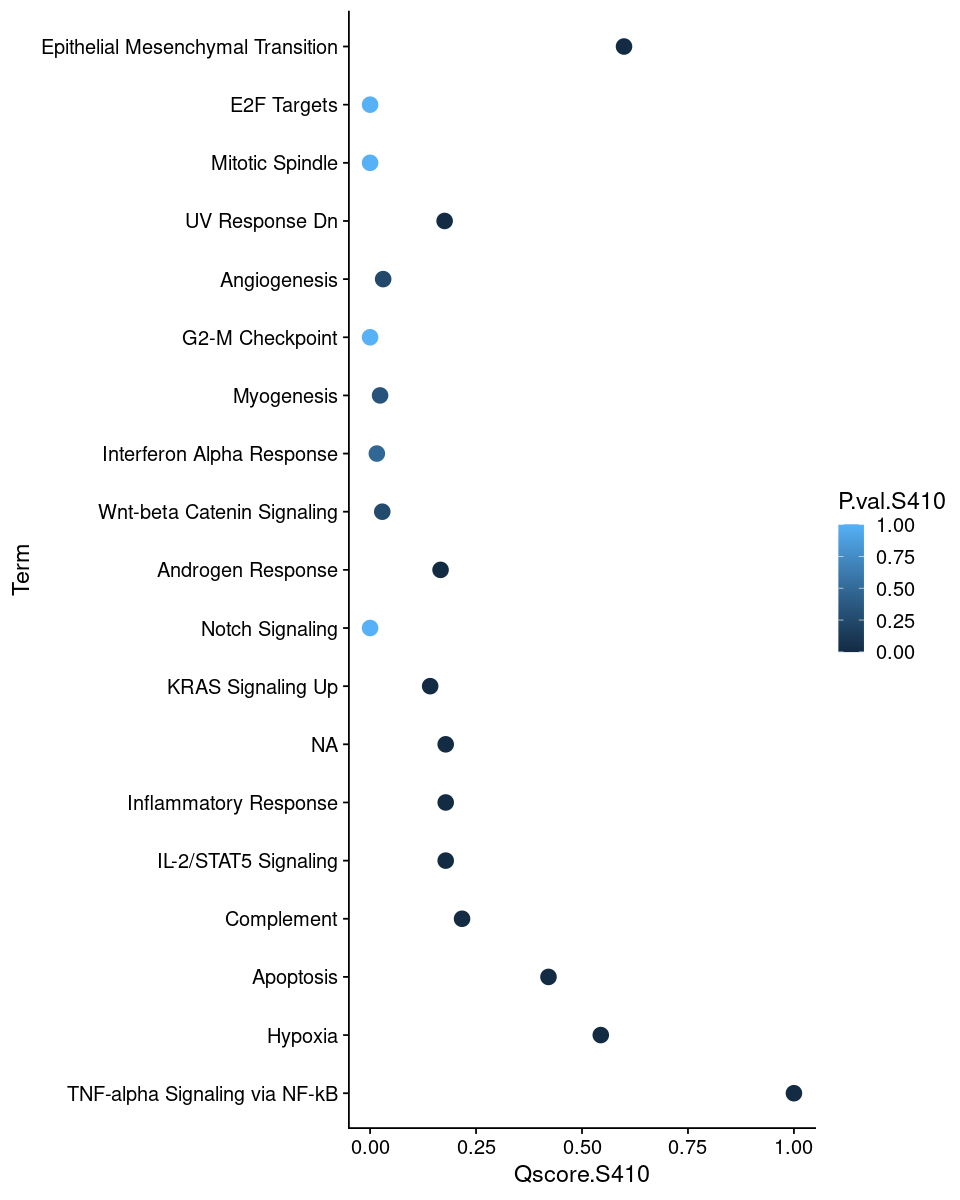

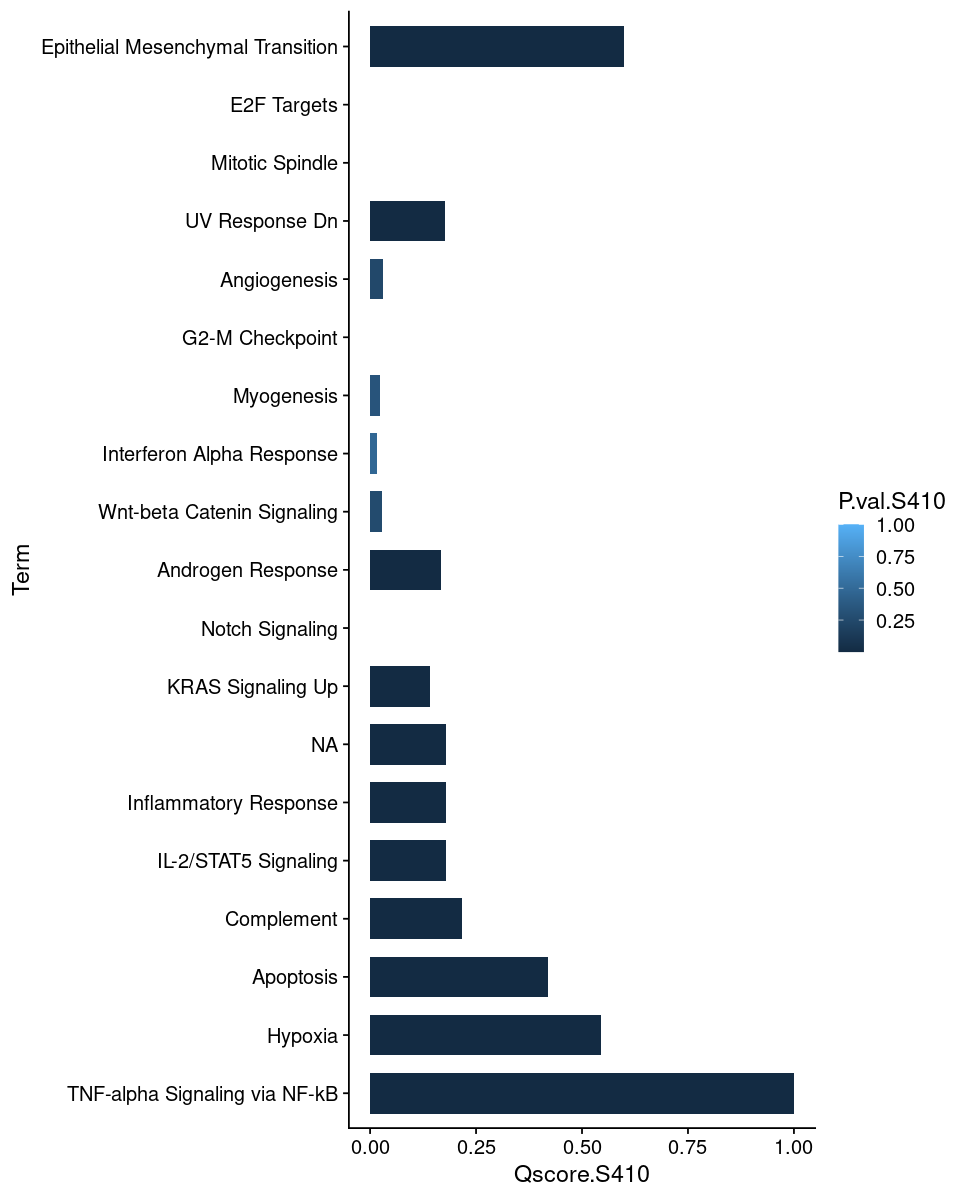

In [26]:

#t20.167.S410 <- t20.167.S410[rev(rownames(t20.167.S410)),]

t20.167.S410$Term <- rownames(t20.167.S410)


t20.167.S410$Term <- factor(t20.167.S410$Term, levels = t20.167.S410$Term)
ggplot(t20.167.S410, aes(x = Qscore.S410 , y = Term, 
                                  color=P.val.S410)) +
  geom_point(size = 4) +
  scale_color_gradient(limits = c(0, 1))


ggplot(t20.167.S410, aes(x = Term , y =  Qscore.S410, 
                                  fill=P.val.S410)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip()

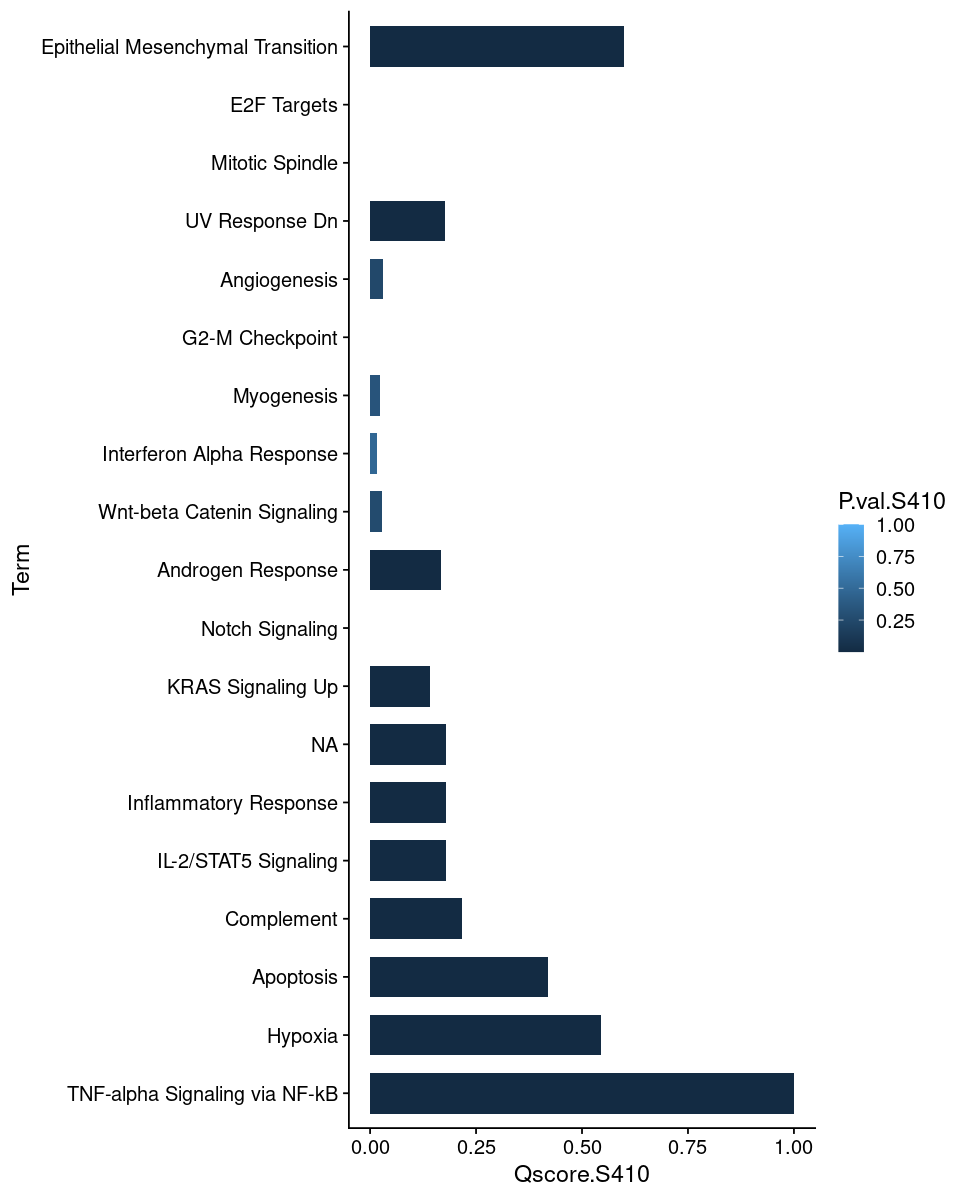

In [27]:
ggplot(t20.167.S410, aes(x = Term , y =  Qscore.S410, 
                                  fill=P.val.S410)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip()

In [28]:
temp

Term                              Overlap
Epithelial Mesenchymal Transition Epithelial Mesenchymal Transition 15/200 
NA                                NA                                NA     
NA.1                              NA                                NA     
UV Response Dn                    UV Response Dn                    6/144  
Angiogenesis                      Angiogenesis                      1/36   
NA.2                              NA                                NA     
Myogenesis                        Myogenesis                        2/200  
Interferon Alpha Response         Interferon Alpha Response         1/97   
Wnt-beta Catenin Signaling        Wnt-beta Catenin Signaling        1/42   
Androgen Response                 Androgen Response                 5/100  
NA.3                              NA                                NA     
KRAS Signaling Up                 KRAS Signaling Up                 6/200  
Coagulation                       Coagulation                       6/138  
Inflammatory Response             Inflammatory Response             7/200  
IL-2/STAT5 Signaling              IL-2/STAT5 Signaling              7/199  
Complement                        Complement                        8/200  
Apoptosis                         Apoptosis                         11/161 
Hypoxia                           Hypoxia                           14/200 
TNF-alpha Signaling via NF-kB     TNF-alpha Signaling via NF-kB     21/200 
                                  P.value      Adjusted.P.value Old.P.value
Epithelial Mesenchymal Transition 5.197362e-14 8.835515e-13      0         
NA                                          NA           NA     NA         
NA.1                                        NA           NA     NA         
UV Response Dn                    7.666359e-05 2.896180e-04      0         
Angiogenesis                      1.622105e-01 2.397895e-01      0         
NA.2                                        NA           NA     NA         
Myogenesis                        2.568151e-01 3.358352e-01      0         
Interferon Alpha Response         3.797405e-01 4.781918e-01      0         
Wnt-beta Catenin Signaling        1.865881e-01 2.643331e-01      0         
Androgen Response                 1.328033e-04 4.515313e-04      0         
NA.3                                        NA           NA     NA         
KRAS Signaling Up                 4.551605e-04 1.406860e-03      0         
Coagulation                       6.052079e-05 2.572134e-04      0         
Inflammatory Response             5.774775e-05 2.572134e-04      0         
IL-2/STAT5 Signaling              5.594834e-05 2.572134e-04      0         
Complement                        6.336140e-06 4.308575e-05      0         
Apoptosis                         3.997474e-10 3.397853e-09      0         
Hypoxia                           9.881888e-13 1.119947e-11      0         
TNF-alpha Signaling via NF-kB     2.229292e-22 7.579591e-21      0         
                                  Old.Adjusted.P.value Odds.Ratio
Epithelial Mesenchymal Transition  0                   19.261153 
NA                                NA                          NA 
NA.1                              NA                          NA 
UV Response Dn                     0                    9.340265 
Angiogenesis                       0                    5.851841 
NA.2                              NA                          NA 
Myogenesis                         0                    2.073232 
Interferon Alpha Response          0                    2.126933 
Wnt-beta Catenin Signaling         0                    4.993965 
Androgen Response                  0                   11.209394 
NA.3                              NA                          NA 
KRAS Signaling Up                  0                    6.625280 
Coagulation                        0                    9.767787 
Inflammatory Response              0                    7.855321 
IL-2

In [29]:
t20.167.S410$Qscore.S410

[1] 1.00000000 0.54426489 0.42090688 0.21697761 0.17841169 0.17841169
 [7] 0.17841169 0.14173454 0.00000000 0.16626507 0.02871960 0.01592407
[13] 0.02355196 0.00000000 0.03082301 0.17585051 0.00000000 0.00000000
[19] 0.59908330

In [30]:
mut_enr

Term                                                                                 
1    Epithelial Mesenchymal Transition                                                    
2    E2F Targets                                                                          
3    Mitotic Spindle                                                                      
4    UV Response Dn                                                                       
5    Angiogenesis                                                                         
6    G2-M Checkpoint                                                                      
7    Myogenesis                                                                           
8    Interferon Alpha Response                                                            
9    Wnt-beta Catenin Signaling                                                           
10   Androgen Response                                                                    
11   Notch Signaling                                                                      
12   Cholesterol Homeostasis                                                              
13   Interferon Gamma Response                                                            
14   Inflammatory Response                                                                
15   KRAS Signaling Dn                                                                    
16   TGF-beta Signaling                                                                   
17   PI3K/AKT/mTOR  Signaling                                                             
18   Apical Junction                                                                      
19   KRAS Signaling Up                                                                    
20   Fatty Acid Metabolism                                                                
21   Apoptosis                                                                            
22   IL-6/JAK/STAT3 Signaling                                                             
23   Hedgehog Signaling                                                                   
24   Hypoxia                                                                              
25   DNA Repair                                                                           
26   UV Response Up                                                                       
27   Apical Surface                                                                       
28   Bile Acid Metabolism                                                                 
29   TNF-alpha Signaling via NF-kB                                                        
30   Estrogen Response Early                                                              
⋮    ⋮                                                                                    
1941 phosphatidylinositol biosynthetic process (GO:0006661)                               
1942 protein transport (GO:0015031)                                                       
1943 Golgi organization (GO:0007030)                                                      
1944 transmembrane receptor protein serine/threonine kinase signaling pathway (GO:0007178)
1945 innate immune response (GO:0045087)                                                  
1946 regulation of G2/M transition of mitotic cell cycle (GO:0010389)                     
1947 membrane organization (GO:0061024)                                                   
1948 cellular response to interleukin-1 (GO:0071347)                                      
1949 organonitrogen compound biosynthetic process (GO:1901566)                            
1950 cellular protein metabolic process (GO:0044267)                                      
1951 organelle assembly (GO:0070925)                                                      
1952 gene expression (GO:0010467)                                                         
1

In [122]:
samp1_322_S914.list <- c(tumor.list[[2]], tumor.list[[7]])
samp1_322_S914.list <- lapply(X = samp1_322_S914.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = samp1_322_S914.list)
samp1.anchors <- FindIntegrationAnchors(object.list = samp1_322_S914.list, anchor.features = features)

Warning message in CheckDuplicateCellNames(object.list = object.list):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."
Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 20983 anchors

Filtering anchors

	Retained 5938 anchors



In [123]:
samp1_322_S914 <- IntegrateData(anchorset = samp1.anchors)


Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [124]:
DefaultAssay(samp1_322_S914) <- "integrated"

# Run the standard workflow for visualization and clustering
samp1_322_S914 <- ScaleData(samp1_322_S914, verbose = FALSE)
samp1_322_S914 <- RunPCA(samp1_322_S914, npcs = 30, verbose = FALSE)
samp1_322_S914 <- RunUMAP(samp1_322_S914, reduction = "pca", dims = 1:30)
samp1_322_S914 <- FindNeighbors(samp1_322_S914, reduction = "pca", dims = 1:30)
samp1_322_S914 <- FindClusters(samp1_322_S914, resolution = 0.5)

19:19:30 UMAP embedding parameters a = 0.9922 b = 1.112

19:19:30 Read 18623 rows and found 30 numeric columns

19:19:30 Using Annoy for neighbor search, n_neighbors = 30

19:19:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:19:33 Writing NN index file to temp file /tmp/RtmpjT2Eaa/file16e86d97bdd1

19:19:33 Searching Annoy index using 1 thread, search_k = 3000

19:19:40 Annoy recall = 100%

19:19:42 Commencing smooth kNN distance calibration using 1 thread

19:19:44 Initializing from normalized Laplacian + noise

19:19:44 Commencing optimization for 200 epochs, with 859314 positive edges

19:19:54 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18623
Number of edges: 714921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8898
Number of communities: 13
Elapsed time: 3 seconds


In [125]:
Idents(samp1_322_S914) <- 'orig.ident'


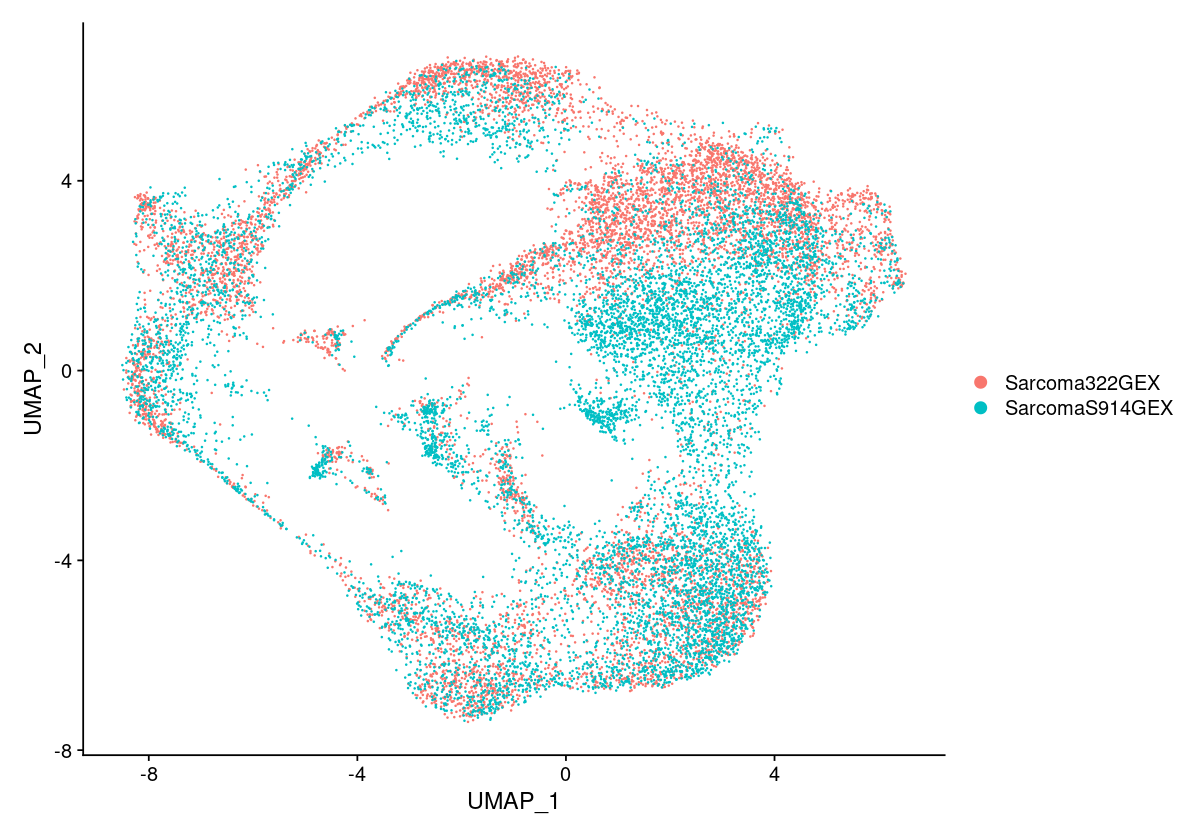

In [126]:
DimPlot(samp1_322_S914)

In [127]:
mark.322_S914 <- FindAllMarkers(samp1_322_S914)

Calculating cluster Sarcoma322GEX

Calculating cluster SarcomaS914GEX



In [128]:
mark.322_S914

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster       
TMEFF2       0             0.3501732 0.262 0.019 0            Sarcoma322GEX 
CALCRL       0             0.3496095 0.308 0.026 0            Sarcoma322GEX 
KCTD16       0             0.3340135 0.281 0.056 0            Sarcoma322GEX 
RCAN2        0             0.3266751 0.307 0.057 0            Sarcoma322GEX 
IL1RAPL2     0             0.3076235 0.155 0.014 0            Sarcoma322GEX 
NREP         0             0.2706918 0.334 0.060 0            Sarcoma322GEX 
MIR4300HG    0             0.2654029 0.267 0.018 0            Sarcoma322GEX 
DIAPH3       0             0.2639162 0.825 0.232 0            Sarcoma322GEX 
RPL39        0             0.2616819 0.148 0.006 0            Sarcoma322GEX 
MAPK10       0             0.2585408 0.275 0.053 0            Sarcoma322GEX 
TTN          0            -0.2579640 0.233 0.049 0            Sarcoma322GEX 
SOX5         0            -0.2602438 0.938 0.337 0            Sarcoma322GEX 
DANT2        0            -0.2615737 0.818 0.161 0            Sarcoma322GEX 
TNFSF14      0            -0.2682112 0.889 0.177 0            Sarcoma322GEX 
ATF5         0            -0.2705907 0.893 0.151 0            Sarcoma322GEX 
PLXNA4       0            -0.2710251 0.956 0.127 0            Sarcoma322GEX 
NCAM2        0            -0.2776825 0.938 0.338 0            Sarcoma322GEX 
IL1R1        0            -0.2921916 0.978 0.285 0            Sarcoma322GEX 
IER3         0            -0.3003648 0.933 0.199 0            Sarcoma322GEX 
ATF3         0            -0.3057274 0.910 0.151 0            Sarcoma322GEX 
PRG4         0            -0.3153060 0.981 0.150 0            Sarcoma322GEX 
GDF15        0            -0.3212357 0.978 0.244 0            Sarcoma322GEX 
SERPINE2     0            -0.3349877 0.999 0.171 0            Sarcoma322GEX 
PPP1R15A     0            -0.3521890 0.997 0.355 0            Sarcoma322GEX 
SLC39A8      0            -0.3536764 0.964 0.301 0            Sarcoma322GEX 
SCD          0            -0.3613063 0.980 0.119 0            Sarcoma322GEX 
WNT2B        0            -0.3650371 0.874 0.215 0            Sarcoma322GEX 
H1F0         0            -0.3774579 0.809 0.159 0            Sarcoma322GEX 
GPC5         0            -0.3921328 0.955 0.307 0            Sarcoma322GEX 
SNED1        0            -0.4072580 0.946 0.254 0            Sarcoma322GEX 
⋮            ⋮            ⋮          ⋮     ⋮     ⋮            ⋮             
AC016687.2.1 7.433473e-51 -0.3688527 0.054 0.424 1.486695e-47 SarcomaS914GEX
PTPRK.1      2.735939e-50 -0.2598115 0.118 0.466 5.471879e-47 SarcomaS914GEX
AC013287.1.1 3.108987e-44 -0.3150296 0.060 0.387 6.217974e-41 SarcomaS914GEX
JUN.1        5.370092e-43  0.3941031 0.537 0.976 1.074018e-39 SarcomaS914GEX
BRIP1.1      3.207865e-42 -0.2572328 0.243 0.672 6.415730e-39 SarcomaS914GEX
LMCD1.1      6.689111e-38  0.3156796 0.295 0.578 1.337822e-34 SarcomaS914GEX
NAMPT.1      4.946487e-36  0.6882380 0.516 0.952 9.892975e-33 SarcomaS914GEX
TPT1.1       1.508237e-35  0.3347699 0.201 0.542 3.016475e-32 SarcomaS914GEX
C3.1         2.202350e-33  0.4731926 0.737 1.000 4.404701e-30 SarcomaS914GEX
E2F7.1       9.858539e-32 -0.2688393 0.241 0.663 1.971708e-28 SarcomaS914GEX
HSPA1A.1     2.080452e-29  0.7729642 0.563 1.000 4.160904e-26 SarcomaS914GEX
ARHGAP15.1   2.177875e-29 -0.3037334 0.251 0.624 4.355750e-26 SarcomaS914GEX
COL8A1.1     2.444389e-29 -0.2747361 0.201 0.633 4.888778e-26 SarcomaS914GEX
FBLN7.1      1.014808e-27 -0.2508195 0.250 0.542 2.029615e-24 SarcomaS914GEX
LAMA3.1      7.320612e-23 -0.2931470 0.248 0.652 1.464122e-19 SarcomaS914GEX
TNFAIP2.1    1.363248e-19  0.4091913 0.554 0.999 2.726496e-16 SarcomaS914GEX
MIR100HG.1   4.592262e-18 -0.2923415 0.268 0.626 9.184523e-15 SarcomaS914GEX
PLA2G2A.1    2.152204e-17  1.0683717 0.632 0.992 4.304407e-14 SarcomaS914GEX
ZFP36.1      4.179484e-17  0.6861567 0.547 0.990 8.358968e-14 SarcomaS914GEX
HSPB1.1      7.659568e-17  0.4086387 0.630 0.825 1.531914e-13 SarcomaS914GEX
FTL.1    

In [134]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


genes = mark.322_S914[mark.322_S914$cluster == "Sarcoma322GEX" & mark.322_S914$p_val_adj < 0.05 & 
              mark.322_S914$avg_log2FC >0, ]$gene
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature


dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}

enriched
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr_322 <- rbind.data.frame(mut_enr_ch,mut_enr_go)

dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- h_mut_enr1
h_mut_enr_322 <- h_mut_enr1


ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
pdf(paste0("sarc322_s914_gsea_results.pdf"), width = 10, height = 10)
print(myggp)
dev.off()

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


$MSigDB_Hallmark_2020
                                Term Overlap     P.value Adjusted.P.value
1          Interferon Alpha Response    3/97 0.001733316       0.02253310
2          Interferon Gamma Response   3/200 0.012951500       0.05612316
3                        E2F Targets   3/200 0.012951500       0.05612316
4                    G2-M Checkpoint   2/200 0.086218938       0.16012089
5                  KRAS Signaling Dn   2/200 0.086218938       0.16012089
6                    Apical Junction   2/200 0.086218938       0.16012089
7  Epithelial Mesenchymal Transition   2/200 0.086218938       0.16012089
8           PI3K/AKT/mTOR  Signaling   1/105 0.227588548       0.36983139
9                    Spermatogenesis   1/135 0.282707005       0.38924562
10                        DNA Repair   1/150 0.308802278       0.38924562
11           Estrogen Response Early   1/200 0.389245623       0.38924562
12               Allograft Rejection   1/200 0.389245623       0.38924562
13             Inflammatory Response   1/200 0.389245623       0.38924562
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score             Genes
1            0                    0  13.776827      87.589197  MX1;ISG15;IFI44L
2            0                    0   6.539616      28.424727  MX1;ISG15;IFI44L
3            0                    0   6.539616      28.424727 PRIM2;DIAPH3;EZH2
4            0                    0   4.245218      10.404458        PRIM2;EZH2
5            0                    0   4.245218      10.404458        MX1;IFI44L
6            0                    0   4.245218      10.404458       LAMA3;SLIT2
7            0                    0   4.245218      10.404458       LAMA3;SLIT2
8            0                    0   3.975761       5.884985            MAPK10
9            0                    0   3.081001       3.892365              EZH2
10           0                    0   2.768736       3.253415             POLA1
11           0                    0   2.067839       1.951099             THSD4
12           0                    0   2.067839       1.951099             RPL39
13           0                    0   2.067839       1.951099            CALCRL

$GO_Biological_Process_2021
                                                                                                          Term
1                                                        DNA replication, synthesis of RNA primer (GO:0006269)
2                                                                   response to type I interferon (GO:0034340)
3                                             negative regulation of smooth muscle cell migration (GO:0014912)
4                                                            negative regulation of cell motility (GO:2000146)
5                   regulation of transcription involved in G1/S transition of mitotic cell cycle (GO:0000083)
6                                                                        RNA biosynthetic process (GO:0032774)
7                                                                 endodermal cell differentiation (GO:0035987)
8                                                                cell-substrate junction assembly (GO:0007044)
9                                                                    defense response to symbiont (GO:0140546)
10                                                                             endoderm formation (GO:0001706)
11                                                                     DNA replication initiation (GO:0006270)
12                                                                      defense response to virus (GO:0051607)
13                                                           DNA synthesis involved in DNA repair (GO:0000731)
14                                                          negative regulation of cell migration (GO:0030336)
15                                                                       receptor internalization (GO:0031623)
16               

[1] 13 10

[1] 406  10

[1] 419  10

png 
  2

In [135]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


genes = mark.322_S914[mark.322_S914$cluster == "SarcomaS914GEX" & mark.322_S914$p_val_adj < 0.05 & 
              mark.322_S914$avg_log2FC >0, ]$gene
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature


dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
enriched
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr_S914 <- rbind.data.frame(mut_enr_ch,mut_enr_go)

dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- h_mut_enr1
h_mut_enr_S914 <- h_mut_enr1


ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
pdf(paste0("sarc322_s914_gsea_results.pdf"), width = 10, height = 10)
print(myggp)
dev.off()

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


$MSigDB_Hallmark_2020
                                Term Overlap      P.value Adjusted.P.value
1      TNF-alpha Signaling via NF-kB  14/200 9.226980e-15     3.229443e-13
2                            Hypoxia  12/200 5.483498e-12     9.596122e-11
3                   mTORC1 Signaling   9/200 3.640840e-08     4.247647e-07
4               IL-2/STAT5 Signaling   6/199 7.528289e-05     5.417702e-04
5                        p53 Pathway   6/200 7.739575e-05     5.417702e-04
6           IL-6/JAK/STAT3 Signaling    4/87 2.598660e-04     1.515885e-03
7  Epithelial Mesenchymal Transition   5/200 7.253797e-04     3.626899e-03
8            Cholesterol Homeostasis    3/74 2.320252e-03     9.049552e-03
9                     UV Response Up   4/158 2.415612e-03     9.049552e-03
10                         Apoptosis   4/161 2.585586e-03     9.049552e-03
11                 KRAS Signaling Up   4/200 5.594201e-03     1.779973e-02
12                       Coagulation   3/138 1.305605e-02     3.808015e-02
13                TGF-beta Signaling    2/54 1.578643e-02     4.250192e-02
14             Fatty Acid Metabolism   3/158 1.869060e-02     4.672649e-02
15                        Myogenesis   3/200 3.428252e-02     7.058165e-02
16                        Complement   3/200 3.428252e-02     7.058165e-02
17                        Glycolysis   3/200 3.428252e-02     7.058165e-02
18                 Androgen Response   2/100 4.921855e-02     9.570273e-02
19         Unfolded Protein Response   2/113 6.111397e-02     1.125784e-01
20                    UV Response Dn   2/144 9.280326e-02     1.624057e-01
21                    Apical Surface    1/44 1.449935e-01     2.001212e-01
22            Estrogen Response Late   2/200 1.585864e-01     2.001212e-01
23         Interferon Gamma Response   2/200 1.585864e-01     2.001212e-01
24                   Apical Junction   2/200 1.585864e-01     2.001212e-01
25             Inflammatory Response   2/200 1.585864e-01     2.001212e-01
26             Xenobiotic Metabolism   2/200 1.585864e-01     2.001212e-01
27                   heme Metabolism   2/200 1.585864e-01     2.001212e-01
28   Reactive Oxygen Species Pathway    1/49 1.600970e-01     2.001212e-01
29                    Myc Targets V2    1/58 1.866232e-01     2.252349e-01
30                       Pperoxisome   1/104 3.098274e-01     3.614653e-01
31                   Mitotic Spindle   1/199 5.089642e-01     5.107249e-01
32                   G2-M Checkpoint   1/200 5.107249e-01     5.107249e-01
33                      Adipogenesis   1/200 5.107249e-01     5.107249e-01
34           Estrogen Response Early   1/200 5.107249e-01     5.107249e-01
35                    Myc Targets V1   1/200 5.107249e-01     5.107249e-01
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1            0                    0  26.070741    842.5188824
2            0                    0  21.357014    553.7719525
3            0                    0  15.001013    256.9443513
4            0                    0   9.439299     89.6191325
5            0                    0   9.390167     88.8927505
6            0                    0  14.275130    117.8461176
7            0                    0   7.666667     55.4209169
8            0                    0  12.339271     74.8510006
9            0                    0   7.666214     46.1950960
10           0                    0   7.518585     44.7942511
11           0                    0   6.010661     31.1714367
12           0                    0   6.468627     28.0641633
13           0                    0  11.079710     45.9653371
14           0                    0   5.628273     22.3990348
15           0                    0   4.418931     14.9055836
16           0                    0   4.418931     14.9055836
17           0                    0   4.418931     14.9055836
18           0                    0   5.865424     17.6636360
19           0                    0   5.175088     14.4644476
20           0                    0   

[1] 35 10

[1] 1025   10

[1] 1060   10

png 
  2

In [136]:
mark.322_S914[mark.322_S914$cluster == "Sarcoma322GEX" & mark.322_S914$p_val_adj < 0.05 & 
              mark.322_S914$avg_log2FC >0, ]

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster      
TMEFF2      0.000000e+00 0.3501732  0.262 0.019  0.000000e+00 Sarcoma322GEX
CALCRL      0.000000e+00 0.3496095  0.308 0.026  0.000000e+00 Sarcoma322GEX
KCTD16      0.000000e+00 0.3340135  0.281 0.056  0.000000e+00 Sarcoma322GEX
RCAN2       0.000000e+00 0.3266751  0.307 0.057  0.000000e+00 Sarcoma322GEX
IL1RAPL2    0.000000e+00 0.3076235  0.155 0.014  0.000000e+00 Sarcoma322GEX
NREP        0.000000e+00 0.2706918  0.334 0.060  0.000000e+00 Sarcoma322GEX
MIR4300HG   0.000000e+00 0.2654029  0.267 0.018  0.000000e+00 Sarcoma322GEX
DIAPH3      0.000000e+00 0.2639162  0.825 0.232  0.000000e+00 Sarcoma322GEX
RPL39       0.000000e+00 0.2616819  0.148 0.006  0.000000e+00 Sarcoma322GEX
MAPK10      0.000000e+00 0.2585408  0.275 0.053  0.000000e+00 Sarcoma322GEX
MX1        3.047227e-303 0.3282170  0.375 0.100 6.094454e-300 Sarcoma322GEX
AL807742.1 1.093665e-240 0.3913110  0.280 0.013 2.187330e-237 Sarcoma322GEX
AC068051.1 4.991636e-183 0.3677870  0.336 0.074 9.983272e-180 Sarcoma322GEX
AC124852.1 7.234785e-179 0.3610583  0.765 0.327 1.446957e-175 Sarcoma322GEX
LINC01876  3.129667e-167 0.2620284  0.358 0.129 6.259335e-164 Sarcoma322GEX
AC011287.1 2.218581e-166 0.6344211  0.324 0.037 4.437162e-163 Sarcoma322GEX
LINC02476  6.565176e-163 0.4460199  0.861 0.578 1.313035e-159 Sarcoma322GEX
CASC15     8.723190e-151 0.2501792  0.345 0.069 1.744638e-147 Sarcoma322GEX
AL591519.1 1.415571e-140 0.3152472  0.380 0.135 2.831142e-137 Sarcoma322GEX
SDK1       6.634231e-132 0.4742673  0.904 0.575 1.326846e-128 Sarcoma322GEX
EZH2       3.376384e-127 0.2623161  0.861 0.443 6.752767e-124 Sarcoma322GEX
THSD4      6.357022e-127 0.3193695  0.422 0.108 1.271404e-123 Sarcoma322GEX
PRIM2      3.024177e-112 0.2937445  0.816 0.423 6.048355e-109 Sarcoma322GEX
KCND2      9.838522e-110 0.4755357  0.787 0.453 1.967704e-106 Sarcoma322GEX
SLIT2      2.169496e-106 0.2577291  0.767 0.319 4.338992e-103 Sarcoma322GEX
POLA1       7.852199e-94 0.2628841  0.818 0.414  1.570440e-90 Sarcoma322GEX
AC079793.1  1.506196e-92 0.2502077  0.405 0.132  3.012393e-89 Sarcoma322GEX
IFI44L      3.683339e-91 0.4725684  0.433 0.045  7.366678e-88 Sarcoma322GEX
GLYATL2     1.705799e-90 0.2872462  0.426 0.144  3.411599e-87 Sarcoma322GEX
PRKG1       9.221004e-85 0.2890588  0.761 0.398  1.844201e-81 Sarcoma322GEX
LINC02296   3.291086e-83 0.3127031  0.379 0.071  6.582172e-80 Sarcoma322GEX
CLDN1       2.624664e-80 0.3196962  0.458 0.113  5.249327e-77 Sarcoma322GEX
GALNT13     1.228139e-78 0.2678396  0.820 0.444  2.456279e-75 Sarcoma322GEX
AC068587.4  6.502589e-68 0.3300720  0.757 0.406  1.300518e-64 Sarcoma322GEX
WWOX        9.548048e-59 0.3547979  0.781 0.492  1.909610e-55 Sarcoma322GEX
MARCH1      1.899218e-58 0.4036371  0.440 0.123  3.798435e-55 Sarcoma322GEX
ISG15       5.376902e-55 0.3807559  0.461 0.077  1.075380e-51 Sarcoma322GEX
AC016687.2  7.433473e-51 0.3688527  0.424 0.054  1.486695e-47 Sarcoma322GEX
PTPRK       2.735939e-50 0.2598115  0.466 0.118  5.471879e-47 Sarcoma322GEX
AC013287.1  3.108987e-44 0.3150296  0.387 0.060  6.217974e-41 Sarcoma322GEX
BRIP1       3.207865e-42 0.2572328  0.672 0.243  6.415730e-39 Sarcoma322GEX
E2F7        9.858539e-32 0.2688393  0.663 0.241  1.971708e-28 Sarcoma322GEX
ARHGAP15    2.177875e-29 0.3037334  0.624 0.251  4.355750e-26 Sarcoma322GEX
COL8A1      2.444389e-29 0.2747361  0.633 0.201  4.888778e-26 Sarcoma322GEX
FBLN7       1.014808e-27 0.2508195  0.542 0.250  2.029615e-24 Sarcoma322GEX
LAMA3       7.320612e-23 0.2931470  0.652 0.248  1.464122e-19 Sarcoma322GEX
MIR100HG    4.592262e-18 0.2923415  0.626 0.268  9.184523e-15 Sarcoma322GEX
AL049828.1  9.909043e-09 0.2837944  0.569 0.210  1.981809e-05 Sarcoma322GEX
AC024230.1  2.386141e-06 0.2818232  0.518 0.235  4.772282e-03 Sarcoma322GEX
           gene      
TMEFF2     TMEFF2    
CALCRL     CALCRL    
KCTD16     KCTD16    
RCAN2      RCAN2     
IL1RAPL2   IL1RAPL2  
NREP       NREP      
MIR4300HG  MIR4300HG 
DIAPH3     DIAPH3    
RPL39      RP

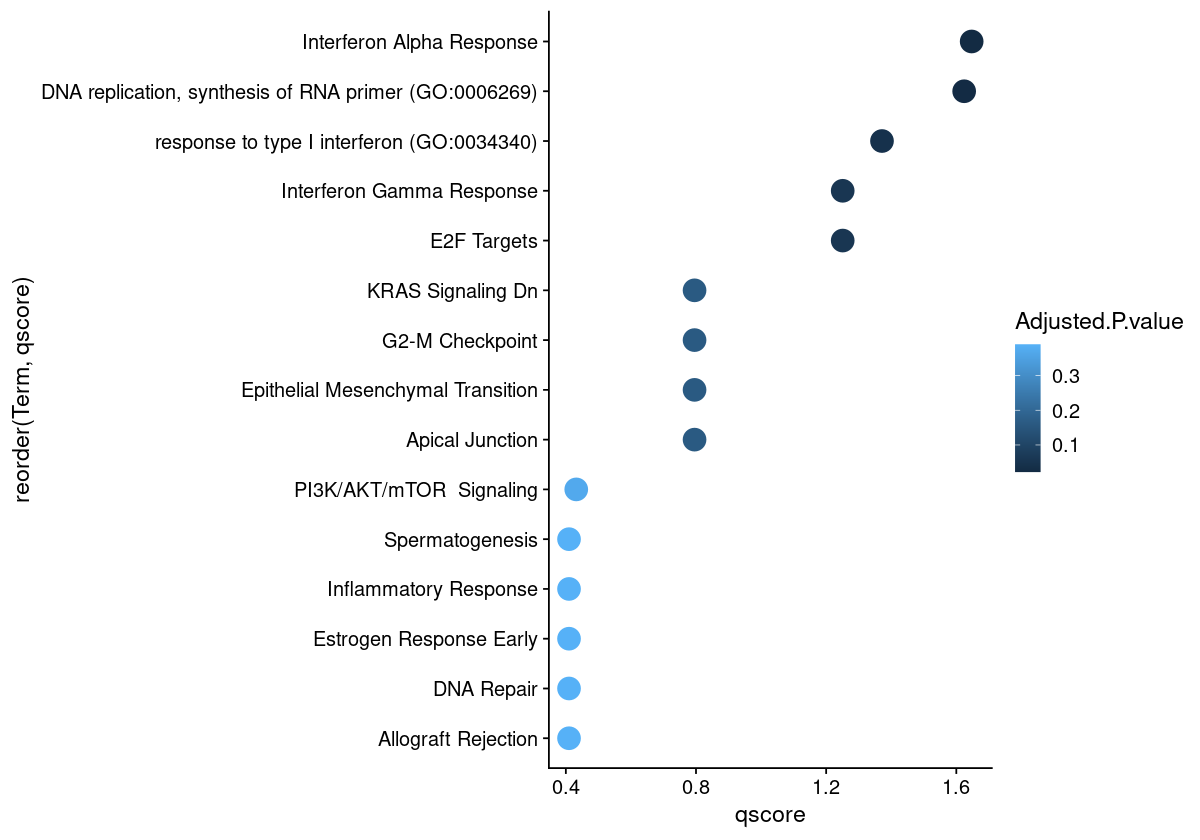

In [137]:
ggplot(h_mut_enr_322[1:15,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value, dotsize =Adjusted.P.value)) +
  geom_point(size = 6) 

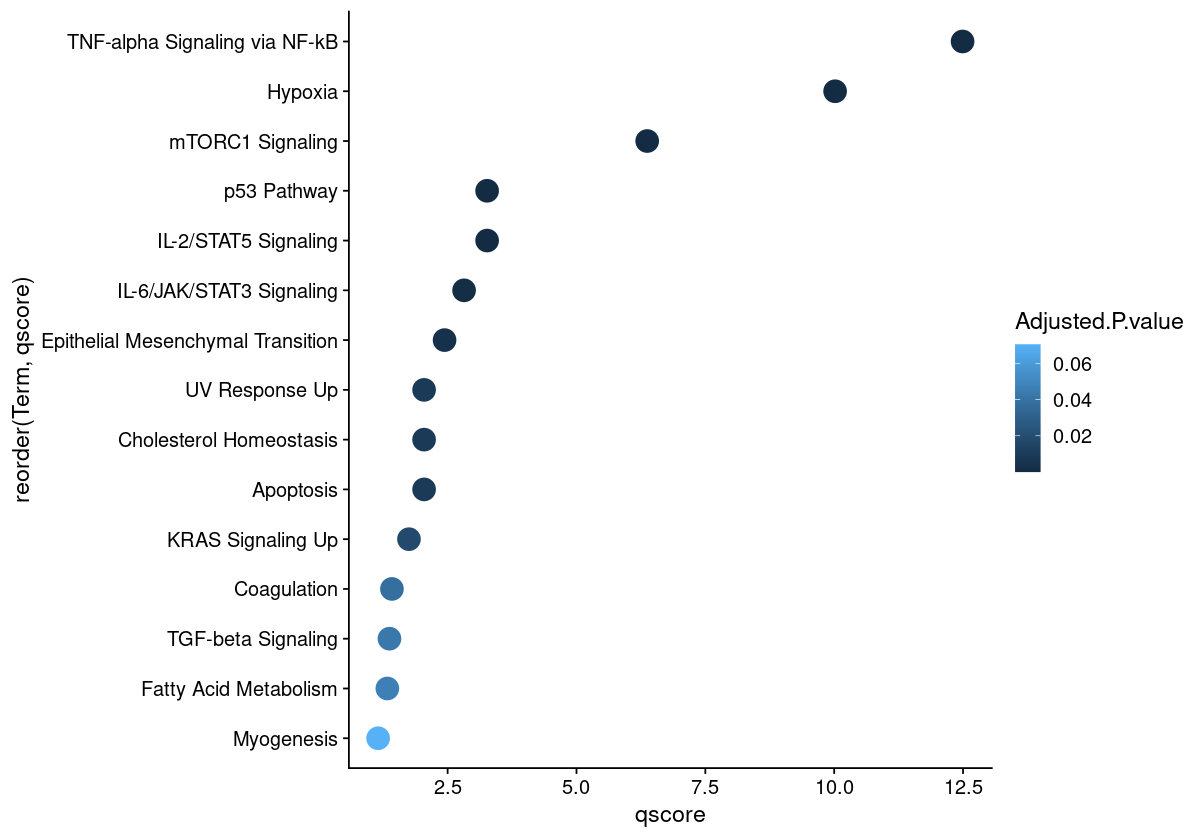

In [138]:
ggplot(h_mut_enr_S914[1:15,], aes(x = qscore , y = reorder(Term, qscore),
                                  color=Adjusted.P.value, dotsize =Adjusted.P.value)) +
  geom_point(size = 6) 
                      

In [139]:
mut_enr_S914

Term                                                                          
1    TNF-alpha Signaling via NF-kB                                                 
2    Hypoxia                                                                       
3    mTORC1 Signaling                                                              
4    IL-2/STAT5 Signaling                                                          
5    p53 Pathway                                                                   
6    IL-6/JAK/STAT3 Signaling                                                      
7    Epithelial Mesenchymal Transition                                             
8    Cholesterol Homeostasis                                                       
9    UV Response Up                                                                
10   Apoptosis                                                                     
11   KRAS Signaling Up                                                             
12   Coagulation                                                                   
13   TGF-beta Signaling                                                            
14   Fatty Acid Metabolism                                                         
15   Myogenesis                                                                    
16   Complement                                                                    
17   Glycolysis                                                                    
18   Androgen Response                                                             
19   Unfolded Protein Response                                                     
20   UV Response Dn                                                                
21   Apical Surface                                                                
22   Estrogen Response Late                                                        
23   Interferon Gamma Response                                                     
24   Apical Junction                                                               
25   Inflammatory Response                                                         
26   Xenobiotic Metabolism                                                         
27   heme Metabolism                                                               
28   Reactive Oxygen Species Pathway                                               
29   Myc Targets V2                                                                
30   Pperoxisome                                                                   
⋮    ⋮                                                                             
1031 regulation of immune response (GO:0050776)                                    
1032 antigen receptor-mediated signaling pathway (GO:0050851)                      
1033 regulation of GTPase activity (GO:0043087)                                    
1034 negative regulation of nucleic acid-templated transcription (GO:1903507)      
1035 negative regulation of cell differentiation (GO:0045596)                      
1036 cellular protein modification process (GO:0006464)                            
1037 regulation of signal transduction (GO:0009966)                                
1038 regulation of macromolecule metabolic process (GO:0060255)                    
1039 modification-dependent protein catabolic process (GO:0019941)                 
1040 mitotic cell cycle phase transition (GO:0044772)                              
1041 negative regulation of inflammatory response (GO:0050728)                     
1042 phosphate-containing compound metabolic process (GO:0006796)                  
1043 negative regulation of multicellular organismal process (GO:0051241)          
1044 transcription, DNA-templated (GO:0006351)                                     
1045 regulation of autophagy (GO:0010506)                                          
1046 membrane organization (GO:0061024)                  

In [144]:
mut_enr_322_t <- mut_enr_322[rev(rownames(mut_enr_322)),]

pathways<- (unique(c(mut_enr_S914[1:11,]$Term, tail(mut_enr_322_t, n = 10)$Term)))

length(pathways)
pathways

[1] 20

[1] "TNF-alpha Signaling via NF-kB"     "Hypoxia"                          
 [3] "mTORC1 Signaling"                  "IL-2/STAT5 Signaling"             
 [5] "p53 Pathway"                       "IL-6/JAK/STAT3 Signaling"         
 [7] "Epithelial Mesenchymal Transition" "Cholesterol Homeostasis"          
 [9] "UV Response Up"                    "Apoptosis"                        
[11] "KRAS Signaling Up"                 "DNA Repair"                       
[13] "Spermatogenesis"                   "PI3K/AKT/mTOR  Signaling"         
[15] "Apical Junction"                   "KRAS Signaling Dn"                
[17] "G2-M Checkpoint"                   "E2F Targets"                      
[19] "Interferon Gamma Response"         "Interferon Alpha Response"

In [145]:
t20.322.S914 <- (h_mut_enr_S914[h_mut_enr_S914$Term %in% pathways,])
rownames(t20.322.S914) <- t20.322.S914$Term
t20.322.S914<- t20.322.S914[pathways,]
temp <- t20.322.S914[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
t20.322.S914 <- t20.322.S914[,c()]
t20.322.S914$P.val.S914 <- temp$Adjusted.P.value
t20.322.S914$Qscore.S914 <- temp$qscore
temp <- (mut_enr_322[mut_enr_322$Term %in% pathways,])
rownames(temp) <- temp$Term
temp<- temp[pathways,]
t20.322.S914$P.val.322 <- temp$Adjusted.P.value
t20.322.S914$Qscore.322 <- temp$qscore
t20.322.S914$Qscore.322[is.na(t20.322.S914$Qscore.322)] <- 0
t20.322.S914$P.val.322[is.na(t20.322.S914$P.val.322)] <- 0.5
t20.322.S914$Qscore.S914[is.na(t20.322.S914$Qscore.S914)] <- 0
t20.322.S914$P.val.S914[is.na(t20.322.S914$P.val.S914)] <- 0.5

library("scales")
 
t20.322.S914$Qscore.322 <- rescale(t20.322.S914$Qscore.322, to=c(0,1))
t20.322.S914$Qscore.S914 <- rescale(t20.322.S914$Qscore.S914, to=c(0,1))

rownames(t20.322.S914) <- pathways
t20.322.S914

P.val.S914   Qscore.S914 P.val.322 
TNF-alpha Signaling via NF-kB     3.229443e-13 1.00000000  0.50000000
Hypoxia                           9.596122e-11 0.80201798  0.50000000
mTORC1 Signaling                  4.247647e-07 0.51012062  0.50000000
IL-2/STAT5 Signaling              5.417702e-04 0.26148573  0.50000000
p53 Pathway                       5.417702e-04 0.26148573  0.50000000
IL-6/JAK/STAT3 Signaling          1.515885e-03 0.22571152  0.50000000
Epithelial Mesenchymal Transition 3.626899e-03 0.19537983  0.16012089
Cholesterol Homeostasis           9.049552e-03 0.16358929  0.50000000
UV Response Up                    9.049552e-03 0.16358929  0.50000000
Apoptosis                         9.049552e-03 0.16358929  0.50000000
KRAS Signaling Up                 1.779973e-02 0.14006921  0.50000000
DNA Repair                        5.000000e-01 0.00000000  0.38924562
Spermatogenesis                   5.000000e-01 0.00000000  0.38924562
PI3K/AKT/mTOR  Signaling          5.000000e-01 0.00000000  0.36983139
Apical Junction                   2.001212e-01 0.05593739  0.16012089
KRAS Signaling Dn                 5.000000e-01 0.00000000  0.16012089
G2-M Checkpoint                   5.000000e-01 0.00000000  0.16012089
E2F Targets                       5.000000e-01 0.00000000  0.05612316
Interferon Gamma Response         2.001212e-01 0.05593739  0.05612316
Interferon Alpha Response         5.000000e-01 0.00000000  0.02253310
                                  Qscore.322
TNF-alpha Signaling via NF-kB     0.0000000 
Hypoxia                           0.0000000 
mTORC1 Signaling                  0.0000000 
IL-2/STAT5 Signaling              0.0000000 
p53 Pathway                       0.0000000 
IL-6/JAK/STAT3 Signaling          0.0000000 
Epithelial Mesenchymal Transition 0.4829785 
Cholesterol Homeostasis           0.0000000 
UV Response Up                    0.0000000 
Apoptosis                         0.0000000 
KRAS Signaling Up                 0.0000000 
DNA Repair                        0.2487746 
Spermatogenesis                   0.2487746 
PI3K/AKT/mTOR  Signaling          0.2622643 
Apical Junction                   0.4829785 
KRAS Signaling Dn                 0.4829785 
G2-M Checkpoint                   0.4829785 
E2F Targets                       0.7593940 
Interferon Gamma Response         0.7593940 
Interferon Alpha Response         1.0000000

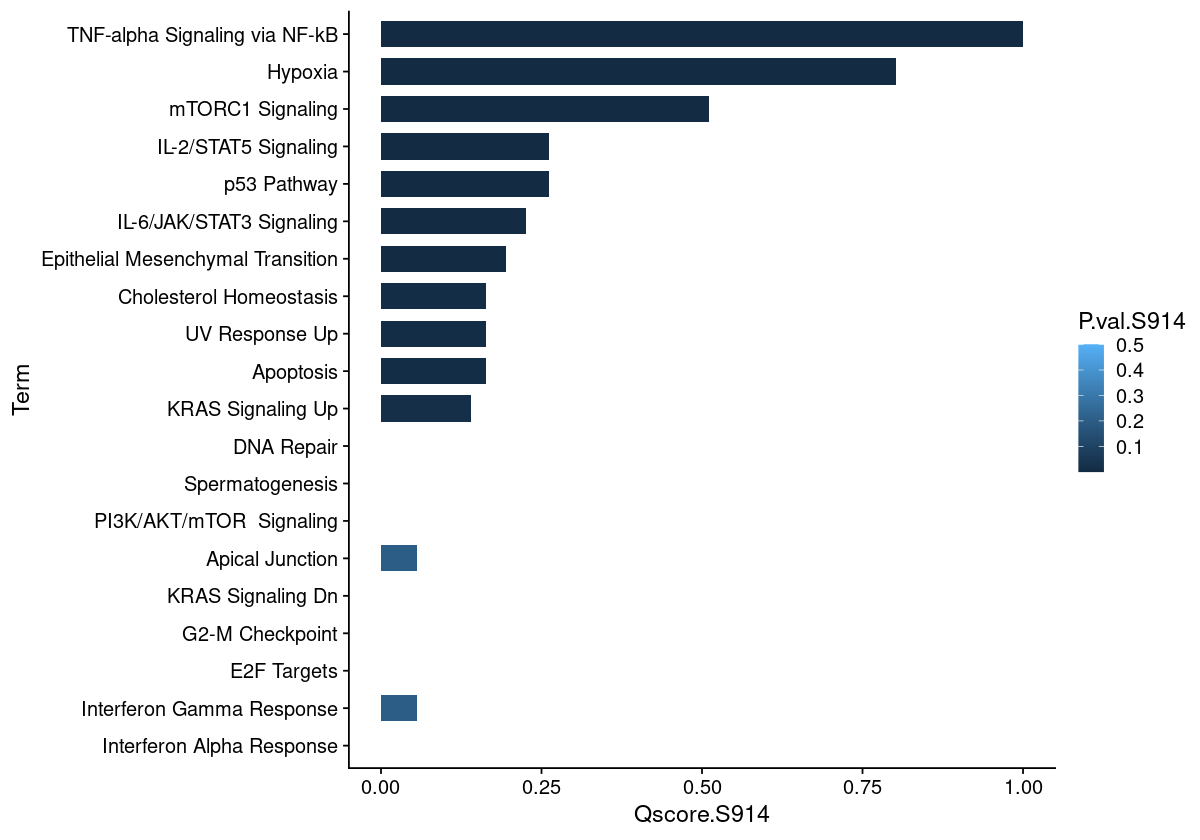

In [146]:

t20.322.S914 <- t20.322.S914[rev(rownames(t20.322.S914)),]

t20.322.S914$Term <- rownames(t20.322.S914)


t20.322.S914$Term <- factor(t20.322.S914$Term, levels = t20.322.S914$Term)
ggplot(t20.322.S914, aes(x = Term , y =  Qscore.S914, 
                                  fill=P.val.S914)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 0.5)) + coord_flip()


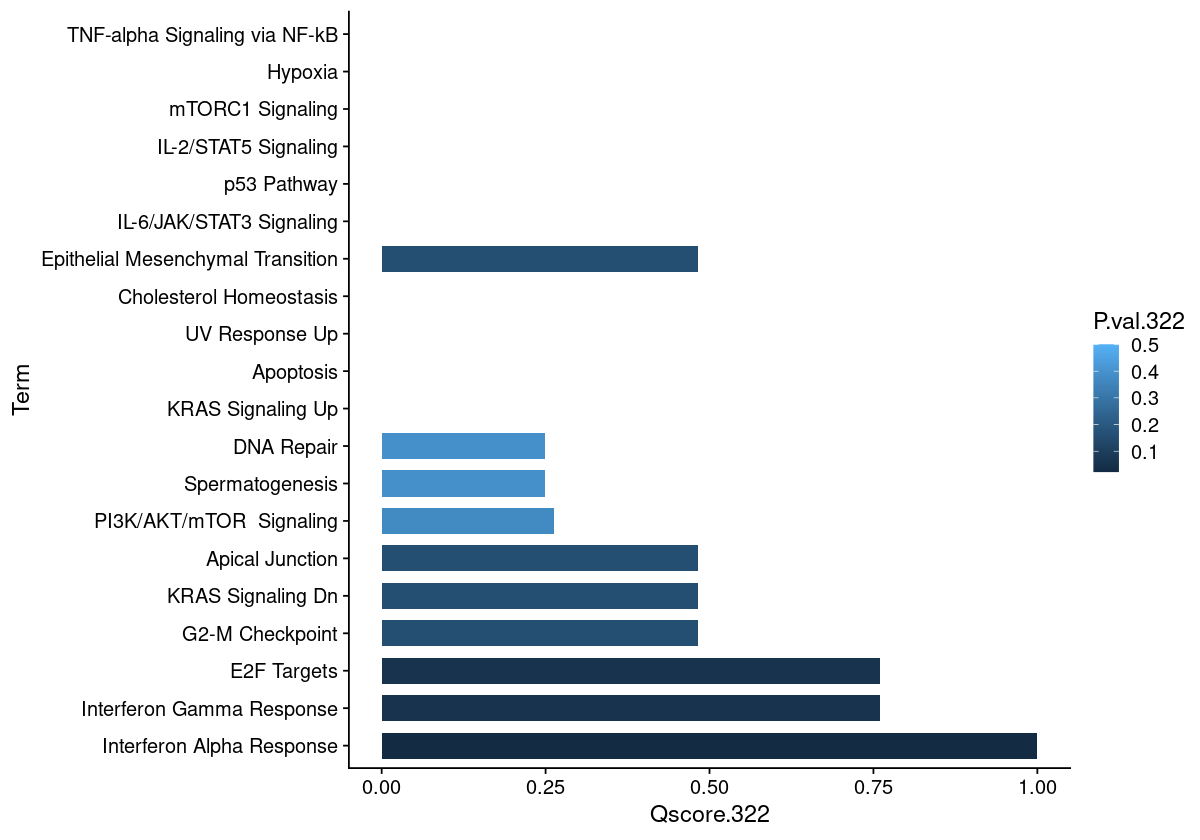

In [147]:
ggplot(t20.322.S914, aes(x = Term , y =  Qscore.322, 
                                  fill=P.val.322)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 0.1)) + coord_flip()

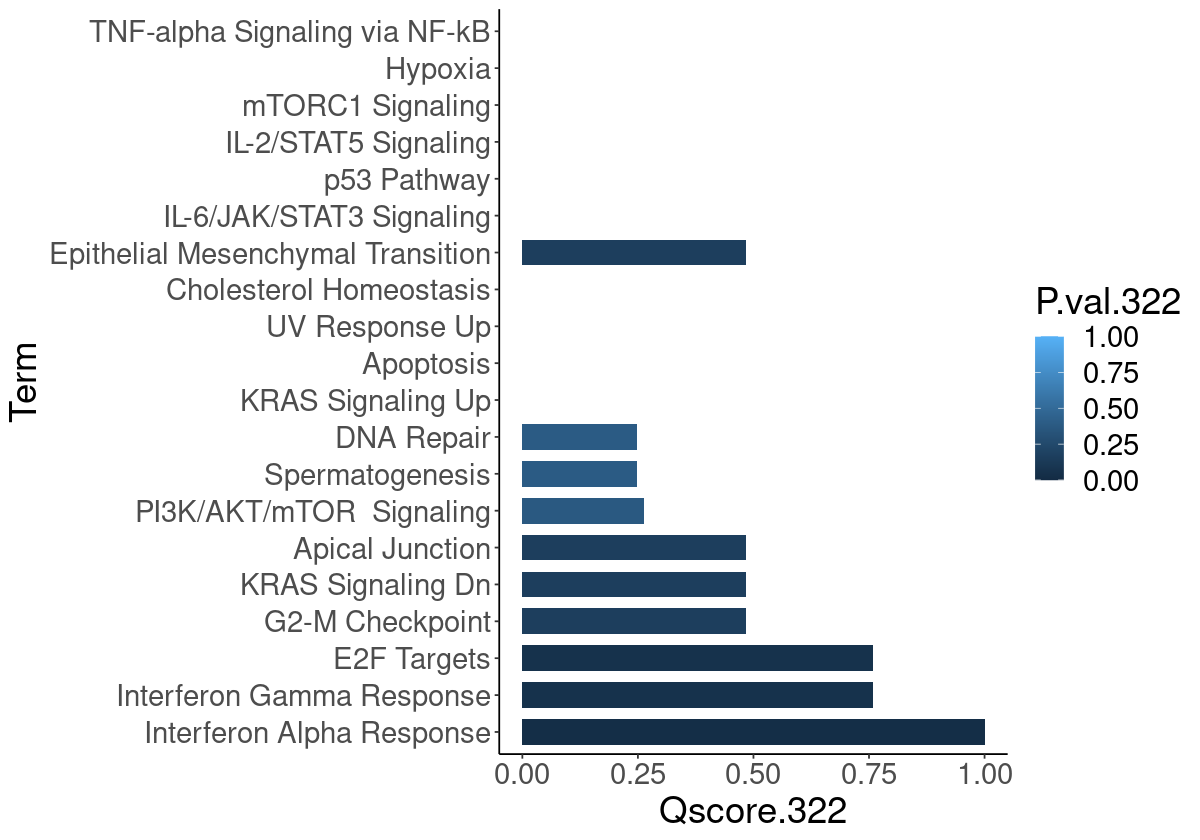

In [148]:
ggplot(t20.322.S914, aes(x = Term, y = Qscore.322, fill = P.val.322)) +
  geom_col(width = 0.7) +
  scale_fill_gradient(limits = c(0, 1)) +  # Use scale_fill_gradient for color fill
  coord_flip() +
  theme_bw() +
  theme(
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(colour = "black"),
    text = element_text(size = 22, color = "black")  # Adjust the text size and color
  )

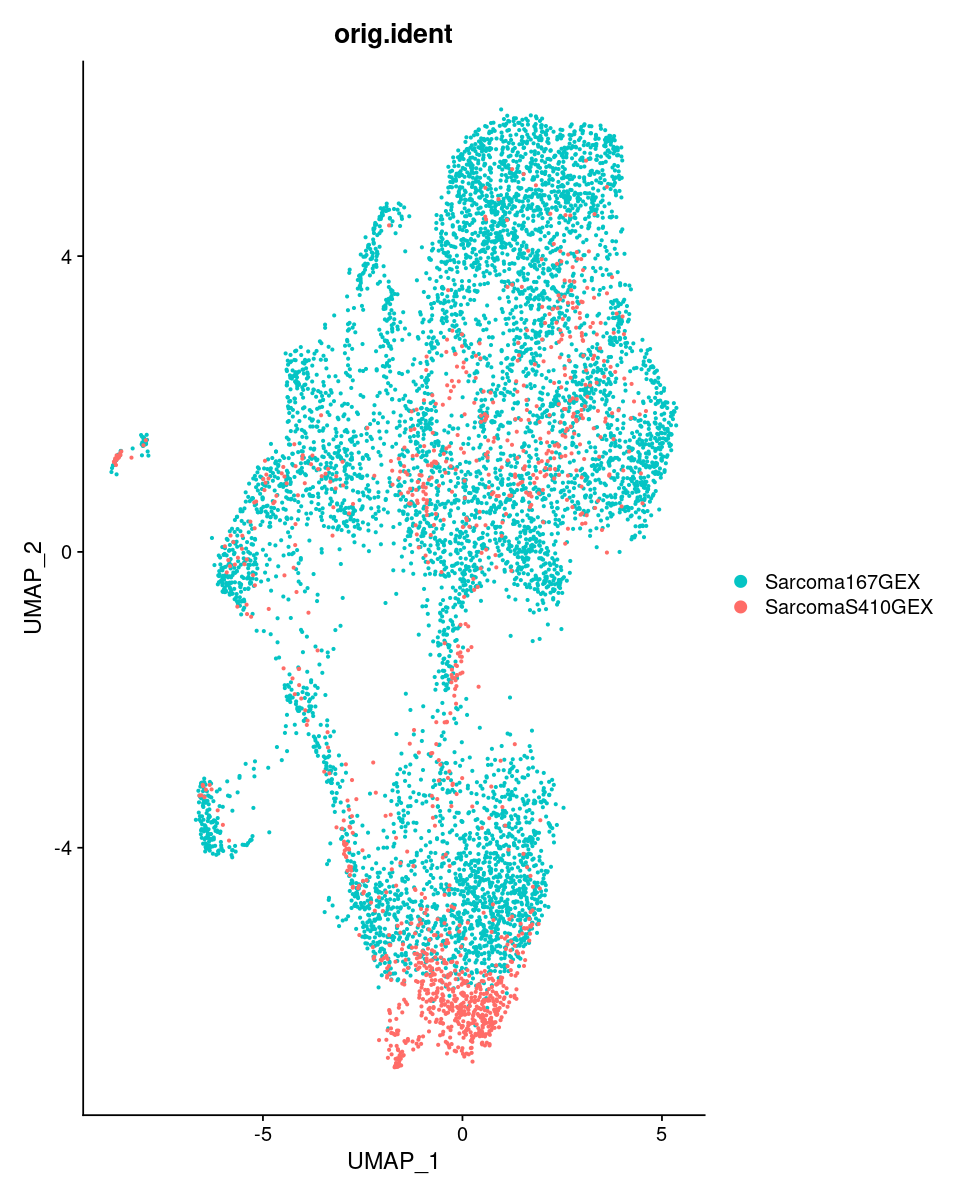

In [47]:
DimPlot(object = samp1_167_S410, 
         pt.size = 0.5,
        reduction = 'umap', group.by = 'orig.ident',
        cols = c('Sarcoma167GEX' = '#04c4c4', 'SarcomaS410GEX' = '#ff6c67')
        )

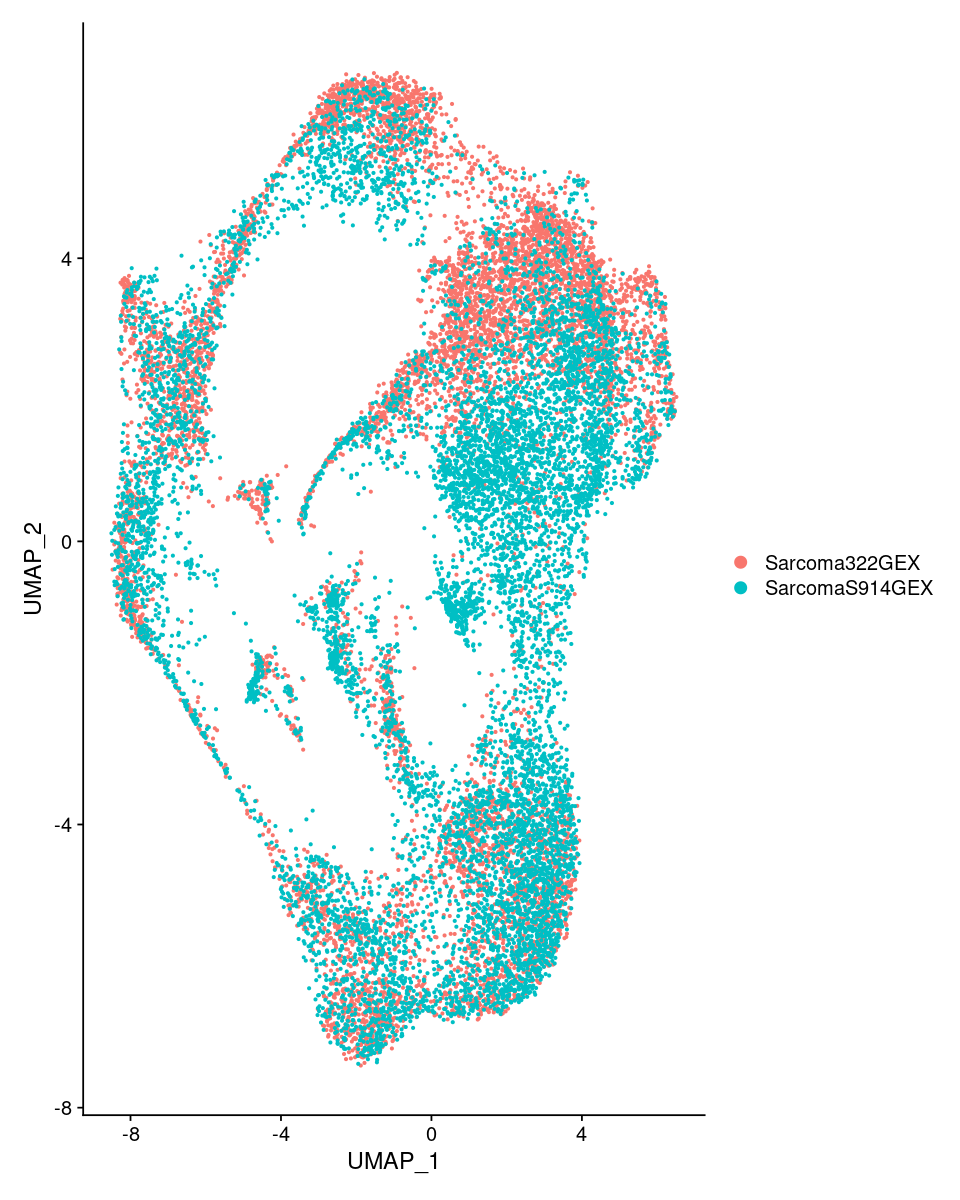

In [48]:
options(repr.plot.width=8, repr.plot.height=10)

DimPlot(samp1_322_S914, pt.size = 0.5)

In [49]:
samp1_322_S914@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GGTGCGTAGATATGGT-1_1 Sarcoma322GEX  39310      7499         0.15263292
AGCAGCCAGCACCGCT-1_1 Sarcoma322GEX  35518      7204         0.34067234
AAGCCGCTCGTTTATC-1_1 Sarcoma322GEX  34701      7150         0.17002392
CACCTTGAGGCGCTCT-1_1 Sarcoma322GEX  34358      7067         0.25903720
ATTATCCAGCTGCAAG-1_1 Sarcoma322GEX  34195      7459         0.09650534
GACGTTAGTTCCACAA-1_1 Sarcoma322GEX  34122      7363         0.44252975
CTTGGCTGTTAAGATG-1_1 Sarcoma322GEX  33816      7263         0.45836291
CGGACTGAGCGTAATA-1_1 Sarcoma322GEX  33486      7454         0.30759123
CTTCTCTTCTTTAGTC-1_1 Sarcoma322GEX  33378      7262         0.47336569
GCACATAGTACTCGCG-1_1 Sarcoma322GEX  32976      7199         0.81877729
CGCTATCAGAGTCTGG-1_1 Sarcoma322GEX  32893      7477         0.41650199
TCAGGTATCGGTTAAC-1_1 Sarcoma322GEX  32681      7285         0.14687433
ATCATCTGTTGGAGGT-1_1 Sarcoma322GEX  32462      7486         0.47132031
CGCTGGAGTCACCCAG-1_1 Sarcoma322GEX  32414      7264         0.21595607
GTAACGTCAAGAGGCT-1_1 Sarcoma322GEX  32041      7396         0.55241722
CGTAGGCTCTTACCGC-1_1 Sarcoma322GEX  32078      7375         0.83234616
AACCGCGTCCAACCAA-1_1 Sarcoma322GEX  32038      7456         0.57119670
CCTACACGTCACCTAA-1_1 Sarcoma322GEX  31949      7115         0.39750853
TTGCGTCCAGTGACAG-1_1 Sarcoma322GEX  31935      7284         0.26929701
AAGGTTCCACCAACCG-1_1 Sarcoma322GEX  31870      7257         0.30749922
CAGCAGCAGCGTCAAG-1_1 Sarcoma322GEX  31712      6970         0.18604945
AGGTCCGGTATGCTTG-1_1 Sarcoma322GEX  31499      7239         0.87304359
TGGGCGTCACATGGGA-1_1 Sarcoma322GEX  31459      7341         0.49906227
ACGATGTCACACGCTG-1_1 Sarcoma322GEX  31409      6799         0.14963864
ATCATCTAGGAGCGAG-1_1 Sarcoma322GEX  31379      7185         0.20077122
GGACGTCTCAACGGCC-1_1 Sarcoma322GEX  31428      7450         1.40002546
TACACGACAAGTTAAG-1_1 Sarcoma322GEX  31387      7438         1.14059961
GTCTCGTTCGGAAACG-1_1 Sarcoma322GEX  31201      7357         0.45511362
GCATGCGAGACTTGAA-1_1 Sarcoma322GEX  31198      7432         0.82697609
CTGCCTAGTATTAGCC-1_1 Sarcoma322GEX  31167      7066         0.17326018
⋮                    ⋮              ⋮          ⋮            ⋮         
CGTCTACCATCCCATC-1_2 SarcomaS914GEX 686        553          2.3323615 
CACCAGGGTCACACGC-1_2 SarcomaS914GEX 610        481          8.1967213 
CTACGTCGTGTCTGAT-1_2 SarcomaS914GEX 710        588          0.9859155 
CCTAGCTAGACAATAC-1_2 SarcomaS914GEX 697        541          4.7345768 
TCAGATGAGACTAAGT-1_2 SarcomaS914GEX 688        577          1.7441860 
CCTATTATCCATGAAC-1_2 SarcomaS914GEX 635        501          8.9763780 
GCGACCATCTCGCATC-1_2 SarcomaS914GEX 662        494          1.6616314 
TGCTACCCACGTAAGG-1_2 SarcomaS914GEX 698        579          3.8681948 
TTCTCCTCACTTAAGC-1_2 SarcomaS914GEX 679        510          0.5891016 
CTGATAGAGCTAAGAT-1_2 SarcomaS914GEX 656        566          3.5060976 
GACGCGTTCGCAAGCC-1_2 SarcomaS914GEX 634        545          2.9968454 
GGGACCTAGAGTGAGA-1_2 SarcomaS914GEX 645        480          3.1007752 
CAAGAAATCGCTTAGA-1_2 SarcomaS914GEX 634        525          4.1009464 
GCTCCTATCAGTTAGC-1_2 SarcomaS914GEX 673        567          0.8915305 
CGCTTCAGTAGCCTAT-1_2 SarcomaS914GEX 685        595          2.4817518 
CAACCTCCATTGGCGC-1_2 SarcomaS914GEX 609        479          0.6568144 
ATCATGGAGGCCATAG-1_2 SarcomaS914GEX 621        508          1.4492754 
AAGGAGCAGACCCACC-1_2 SarcomaS914GEX 628        526          4.2993631 
GCTTCCACACACAGAG-1_2 SarcomaS914GEX 684        583          2.4853801 
CACTCCACAATGAAAC-1_2 SarcomaS914GEX 611        478          9.0016367 
GCATACAGTTACCAGT-1_2 SarcomaS914GEX 660        549          3.9393939 
GATCGATGTCATACTG-1_2 SarcomaS914GEX 624        520          2.4038462 
AGGGATGAGCGTGAGT-1_2 SarcomaS914GEX 612        527          4.0849673 
CGGGTCATCTTTAGGG-1_2 SarcomaS914GEX 669        557          1.0463378 
CTCACACCATGGAATA-1_2 SarcomaS914GEX 663      

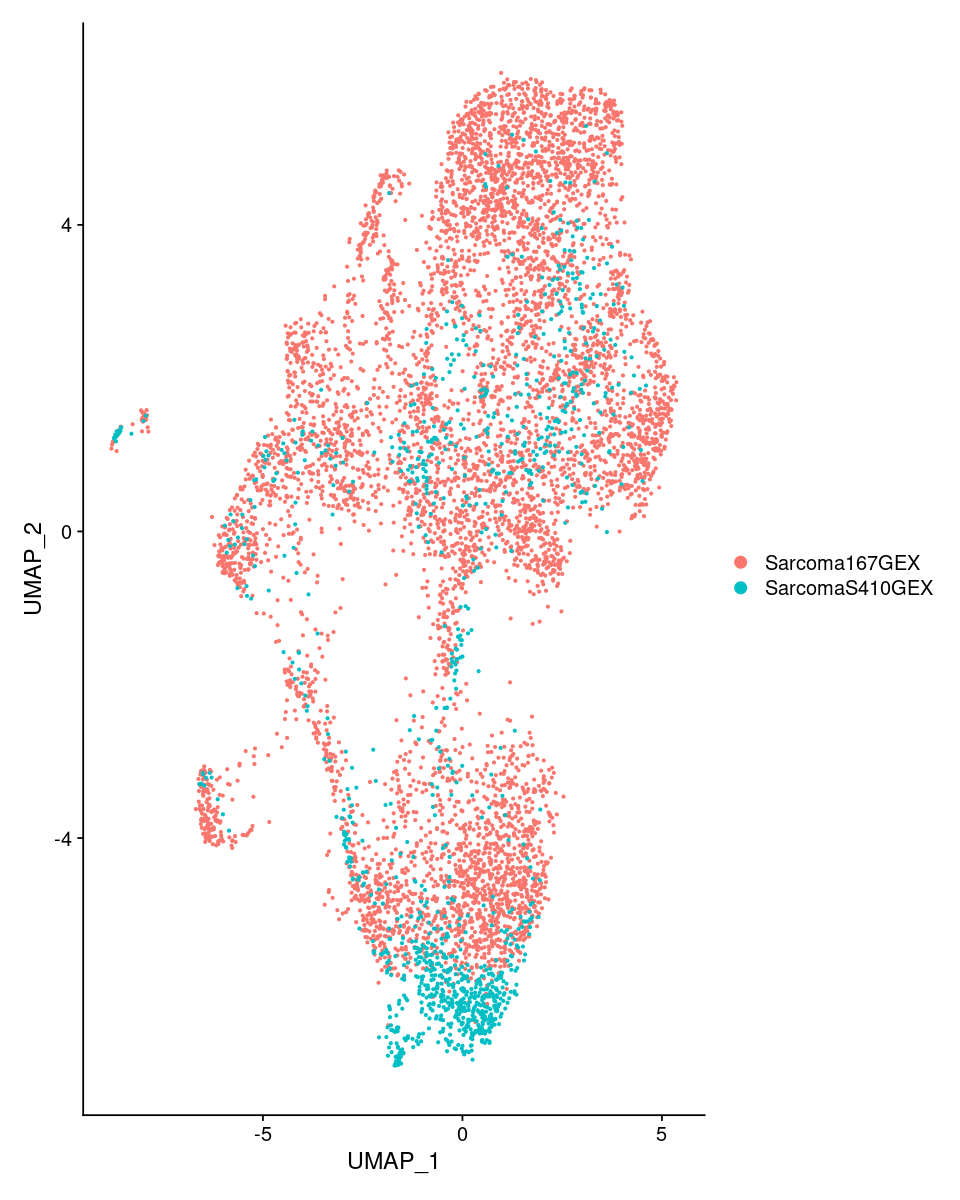

In [50]:
options(repr.plot.width=8, repr.plot.height=10)

DimPlot(samp1_167_S410, pt.size = 0.5)

In [51]:
samp1_322_S914 <- FindNeighbors(samp1_322_S914, dims = 1:30)
samp1_322_S914 <- FindClusters(samp1_322_S914)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18623
Number of edges: 714921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8605
Number of communities: 17
Elapsed time: 3 seconds


In [52]:
samp1_167_S410 <- FindNeighbors(samp1_167_S410, dims = 1:30)
samp1_167_S410 <- FindClusters(samp1_167_S410, resolution = 0.8)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7707
Number of edges: 296741

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8045
Number of communities: 16
Elapsed time: 0 seconds


In [53]:
samp1_167_S410@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GATTCAGAGCCGATTT-1_1 Sarcoma167GEX  39853      7432         0.63483301
ATCGAGTGTGCTTCTC-1_1 Sarcoma167GEX  39700      6956         2.20403023
CTAGAGTGTTCCCGAG-1_1 Sarcoma167GEX  39610      7439         1.52486746
TCTGAGACAATCCAAC-1_1 Sarcoma167GEX  39277      7151         0.04582835
GCATGATAGTGACTCT-1_1 Sarcoma167GEX  39329      7417         0.74245468
GAACCTAGTTTCCACC-1_1 Sarcoma167GEX  38867      7379         2.45195153
CATCAGAAGCTTTGGT-1_1 Sarcoma167GEX  38875      7188         1.56913183
GTTCGGGCACAGACAG-1_1 Sarcoma167GEX  38621      7399         0.44535356
CATGCCTTCCAAATGC-1_1 Sarcoma167GEX  38183      7046         1.91970249
GACAGAGTCGGATGTT-1_1 Sarcoma167GEX  38004      6891         1.75244711
GCTGCAGAGGGATACC-1_1 Sarcoma167GEX  38017      6679         2.14903859
GGAACTTCACATGTGT-1_1 Sarcoma167GEX  37787      7188         1.06915077
GTCATTTGTCATACTG-1_1 Sarcoma167GEX  37729      7258         1.09464868
CACAGTATCTTTAGGG-1_1 Sarcoma167GEX  37727      7273         0.02650622
GTTAAGCAGCAACGGT-1_1 Sarcoma167GEX  37419      6875         0.95406077
GTTACAGTCGGTCCGA-1_1 Sarcoma167GEX  37314      7441         0.20099694
CTCCTAGCAGTCCTTC-1_1 Sarcoma167GEX  37408      6855         2.58768178
TCGAGGCAGACTAAGT-1_1 Sarcoma167GEX  37395      6840         2.66078353
CAACCTCCACAGACAG-1_1 Sarcoma167GEX  36915      6979         0.65556007
ATCTACTAGAGTAAGG-1_1 Sarcoma167GEX  36864      7336         0.18717448
TTTGTCATCGTTACAG-1_1 Sarcoma167GEX  36794      7431         0.80719683
TCGAGGCTCACTTACT-1_1 Sarcoma167GEX  36745      7007         1.11035515
CATTCGCAGCGTTTAC-1_1 Sarcoma167GEX  36109      7156         1.78071949
CACTCCAAGCAATATG-1_1 Sarcoma167GEX  35662      7376         1.10481745
GAAGCAGCACAGCGTC-1_1 Sarcoma167GEX  35665      7357         1.75522221
ATCATCTCAGCCAATT-1_1 Sarcoma167GEX  35550      7240         0.30098453
TTGCGTCTCGCGGATC-1_1 Sarcoma167GEX  35203      7031         1.76689487
TTGTAGGCAATGAATG-1_1 Sarcoma167GEX  35144      7253         1.86660596
GATGAGGAGAAGATTC-1_1 Sarcoma167GEX  35147      7434         2.88502575
TTGCCGTCAAATACAG-1_1 Sarcoma167GEX  35051      7098         0.99854498
⋮                    ⋮              ⋮          ⋮            ⋮         
CGAGAAGTCGTTTGCC-1_2 SarcomaS410GEX 675        535          0.1481481 
AGCTTGACAGTAAGCG-1_2 SarcomaS410GEX 678        549          1.3274336 
AGGGTGAGTCCGCTGA-1_2 SarcomaS410GEX 603        452          9.1210614 
CTCAGAAAGAAGATTC-1_2 SarcomaS410GEX 643        489          3.5769829 
AAGGTTCTCCTGTAGA-1_2 SarcomaS410GEX 668        522          3.8922156 
GTGAAGGTCGCCATAA-1_2 SarcomaS410GEX 627        488          0.4784689 
TACAGTGGTTATCCGA-1_2 SarcomaS410GEX 644        524          0.9316770 
TGTGTTTGTCAGCTAT-1_2 SarcomaS410GEX 616        477          2.4350649 
CGTTCTGCACATGTGT-1_2 SarcomaS410GEX 650        515          0.0000000 
CACACAATCCCAGGTG-1_2 SarcomaS410GEX 646        478          0.3095975 
GTGCTTCTCCTTTACA-1_2 SarcomaS410GEX 611        513          0.3273322 
ACGGGTCCAAAGCGGT-1_2 SarcomaS410GEX 654        518          2.7522936 
AACTCAGGTGACCAAG-1_2 SarcomaS410GEX 628        465          3.0254777 
CGCCAAGCACACGCTG-1_2 SarcomaS410GEX 673        532          0.0000000 
GAACGGAGTTATCGGT-1_2 SarcomaS410GEX 659        455          0.7587253 
GCACTCTGTGCTGTAT-1_2 SarcomaS410GEX 632        510          0.4746835 
TGCGTGGAGTATTGGA-1_2 SarcomaS410GEX 617        448          4.8622366 
CCTCAGTTCCATGAAC-1_2 SarcomaS410GEX 661        499          7.2617247 
TGAGAGGGTCGCCATG-1_2 SarcomaS410GEX 615        459          0.3252033 
GCGACCAAGCCCAGCT-1_2 SarcomaS410GEX 612        458          0.8169935 
TAGTTGGAGACAAAGG-1_2 SarcomaS410GEX 641        472          1.7160686 
TTGGCAACACGGCCAT-1_2 SarcomaS410GEX 616        472          0.3246753 
TACTCGCAGCCACGCT-1_2 SarcomaS410GEX 637        535          2.3547881 
CCATGTCAGACCGGAT-1_2 SarcomaS410GEX 621        468          0.4830918 
CACAGGCCACCGAATT-1_2 SarcomaS410GEX 604      

In [54]:
res = 0.8
samp1_167_S410 <- FindClusters(samp1_167_S410, resolution = res)
samp1_167_S410 <- RunUMAP(object = samp1_167_S410, dims = 1:30)
count_table <- table(samp1_167_S410@meta.data$integrated_snn_res.0.8, samp1_167_S410@meta.data$orig.ident)

# Create a table of percentages
percentage_table <- prop.table(count_table, margin = 1) * 100

percentage_table

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7707
Number of edges: 296741

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8045
Number of communities: 16
Elapsed time: 0 seconds


17:02:42 UMAP embedding parameters a = 0.9922 b = 1.112

17:02:42 Read 7707 rows and found 30 numeric columns

17:02:42 Using Annoy for neighbor search, n_neighbors = 30

17:02:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:02:44 Writing NN index file to temp file /tmp/RtmpjT2Eaa/file16e829fbb0e5

17:02:44 Searching Annoy index using 1 thread, search_k = 3000

17:02:46 Annoy recall = 100%

17:02:47 Commencing smooth kNN distance calibration using 1 thread

17:02:50 Initializing from normalized Laplacian + noise

17:02:50 Commencing optimization for 500 epochs, with 350428 positive edges

17:03:00 Optimization finished



    
     Sarcoma167GEX SarcomaS410GEX
  0     74.5039683     25.4960317
  1     99.3945510      0.6054490
  2     71.3849287     28.6150713
  3     60.2284528     39.7715472
  4     94.6236559      5.3763441
  5     84.3853821     15.6146179
  6     99.7979798      0.2020202
  7     99.7647059      0.2352941
  8     88.9460154     11.0539846
  9    100.0000000      0.0000000
  10    97.9661017      2.0338983
  11    90.8536585      9.1463415
  12   100.0000000      0.0000000
  13    92.8571429      7.1428571
  14    67.2413793     32.7586207
  15     1.9230769     98.0769231

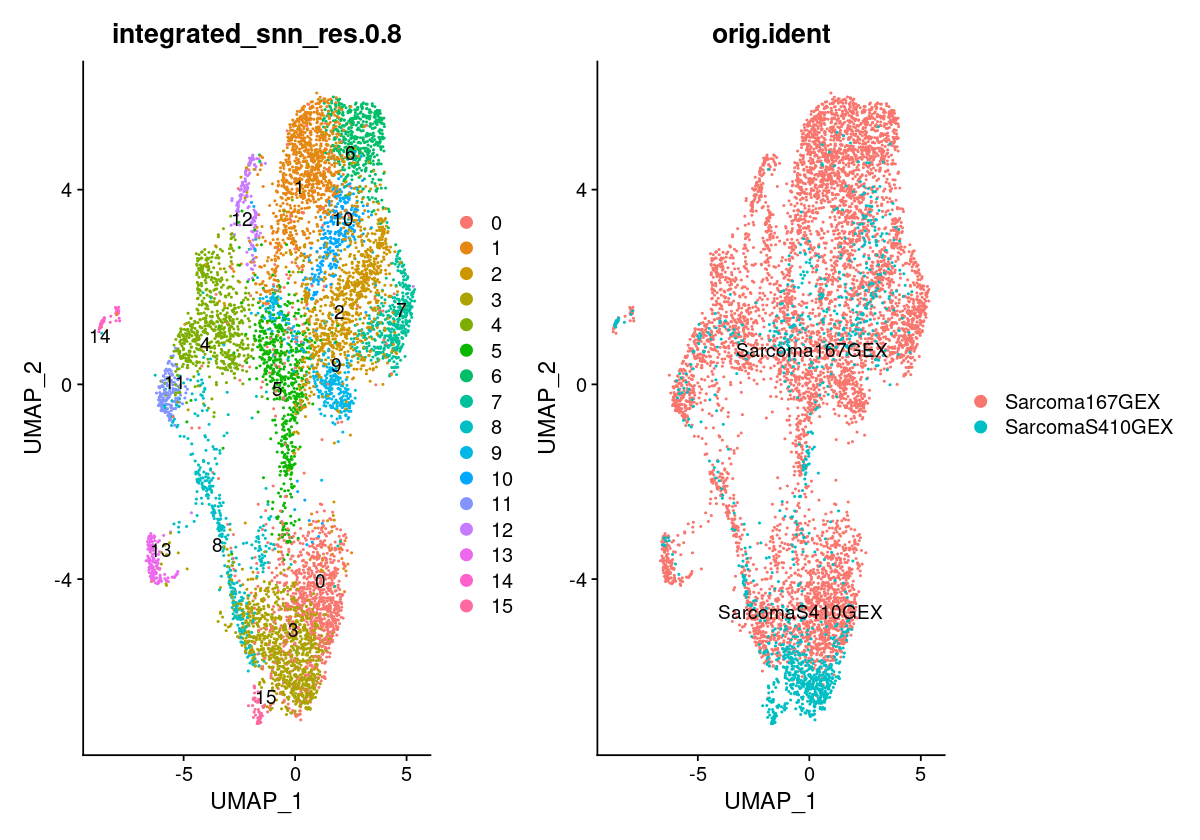

In [55]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(object = samp1_167_S410, 
reduction = 'umap',group.by=c("integrated_snn_res.0.8",'orig.ident' ), label = TRUE, repel = TRUE)


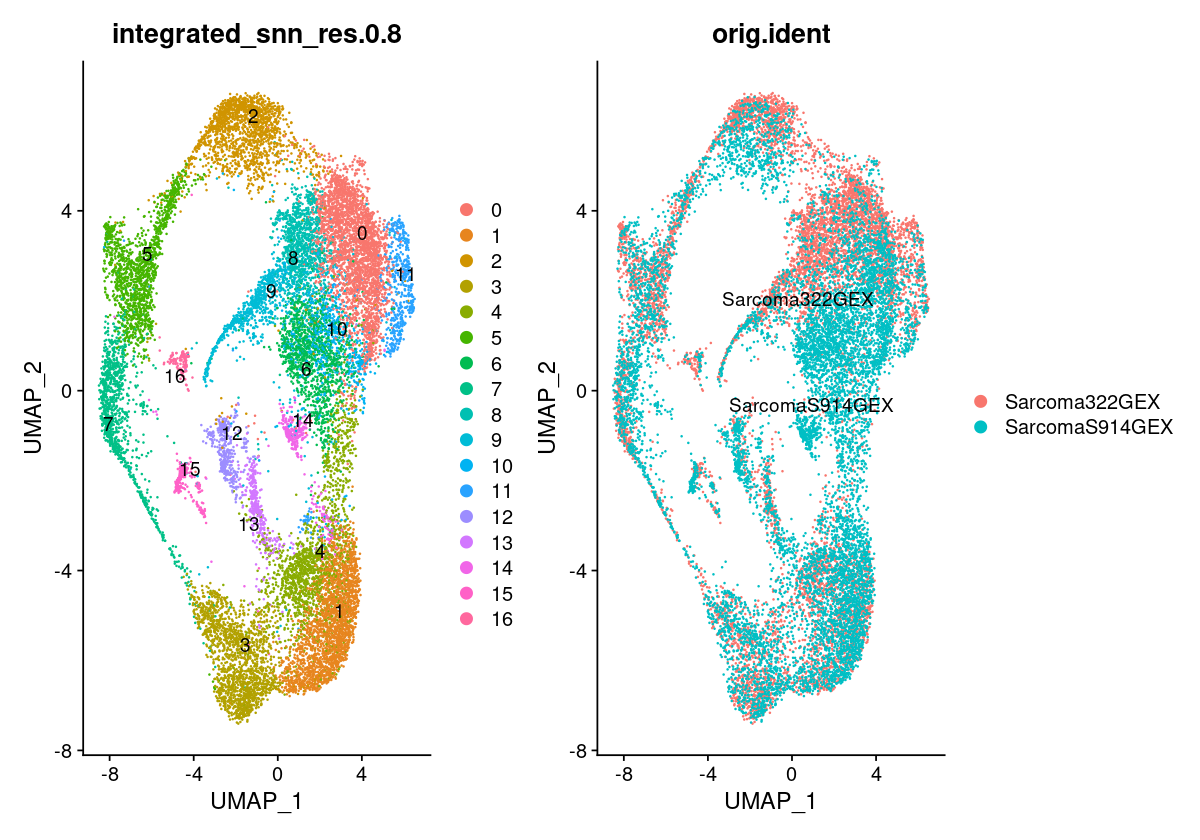

In [56]:
DimPlot(object = samp1_322_S914, 
reduction = 'umap',group.by=c("integrated_snn_res.0.8",'orig.ident') , label = TRUE, repel = TRUE)


In [57]:
count_table <- table(samp1_322_S914@meta.data$integrated_snn_res.0.8, samp1_322_S914@meta.data$orig.ident)

# Create a table of percentages
percentage_table <- prop.table(count_table, margin = 1) * 100

percentage_table

    
     Sarcoma322GEX SarcomaS914GEX
  0      57.080683      42.919317
  1      37.813620      62.186380
  2      58.774539      41.225461
  3      47.552870      52.447130
  4      35.125000      64.875000
  5      59.840426      40.159574
  6       8.933002      91.066998
  7      39.672429      60.327571
  8      79.584121      20.415879
  9      65.810277      34.189723
  10      2.809917      97.190083
  11     57.473310      42.526690
  12     19.315403      80.684597
  13     47.521866      52.478134
  14      0.000000     100.000000
  15     34.375000      65.625000
  16     73.076923      26.923077

In [58]:
count_table <- table(samp1_167_S410@meta.data$integrated_snn_res.0.8, samp1_167_S410@meta.data$orig.ident)

# Create a table of percentages
percentage_table <- prop.table(count_table, margin = 1) * 100

percentage_table

    
     Sarcoma167GEX SarcomaS410GEX
  0     74.5039683     25.4960317
  1     99.3945510      0.6054490
  2     71.3849287     28.6150713
  3     60.2284528     39.7715472
  4     94.6236559      5.3763441
  5     84.3853821     15.6146179
  6     99.7979798      0.2020202
  7     99.7647059      0.2352941
  8     88.9460154     11.0539846
  9    100.0000000      0.0000000
  10    97.9661017      2.0338983
  11    90.8536585      9.1463415
  12   100.0000000      0.0000000
  13    92.8571429      7.1428571
  14    67.2413793     32.7586207
  15     1.9230769     98.0769231

In [59]:
Idents(samp1_167_S410)

GATTCAGAGCCGATTT-1_1 ATCGAGTGTGCTTCTC-1_1 CTAGAGTGTTCCCGAG-1_1 
                   4                    5                   11 
TCTGAGACAATCCAAC-1_1 GCATGATAGTGACTCT-1_1 GAACCTAGTTTCCACC-1_1 
                   5                    7                    4 
CATCAGAAGCTTTGGT-1_1 GTTCGGGCACAGACAG-1_1 CATGCCTTCCAAATGC-1_1 
                   5                    2                    5 
GACAGAGTCGGATGTT-1_1 GCTGCAGAGGGATACC-1_1 GGAACTTCACATGTGT-1_1 
                  11                    5                    4 
GTCATTTGTCATACTG-1_1 CACAGTATCTTTAGGG-1_1 GTTAAGCAGCAACGGT-1_1 
                   4                    5                   11 
GTTACAGTCGGTCCGA-1_1 CTCCTAGCAGTCCTTC-1_1 TCGAGGCAGACTAAGT-1_1 
                   4                   11                    5 
CAACCTCCACAGACAG-1_1 ATCTACTAGAGTAAGG-1_1 TTTGTCATCGTTACAG-1_1 
                   7                    7                   12 
TCGAGGCTCACTTACT-1_1 CATTCGCAGCGTTTAC-1_1 CACTCCAAGCAATATG-1_1 
                   6                    4                    4 
GAAGCAGCACAGCGTC-1_1 ATCATCTCAGCCAATT-1_1 TTGCGTCTCGCGGATC-1_1 
                  12                    5                    5 
TTGTAGGCAATGAATG-1_1 GATGAGGAGAAGATTC-1_1 TTGCCGTCAAATACAG-1_1 
                   5                    4                    4 
GGATTACCATTCACTT-1_1 GCTGGGTAGGATCGCA-1_1 CGTCACTCAAGGTTTC-1_1 
                   9                    4                    4 
TACTCGCAGCAGCCTC-1_1 CTAGAGTAGGCCGAAT-1_1 GTTACAGCAGCAGTTT-1_1 
                   7                   12                    7 
CCTATTAAGTGATCGG-1_1 GACGGCTTCATAGCAC-1_1 CCACTACAGTAGCCGA-1_1 
                   7                    2                   12 
TGCTGCTTCAGTTTGG-1_1 TCAGCAACACTACAGT-1_1 CCGTTCACAGTAACGG-1_1 
                   4                    4                   12 
AATCGGTCATTGGCGC-1_1 ACATGGTGTGAAATCA-1_1 AGATCTGGTGCCTGGT-1_1 
                   2                   10                    5 
CGTCAGGAGGGAACGG-1_1 TGAGCCGAGTGGGTTG-1_1 ACGATGTAGATCGGGT-1_1 
                   4                    7                    4 
GTCATTTCACTCTGTC-1_1 CAAGATCAGAGTACAT-1_1 TGATTTCGTGGACGAT-1_1 
                   7                    4                    4 
GGTGTTAAGAGGTAGA-1_1 AACACGTAGGTGGGTT-1_1 ACCCACTGTCAAGCGA-1_1 
                   5                    2                    4 
ACGTCAATCCAAACTG-1_1 TAGAGCTAGACTCGGA-1_1 CTCGGGAGTGCACTTA-1_1 
                   4                    5                    2 
AGGTCCGCAAGCCGTC-1_1 CGAGCCAGTGAGGGTT-1_1 TGCTACCAGCCGATTT-1_1 
                   5                    5                    7 
CATCGGGCAAAGGTGC-1_1 GGTGAAGCATATGCTG-1_1 GACCAATCAGCCTTTC-1_1 
                   5                    7                   10 
CGGAGTCGTCCTCTTG-1_1 GTTAAGCAGGCAGTCA-1_1 GGAAAGCGTAAATGTG-1_1 
                  11                    6                    2 
GGAGCAACATGGTCTA-1_1 CGACTTCCAGTCGTGC-1_1 CAACCAATCGAGGTAG-1_1 
                   5                    4                    2 
TAGGCATAGTCGTACT-1_1 TGAAAGACAAGTTGTC-1_1 ACACTGAAGTCGTACT-1_1 
                   1                    2                    2 
TGGTTAGCACGAAGCA-1_1 TCTGAGAAGACAATAC-1_1 TCGCGAGGTGTTTGTG-1_1 
                   4                    4                   12 
AGCTCCTTCAACGGCC-1_1 TGCGCAGTCCTGCTTG-1_1 ACAGCTACACCGTTGG-1_1 
                   5                   11                    6 
GCGGGTTCAAAGGTGC-1_1 GTGGGTCAGTCTCCTC-1_1 TTCTTAGGTAGGGTAC-1_1 
                   4                   11                    5 
GCGCCAAGTCCTAGCG-1_1 CATTCGCGTGAGCGAT-1_1 TAAGTGCGTGAGTGAC-1_1 
                   7                    4                    5 
GTACTTTTCAAGGCTT-1_1 TGTTCCGAGAACAACT-1_1 CAGCAGCGTTGCCTCT-1_1 
                   7                    4                    1 
AGCTCTCTCTTGTATC-1_1 CTCACACTCATTCACT-1_1 GTGAAGGAGGCTAGAC-1_1 
                   4                    6                    9 
GATCGCGGTAGGCTGA-1_1 GACAGAGGTAAATACG-1_1 GTCACAAAGTGTCCCG-1_1 
                   1                    4                    2 
TGCCAAACACCCTATC-1_1 TTCTCAATCGC

In [60]:
samp1_167_S410@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GATTCAGAGCCGATTT-1_1 Sarcoma167GEX  39853      7432         0.63483301
ATCGAGTGTGCTTCTC-1_1 Sarcoma167GEX  39700      6956         2.20403023
CTAGAGTGTTCCCGAG-1_1 Sarcoma167GEX  39610      7439         1.52486746
TCTGAGACAATCCAAC-1_1 Sarcoma167GEX  39277      7151         0.04582835
GCATGATAGTGACTCT-1_1 Sarcoma167GEX  39329      7417         0.74245468
GAACCTAGTTTCCACC-1_1 Sarcoma167GEX  38867      7379         2.45195153
CATCAGAAGCTTTGGT-1_1 Sarcoma167GEX  38875      7188         1.56913183
GTTCGGGCACAGACAG-1_1 Sarcoma167GEX  38621      7399         0.44535356
CATGCCTTCCAAATGC-1_1 Sarcoma167GEX  38183      7046         1.91970249
GACAGAGTCGGATGTT-1_1 Sarcoma167GEX  38004      6891         1.75244711
GCTGCAGAGGGATACC-1_1 Sarcoma167GEX  38017      6679         2.14903859
GGAACTTCACATGTGT-1_1 Sarcoma167GEX  37787      7188         1.06915077
GTCATTTGTCATACTG-1_1 Sarcoma167GEX  37729      7258         1.09464868
CACAGTATCTTTAGGG-1_1 Sarcoma167GEX  37727      7273         0.02650622
GTTAAGCAGCAACGGT-1_1 Sarcoma167GEX  37419      6875         0.95406077
GTTACAGTCGGTCCGA-1_1 Sarcoma167GEX  37314      7441         0.20099694
CTCCTAGCAGTCCTTC-1_1 Sarcoma167GEX  37408      6855         2.58768178
TCGAGGCAGACTAAGT-1_1 Sarcoma167GEX  37395      6840         2.66078353
CAACCTCCACAGACAG-1_1 Sarcoma167GEX  36915      6979         0.65556007
ATCTACTAGAGTAAGG-1_1 Sarcoma167GEX  36864      7336         0.18717448
TTTGTCATCGTTACAG-1_1 Sarcoma167GEX  36794      7431         0.80719683
TCGAGGCTCACTTACT-1_1 Sarcoma167GEX  36745      7007         1.11035515
CATTCGCAGCGTTTAC-1_1 Sarcoma167GEX  36109      7156         1.78071949
CACTCCAAGCAATATG-1_1 Sarcoma167GEX  35662      7376         1.10481745
GAAGCAGCACAGCGTC-1_1 Sarcoma167GEX  35665      7357         1.75522221
ATCATCTCAGCCAATT-1_1 Sarcoma167GEX  35550      7240         0.30098453
TTGCGTCTCGCGGATC-1_1 Sarcoma167GEX  35203      7031         1.76689487
TTGTAGGCAATGAATG-1_1 Sarcoma167GEX  35144      7253         1.86660596
GATGAGGAGAAGATTC-1_1 Sarcoma167GEX  35147      7434         2.88502575
TTGCCGTCAAATACAG-1_1 Sarcoma167GEX  35051      7098         0.99854498
⋮                    ⋮              ⋮          ⋮            ⋮         
CGAGAAGTCGTTTGCC-1_2 SarcomaS410GEX 675        535          0.1481481 
AGCTTGACAGTAAGCG-1_2 SarcomaS410GEX 678        549          1.3274336 
AGGGTGAGTCCGCTGA-1_2 SarcomaS410GEX 603        452          9.1210614 
CTCAGAAAGAAGATTC-1_2 SarcomaS410GEX 643        489          3.5769829 
AAGGTTCTCCTGTAGA-1_2 SarcomaS410GEX 668        522          3.8922156 
GTGAAGGTCGCCATAA-1_2 SarcomaS410GEX 627        488          0.4784689 
TACAGTGGTTATCCGA-1_2 SarcomaS410GEX 644        524          0.9316770 
TGTGTTTGTCAGCTAT-1_2 SarcomaS410GEX 616        477          2.4350649 
CGTTCTGCACATGTGT-1_2 SarcomaS410GEX 650        515          0.0000000 
CACACAATCCCAGGTG-1_2 SarcomaS410GEX 646        478          0.3095975 
GTGCTTCTCCTTTACA-1_2 SarcomaS410GEX 611        513          0.3273322 
ACGGGTCCAAAGCGGT-1_2 SarcomaS410GEX 654        518          2.7522936 
AACTCAGGTGACCAAG-1_2 SarcomaS410GEX 628        465          3.0254777 
CGCCAAGCACACGCTG-1_2 SarcomaS410GEX 673        532          0.0000000 
GAACGGAGTTATCGGT-1_2 SarcomaS410GEX 659        455          0.7587253 
GCACTCTGTGCTGTAT-1_2 SarcomaS410GEX 632        510          0.4746835 
TGCGTGGAGTATTGGA-1_2 SarcomaS410GEX 617        448          4.8622366 
CCTCAGTTCCATGAAC-1_2 SarcomaS410GEX 661        499          7.2617247 
TGAGAGGGTCGCCATG-1_2 SarcomaS410GEX 615        459          0.3252033 
GCGACCAAGCCCAGCT-1_2 SarcomaS410GEX 612        458          0.8169935 
TAGTTGGAGACAAAGG-1_2 SarcomaS410GEX 641        472          1.7160686 
TTGGCAACACGGCCAT-1_2 SarcomaS410GEX 616        472          0.3246753 
TACTCGCAGCCACGCT-1_2 SarcomaS410GEX 637        535          2.3547881 
CCATGTCAGACCGGAT-1_2 SarcomaS410GEX 621        468          0.4830918 
CACAGGCCACCGAATT-1_2 SarcomaS410GEX 604      

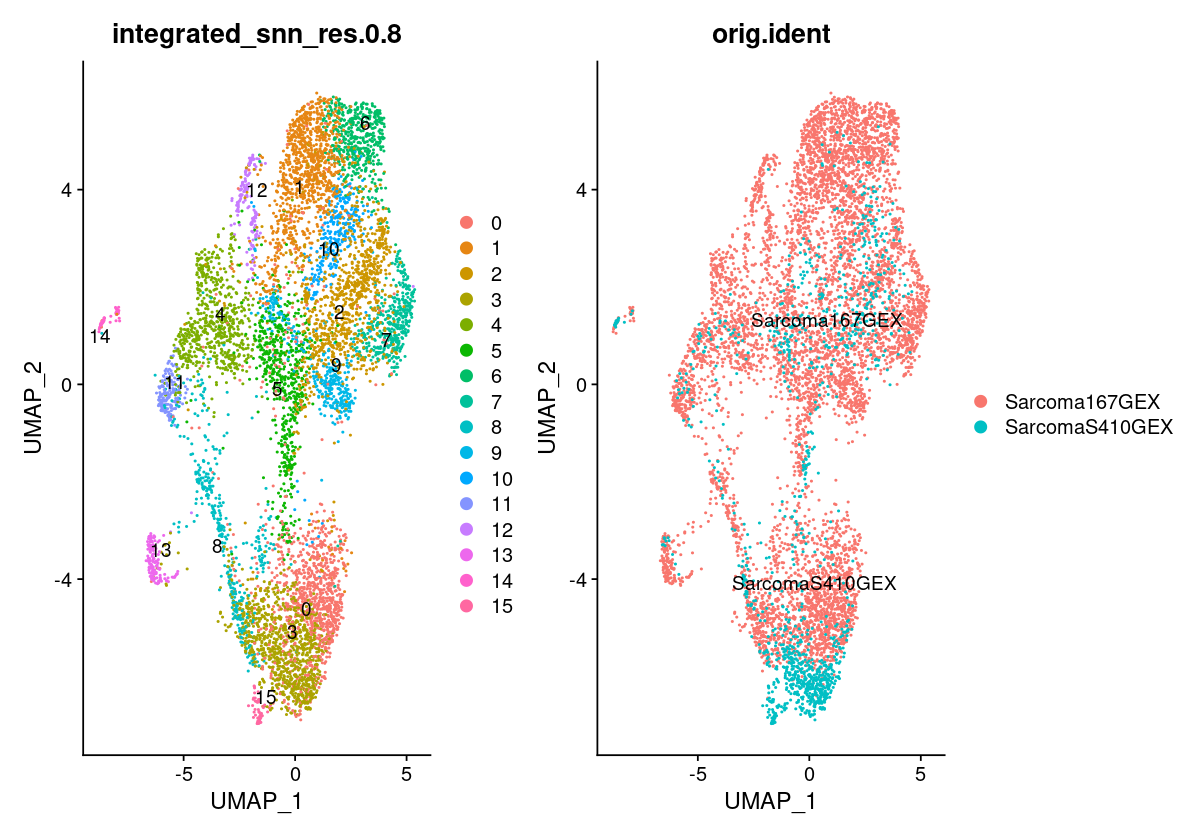

In [61]:
DimPlot(object = samp1_167_S410, 
reduction = 'umap',group.by=c("integrated_snn_res.0.8",'orig.ident') , label = TRUE, repel = TRUE)


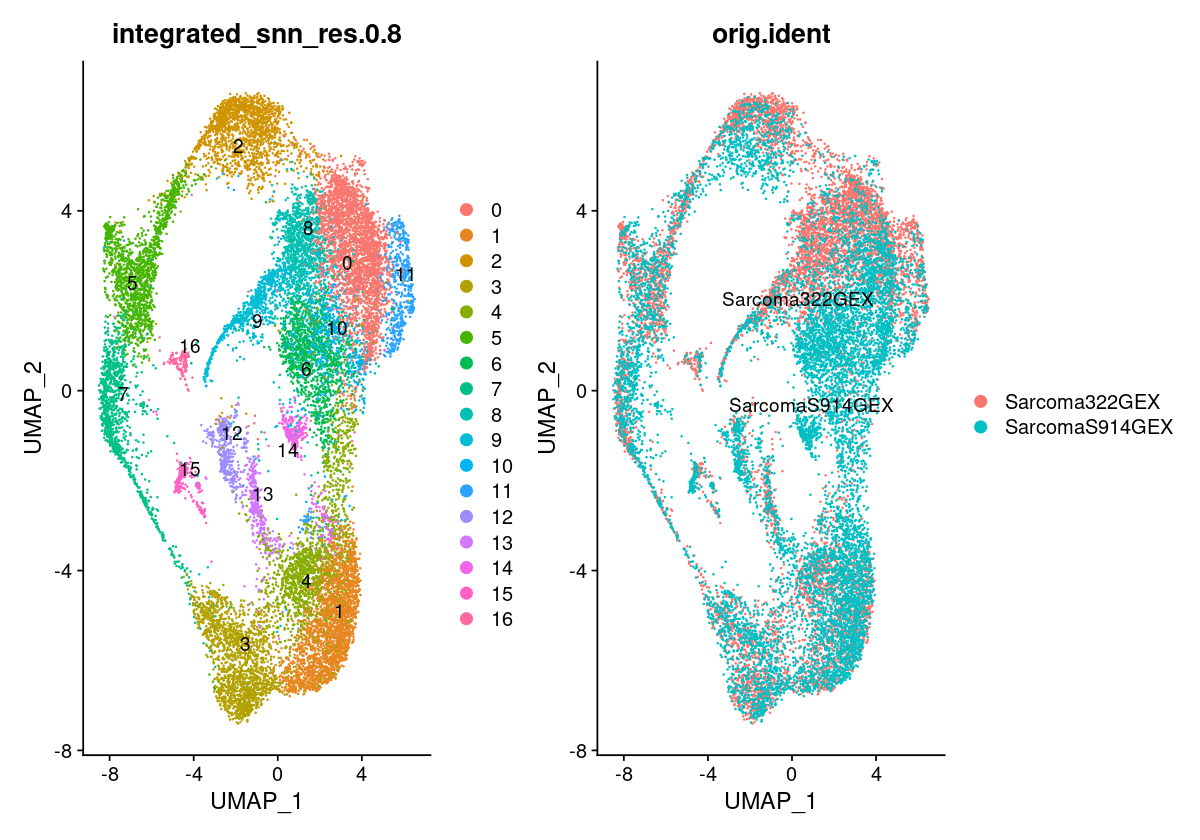

In [62]:
DimPlot(object = samp1_322_S914, 
reduction = 'umap',group.by=c("integrated_snn_res.0.8",'orig.ident') , label = TRUE, repel = TRUE)


In [63]:
samp1_167_S410@meta.data$cancer_types <- "responsive_clones"
samp1_167_S410$cancer_types[samp1_167_S410$integrated_snn_res.0.8 %in% c(3,14,15)] <- "resistant_clones"
#samp1_167_S410$cancer_types[samp1_167_S410$integrated_snn_res.0.8 %in% c(1,4,6,7,9,10,11,12,13)] <- "responsive"
saveRDS(samp1_167_S410, "data/sarcoma_all/Sarcoma167_S410_tumor_clustered_labeled.rds")
write.csv(samp1_167_S410@meta.data, "data/sarcoma_all/Sarcoma167_S410_tumor_clustered_labeled_metadata.csv")


In [64]:
samp1_167_S410@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GATTCAGAGCCGATTT-1_1 Sarcoma167GEX  39853      7432         0.63483301
ATCGAGTGTGCTTCTC-1_1 Sarcoma167GEX  39700      6956         2.20403023
CTAGAGTGTTCCCGAG-1_1 Sarcoma167GEX  39610      7439         1.52486746
TCTGAGACAATCCAAC-1_1 Sarcoma167GEX  39277      7151         0.04582835
GCATGATAGTGACTCT-1_1 Sarcoma167GEX  39329      7417         0.74245468
GAACCTAGTTTCCACC-1_1 Sarcoma167GEX  38867      7379         2.45195153
CATCAGAAGCTTTGGT-1_1 Sarcoma167GEX  38875      7188         1.56913183
GTTCGGGCACAGACAG-1_1 Sarcoma167GEX  38621      7399         0.44535356
CATGCCTTCCAAATGC-1_1 Sarcoma167GEX  38183      7046         1.91970249
GACAGAGTCGGATGTT-1_1 Sarcoma167GEX  38004      6891         1.75244711
GCTGCAGAGGGATACC-1_1 Sarcoma167GEX  38017      6679         2.14903859
GGAACTTCACATGTGT-1_1 Sarcoma167GEX  37787      7188         1.06915077
GTCATTTGTCATACTG-1_1 Sarcoma167GEX  37729      7258         1.09464868
CACAGTATCTTTAGGG-1_1 Sarcoma167GEX  37727      7273         0.02650622
GTTAAGCAGCAACGGT-1_1 Sarcoma167GEX  37419      6875         0.95406077
GTTACAGTCGGTCCGA-1_1 Sarcoma167GEX  37314      7441         0.20099694
CTCCTAGCAGTCCTTC-1_1 Sarcoma167GEX  37408      6855         2.58768178
TCGAGGCAGACTAAGT-1_1 Sarcoma167GEX  37395      6840         2.66078353
CAACCTCCACAGACAG-1_1 Sarcoma167GEX  36915      6979         0.65556007
ATCTACTAGAGTAAGG-1_1 Sarcoma167GEX  36864      7336         0.18717448
TTTGTCATCGTTACAG-1_1 Sarcoma167GEX  36794      7431         0.80719683
TCGAGGCTCACTTACT-1_1 Sarcoma167GEX  36745      7007         1.11035515
CATTCGCAGCGTTTAC-1_1 Sarcoma167GEX  36109      7156         1.78071949
CACTCCAAGCAATATG-1_1 Sarcoma167GEX  35662      7376         1.10481745
GAAGCAGCACAGCGTC-1_1 Sarcoma167GEX  35665      7357         1.75522221
ATCATCTCAGCCAATT-1_1 Sarcoma167GEX  35550      7240         0.30098453
TTGCGTCTCGCGGATC-1_1 Sarcoma167GEX  35203      7031         1.76689487
TTGTAGGCAATGAATG-1_1 Sarcoma167GEX  35144      7253         1.86660596
GATGAGGAGAAGATTC-1_1 Sarcoma167GEX  35147      7434         2.88502575
TTGCCGTCAAATACAG-1_1 Sarcoma167GEX  35051      7098         0.99854498
⋮                    ⋮              ⋮          ⋮            ⋮         
CGAGAAGTCGTTTGCC-1_2 SarcomaS410GEX 675        535          0.1481481 
AGCTTGACAGTAAGCG-1_2 SarcomaS410GEX 678        549          1.3274336 
AGGGTGAGTCCGCTGA-1_2 SarcomaS410GEX 603        452          9.1210614 
CTCAGAAAGAAGATTC-1_2 SarcomaS410GEX 643        489          3.5769829 
AAGGTTCTCCTGTAGA-1_2 SarcomaS410GEX 668        522          3.8922156 
GTGAAGGTCGCCATAA-1_2 SarcomaS410GEX 627        488          0.4784689 
TACAGTGGTTATCCGA-1_2 SarcomaS410GEX 644        524          0.9316770 
TGTGTTTGTCAGCTAT-1_2 SarcomaS410GEX 616        477          2.4350649 
CGTTCTGCACATGTGT-1_2 SarcomaS410GEX 650        515          0.0000000 
CACACAATCCCAGGTG-1_2 SarcomaS410GEX 646        478          0.3095975 
GTGCTTCTCCTTTACA-1_2 SarcomaS410GEX 611        513          0.3273322 
ACGGGTCCAAAGCGGT-1_2 SarcomaS410GEX 654        518          2.7522936 
AACTCAGGTGACCAAG-1_2 SarcomaS410GEX 628        465          3.0254777 
CGCCAAGCACACGCTG-1_2 SarcomaS410GEX 673        532          0.0000000 
GAACGGAGTTATCGGT-1_2 SarcomaS410GEX 659        455          0.7587253 
GCACTCTGTGCTGTAT-1_2 SarcomaS410GEX 632        510          0.4746835 
TGCGTGGAGTATTGGA-1_2 SarcomaS410GEX 617        448          4.8622366 
CCTCAGTTCCATGAAC-1_2 SarcomaS410GEX 661        499          7.2617247 
TGAGAGGGTCGCCATG-1_2 SarcomaS410GEX 615        459          0.3252033 
GCGACCAAGCCCAGCT-1_2 SarcomaS410GEX 612        458          0.8169935 
TAGTTGGAGACAAAGG-1_2 SarcomaS410GEX 641        472          1.7160686 
TTGGCAACACGGCCAT-1_2 SarcomaS410GEX 616        472          0.3246753 
TACTCGCAGCCACGCT-1_2 SarcomaS410GEX 637        535          2.3547881 
CCATGTCAGACCGGAT-1_2 SarcomaS410GEX 621        468          0.4830918 
CACAGGCCACCGAATT-1_2 SarcomaS410GEX 604      

In [65]:
#samp1_167_S410@meta.data$cancer_types <- "S410"
#samp1_167_S410$cancer_types[samp1_167_S410$integrated_snn_res.0.8 %in% c(0, 2, 3,5,8,14,15)] <- "shared"
#samp1_167_S410$cancer_types[samp1_167_S410$integrated_snn_res.0.8 %in% c(1,4,6,7,9,10,11,12,13)] <- "167"
#samp1_167_S410$cancer_types[samp1_167_S410$integrated_snn_res.0.8 %in% c(3,14,15)] <- "shared"
#samp1_167_S410$cancer_types[samp1_167_S410$integrated_snn_res.0.8 %in% c(1,0,2,5,8,4,6,7,9,10,11,12,13)] <- "167"

samp1_322_S914@meta.data$cancer_types <- "322"
samp1_322_S914$cancer_types[samp1_322_S914$integrated_snn_res.0.8 %in% c(0,1,2,3,4,5,7,9,11,13,15,16)] <- "shared"
samp1_322_S914$cancer_types[samp1_322_S914$integrated_snn_res.0.8 %in% c(6,8,10,12,14)] <- "S914"


In [66]:
Idents(samp1_167_S410) <- "cancer_types"
mark.167_S410 <- FindAllMarkers(samp1_167_S410)

Calculating cluster responsive_clones

Calculating cluster resistant_clones



In [67]:
Idents(samp1_322_S914) <- "cancer_types"
mark.322_S914 <- FindAllMarkers(samp1_322_S914)

Calculating cluster shared

Calculating cluster S914



In [68]:
samp1_167_S410@meta.data

orig.ident     nCount_RNA nFeature_RNA percent.mt
GATTCAGAGCCGATTT-1_1 Sarcoma167GEX  39853      7432         0.63483301
ATCGAGTGTGCTTCTC-1_1 Sarcoma167GEX  39700      6956         2.20403023
CTAGAGTGTTCCCGAG-1_1 Sarcoma167GEX  39610      7439         1.52486746
TCTGAGACAATCCAAC-1_1 Sarcoma167GEX  39277      7151         0.04582835
GCATGATAGTGACTCT-1_1 Sarcoma167GEX  39329      7417         0.74245468
GAACCTAGTTTCCACC-1_1 Sarcoma167GEX  38867      7379         2.45195153
CATCAGAAGCTTTGGT-1_1 Sarcoma167GEX  38875      7188         1.56913183
GTTCGGGCACAGACAG-1_1 Sarcoma167GEX  38621      7399         0.44535356
CATGCCTTCCAAATGC-1_1 Sarcoma167GEX  38183      7046         1.91970249
GACAGAGTCGGATGTT-1_1 Sarcoma167GEX  38004      6891         1.75244711
GCTGCAGAGGGATACC-1_1 Sarcoma167GEX  38017      6679         2.14903859
GGAACTTCACATGTGT-1_1 Sarcoma167GEX  37787      7188         1.06915077
GTCATTTGTCATACTG-1_1 Sarcoma167GEX  37729      7258         1.09464868
CACAGTATCTTTAGGG-1_1 Sarcoma167GEX  37727      7273         0.02650622
GTTAAGCAGCAACGGT-1_1 Sarcoma167GEX  37419      6875         0.95406077
GTTACAGTCGGTCCGA-1_1 Sarcoma167GEX  37314      7441         0.20099694
CTCCTAGCAGTCCTTC-1_1 Sarcoma167GEX  37408      6855         2.58768178
TCGAGGCAGACTAAGT-1_1 Sarcoma167GEX  37395      6840         2.66078353
CAACCTCCACAGACAG-1_1 Sarcoma167GEX  36915      6979         0.65556007
ATCTACTAGAGTAAGG-1_1 Sarcoma167GEX  36864      7336         0.18717448
TTTGTCATCGTTACAG-1_1 Sarcoma167GEX  36794      7431         0.80719683
TCGAGGCTCACTTACT-1_1 Sarcoma167GEX  36745      7007         1.11035515
CATTCGCAGCGTTTAC-1_1 Sarcoma167GEX  36109      7156         1.78071949
CACTCCAAGCAATATG-1_1 Sarcoma167GEX  35662      7376         1.10481745
GAAGCAGCACAGCGTC-1_1 Sarcoma167GEX  35665      7357         1.75522221
ATCATCTCAGCCAATT-1_1 Sarcoma167GEX  35550      7240         0.30098453
TTGCGTCTCGCGGATC-1_1 Sarcoma167GEX  35203      7031         1.76689487
TTGTAGGCAATGAATG-1_1 Sarcoma167GEX  35144      7253         1.86660596
GATGAGGAGAAGATTC-1_1 Sarcoma167GEX  35147      7434         2.88502575
TTGCCGTCAAATACAG-1_1 Sarcoma167GEX  35051      7098         0.99854498
⋮                    ⋮              ⋮          ⋮            ⋮         
CGAGAAGTCGTTTGCC-1_2 SarcomaS410GEX 675        535          0.1481481 
AGCTTGACAGTAAGCG-1_2 SarcomaS410GEX 678        549          1.3274336 
AGGGTGAGTCCGCTGA-1_2 SarcomaS410GEX 603        452          9.1210614 
CTCAGAAAGAAGATTC-1_2 SarcomaS410GEX 643        489          3.5769829 
AAGGTTCTCCTGTAGA-1_2 SarcomaS410GEX 668        522          3.8922156 
GTGAAGGTCGCCATAA-1_2 SarcomaS410GEX 627        488          0.4784689 
TACAGTGGTTATCCGA-1_2 SarcomaS410GEX 644        524          0.9316770 
TGTGTTTGTCAGCTAT-1_2 SarcomaS410GEX 616        477          2.4350649 
CGTTCTGCACATGTGT-1_2 SarcomaS410GEX 650        515          0.0000000 
CACACAATCCCAGGTG-1_2 SarcomaS410GEX 646        478          0.3095975 
GTGCTTCTCCTTTACA-1_2 SarcomaS410GEX 611        513          0.3273322 
ACGGGTCCAAAGCGGT-1_2 SarcomaS410GEX 654        518          2.7522936 
AACTCAGGTGACCAAG-1_2 SarcomaS410GEX 628        465          3.0254777 
CGCCAAGCACACGCTG-1_2 SarcomaS410GEX 673        532          0.0000000 
GAACGGAGTTATCGGT-1_2 SarcomaS410GEX 659        455          0.7587253 
GCACTCTGTGCTGTAT-1_2 SarcomaS410GEX 632        510          0.4746835 
TGCGTGGAGTATTGGA-1_2 SarcomaS410GEX 617        448          4.8622366 
CCTCAGTTCCATGAAC-1_2 SarcomaS410GEX 661        499          7.2617247 
TGAGAGGGTCGCCATG-1_2 SarcomaS410GEX 615        459          0.3252033 
GCGACCAAGCCCAGCT-1_2 SarcomaS410GEX 612        458          0.8169935 
TAGTTGGAGACAAAGG-1_2 SarcomaS410GEX 641        472          1.7160686 
TTGGCAACACGGCCAT-1_2 SarcomaS410GEX 616        472          0.3246753 
TACTCGCAGCCACGCT-1_2 SarcomaS410GEX 637        535          2.3547881 
CCATGTCAGACCGGAT-1_2 SarcomaS410GEX 621        468          0.4830918 
CACAGGCCACCGAATT-1_2 SarcomaS410GEX 604      

In [69]:
mark.167_S410[mark.167_S410$cluster == "responsive_clones" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene

[1] "AP005262.2"  "IL1RAPL1"    "HPSE2"       "AC024901.1"  "DCLK1"      
  [6] "YAP1"        "EBF1"        "CDK14"       "ZFPM2"       "CCDC102B"   
 [11] "TSHZ2"       "PARD3"       "SLIT2"       "SUPT3H"      "ZCCHC7"     
 [16] "MAGI2"       "LHFPL6"      "MEIS2"       "CENPP"       "GPC6"       
 [21] "RBMS3"       "DOK6"        "CACNA2D1"    "NLGN4Y"      "DGKB"       
 [26] "MEG8"        "TANC2"       "SLC24A3"     "SETBP1"      "NSMCE2"     
 [31] "ERG"         "BICC1"       "PLXDC2"      "EXOC4"       "ENOX1"      
 [36] "PIEZO2"      "GTDC1"       "FBXL17"      "MAML2"       "LCORL"      
 [41] "CCNH"        "AC107223.1"  "STARD13"     "SLC7A11"     "ZNF536"     
 [46] "F13A1"       "BNC2"        "ZBTB20"      "SLC39A11"    "ADGRA3"     
 [51] "HULC"        "EDA"         "FBXL7"       "DLEU2"       "LAMA2"      
 [56] "DLC1"        "C1orf21"     "CAMKMT"      "CYP7B1"      "ARHGAP24"   
 [61] "PRKG1"       "RAB28"       "LINC00894"   "ELL2"        "MAGI3"      
 [66] "CREB5"       "ARHGAP42"    "BCAS3"       "TTTY14"      "MIR99AHG"   
 [71] "NCALD"       "LDB2"        "FAM110B"     "SLCO3A1"     "PSD3"       
 [76] "ARL15"       "PRIM2"       "AL008633.1"  "PRKACB"      "DDAH1"      
 [81] "FAM155A"     "SLC8A1"      "PBX1"        "MEF2A"       "CHSY3"      
 [86] "ZEB2"        "CASC15"      "NCKAP5"      "TAPT1-AS1"   "BACH1"      
 [91] "RBPJ"        "DLG2"        "ARHGAP6"     "MCC"         "PARD3B"     
 [96] "MSC-AS1"     "SGCD"        "CLEC2D"      "FRMD6"       "PAM"        
[101] "FBN2"        "ADGRL3"      "RORA"        "ADCY2"       "PDE4D"      
[106] "LINC00968"   "TRPS1"       "TMEM108"     "ITGA1"       "CRADD"      
[111] "ADAM12"      "SGIP1"       "APBB2"       "MIR181A1HG"  "RBFOX2"     
[116] "SDK1"        "SMYD3"       "AOAH"        "SSBP2"       "DLGAP1"     
[121] "ALPK1"       "MAST4"       "FAM13A"      "OXR1"        "APBA1"      
[126] "PDZRN3"      "CDH11"       "GUCY1A2"     "ZMAT4"       "ABCA9"      
[131] "ARHGAP28"    "MEIS1"       "ADAMTS12"    "AC009271.1"  "PDE10A"     
[136] "USP9Y"       "CADM1"       "TMEM131L"    "KCND2"       "CAMK2D"     
[141] "MMP16"       "MSRB3"       "MAPK10"      "USP25"       "RIN2"       
[146] "GULP1"       "IFI44"       "ADGRB3"      "DOCK10"      "WWOX"       
[151] "TMEM135"     "CTNNA3"      "NFIA"        "DYRK1A"      "PPP2R2A"    
[156] "PCDH7"       "ANO4"        "NAV2"        "UST"         "PDGFC"      
[161] "EPS8"        "DCLK2"       "PLSCR4"      "FAR2"        "PLCB1"      
[166] "SLC12A2"     "PDE4B"       "AC245297.3"  "NEGR1"       "PREX2"      
[171] "LINC01091"   "TMEM117"     "CACHD1"      "ATP13A3"     "EXT1"       
[176] "AC034268.2"  "GRIA3"       "SEMA3A"      "DPYD"        "RUNX1"      
[181] "FKBP5"       "SEMA5A"      "CSGALNACT1"  "PKNOX2"      "PPP3CC"     
[186] "SUGCT"       "ANK2"        "BACH2"       "LMCD1-AS1"   "BCL2"       
[191] "NSD2"        "CELF2"       "STIM2"       "LINC02476"   "AC093895.1" 
[196] "NBEA"        "RXFP1"       "AP002989.1"  "TLR2"        "SSH2"       
[201] "AFF3"        "SYNDIG1"     "PAPPA"       "AC090578.1"  "AC093916.1" 
[206] "RTTN"        "ZGRF1"       "NLGN1"       "ROR1"        "KHDRBS3"    
[211] "SOX5"        "ITFG1"       "TOP2A"       "HMGA2"       "MID1"       
[216] "SUCLA2"      "ANK3"        "WDR41"       "GRIK2"       "CD163"      
[221] "ZBTB16"      "THSD4"       "SHROOM3"     "NUSAP1"      "ITGB8"      
[226] "CENPF"       "NRXN3"       "FMNL2"       "SCN7A"       "GAB2"       
[231] "PDLIM3"      "LIMCH1"      "ADK"         "DEPTOR"      "AC104806.2" 
[236] "AL035401.1"  "ABCC9"       "BUB1B"       "PRC1"        "SMC4"       
[241] "POSTN"       "NKAIN3"      "PDE7B"       "GNA14"       "NOS1AP"     
[246] "AC022075.1"  "BRINP3"      "SHROOM4"     "KIF14"       "HGF"        
[251] "POLA1"       "RYR3"        "ABI3BP"      "DGKI"        "ATP10A"     
[256] "LRCH2"       "NOX4"        "CNKSR3"      "MDGA2"       "ANOS1"      
[261] "CDH18"       "COL21A1"     "SPC25"       "T

In [70]:
mark.167_S410[mark.167_S410$cluster == "resistant_clones" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene

[1] "IGHG1"     "RPLP1"     "RPLP2"     "RPL18A"    "RPL13A"    "UBB"      
  [7] "RPS28"     "TMSB4X"    "TPT1"      "RPS15"     "RPL28"     "B2M"      
 [13] "RPL37A"    "FTL"       "HLA-A"     "HLA-B"     "EEF1A1"    "TMSB10"   
 [19] "RIPOR3"    "RPL7"      "CFL1"      "LGALS1"    "HAS2"      "SLC20A1"  
 [25] "LINC00511" "ADAMTS14"  "RFX8"      "EGR1"      "CNIH3"     "H1F0"     
 [31] "NDRG1"     "RPS8"      "DOCK9"     "MYO10"     "F3"        "APOE"     
 [37] "PDZD2"     "ABTB2"     "SERPINE2"  "PHLDA1"    "MIR34AHG"  "ZBTB46"   
 [43] "EMP1"      "MARCKS"    "ADAMTS1"   "LUM"       "PPP2R3B"   "TNFAIP3"  
 [49] "SOD2"      "GFPT2"     "ACTG1"     "SPARCL1"   "RPL35"     "CCBE1"    
 [55] "RPL19"     "PLAT"      "HIST1H1E"  "FTH1"      "MMP1"      "NOTCH4"   
 [61] "ACTB"      "FLT1"      "A2M"       "EPB41L4A"  "PTPRB"     "PTMA"     
 [67] "C11orf96"  "IRF1"      "JDP2"      "TUBB"      "SERPINH1"  "TIPARP"   
 [73] "PPIA"      "COL23A1"   "TUBA1A"    "RPL32"     "EMCN"      "TIMP3"    
 [79] "CXCL5"     "DNAJB1"    "PCBP3"     "MT-ND1"    "H3F3B"     "ANGPTL4"  
 [85] "IGFBP5"    "LOXL2"     "SERPINE1"  "FAT1"      "RND3"      "HSPA5"    
 [91] "MT-CO2"    "PFN1"      "MT-ND4"    "TIMP1"     "MT-ND2"    "MGP"      
 [97] "UBC"       "MT-CO3"    "CALCRL"    "FBXO32"    "MT-ATP8"   "ADGRL4"   
[103] "CCN1"      "AKAP12"    "PFKFB4"    "PECAM1"    "CRISPLD2"  "CXCL1"    
[109] "ANGPT2"    "CXCL3"     "ADAMTSL1"  "ADAMTS9"   "COL3A1"    "MT-CYB"

In [92]:
genes = mark.167_S410[mark.167_S410$cluster == "responsive_clones" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene

print(genes)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_167 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
h_mut_enr_shared <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))


h_mut_enr_shared

  [1] "AP005262.2"  "IL1RAPL1"    "HPSE2"       "AC024901.1"  "DCLK1"      
  [6] "YAP1"        "EBF1"        "CDK14"       "ZFPM2"       "CCDC102B"   
 [11] "TSHZ2"       "PARD3"       "SLIT2"       "SUPT3H"      "ZCCHC7"     
 [16] "MAGI2"       "LHFPL6"      "MEIS2"       "CENPP"       "GPC6"       
 [21] "RBMS3"       "DOK6"        "CACNA2D1"    "NLGN4Y"      "DGKB"       
 [26] "MEG8"        "TANC2"       "SLC24A3"     "SETBP1"      "NSMCE2"     
 [31] "ERG"         "BICC1"       "PLXDC2"      "EXOC4"       "ENOX1"      
 [36] "PIEZO2"      "GTDC1"       "FBXL17"      "MAML2"       "LCORL"      
 [41] "CCNH"        "AC107223.1"  "STARD13"     "SLC7A11"     "ZNF536"     
 [46] "F13A1"       "BNC2"        "ZBTB20"      "SLC39A11"    "ADGRA3"     
 [51] "HULC"        "EDA"         "FBXL7"       "DLEU2"       "LAMA2"      
 [56] "DLC1"        "C1orf21"     "CAMKMT"      "CYP7B1"      "ARHGAP24"   
 [61] "PRKG1"       "RAB28"       "LINC00894"   "ELL2"        "MAGI3"      
 [66] "CREB5

[1] 39 10

[1] 1909   10

Term                              Overlap P.value      Adjusted.P.value
1  G2-M Checkpoint                   14/200  9.765308e-06 0.000380847     
2  Epithelial Mesenchymal Transition 11/200  7.021746e-04 0.013692404     
3  Mitotic Spindle                   10/199  2.370391e-03 0.023967371     
4  Estrogen Response Early           10/200  2.458192e-03 0.023967371     
5  UV Response Dn                    8/144   3.453144e-03 0.026934526     
6  E2F Targets                       9/200   7.816784e-03 0.050809095     
7  PI3K/AKT/mTOR  Signaling          4/105   1.066379e-01 0.508964677     
8  Hypoxia                           6/200   1.305038e-01 0.508964677     
9  Myogenesis                        6/200   1.305038e-01 0.508964677     
10 Inflammatory Response             6/200   1.305038e-01 0.508964677     
11 Estrogen Response Late            5/200   2.599188e-01 0.844736067     
12 Apical Junction                   5/200   2.599188e-01 0.844736067     
13 Notch Signaling                   1/32    4.253491e-01 0.969105275     
14 IL-6/JAK/STAT3 Signaling          2/87    4.412873e-01 0.969105275     
15 Hedgehog Signaling                1/36    4.638303e-01 0.969105275     
16 Angiogenesis                      1/36    4.638303e-01 0.969105275     
17 Androgen Response                 2/100   5.138515e-01 0.969105275     
18 Wnt-beta Catenin Signaling        1/42    5.167876e-01 0.969105275     
19 Apoptosis                         3/161   5.235517e-01 0.969105275     
20 Pperoxisome                       2/104   5.349008e-01 0.969105275     
21 Bile Acid Metabolism              2/112   5.750934e-01 0.969105275     
22 TNF-alpha Signaling via NF-kB     3/200   6.697284e-01 0.969105275     
23 Glycolysis                        3/200   6.697284e-01 0.969105275     
24 p53 Pathway                       3/200   6.697284e-01 0.969105275     
25 heme Metabolism                   3/200   6.697284e-01 0.969105275     
26 DNA Repair                        2/150   7.310811e-01 0.969105275     
27 Protein Secretion                 1/96    8.107463e-01 0.969105275     
28 Interferon Alpha Response         1/97    8.140076e-01 0.969105275     
29 IL-2/STAT5 Signaling              2/199   8.582870e-01 0.969105275     
30 Interferon Gamma Response         2/200   8.601917e-01 0.969105275     
31 Complement                        2/200   8.601917e-01 0.969105275     
32 Allograft Rejection               2/200   8.601917e-01 0.969105275     
33 KRAS Signaling Up                 2/200   8.601917e-01 0.969105275     
34 KRAS Signaling Dn                 2/200   8.601917e-01 0.969105275     
35 Spermatogenesis                   1/135   9.039845e-01 0.969105275     
36 Fatty Acid Metabolism             1/158   9.356912e-01 0.969105275     
37 UV Response Up                    1/158   9.356912e-01 0.969105275     
38 mTORC1 Signaling                  1/200   9.691053e-01 0.969105275     
39 Oxidative Phosphorylation         1/200   9.691053e-01 0.969105275     
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0           0                    4.4545871  51.391120848  
2  0           0                    3.4128259  24.781650107  
3  0           0                    3.0932520  18.697781542  
4  0           0                    3.0768137  18.486509270  
5  0           0                    3.4277436  19.430062093  
6  0           0                    2.7462457  13.323361956  
7  0           0                    2.2846462   5.113759866  
8  0           0                    1.7861972   3.637328392  
9  0           0                    1.7861972   3.637328392  
10 0           0                    1.7861972   3.637328392  
11 0           0                    1.4764072   1.989290486  
12 0           0                    1.4764072   1.989290486  
13 0           0                    1.8511602   1.582454958  
14 0           0                    1.3504916   1.104781982  
15 0           0                    1.6392648   1.259343007  
16 0       

In [93]:
genes = mark.167_S410[mark.167_S410$cluster == "resistant_clones" & mark.167_S410$p_val_adj < 0.05 & 
              mark.167_S410$avg_log2FC >0, ]$gene

dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_167 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)

h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- h_mut_enr1
print(genes)
h_mut_enr_167 <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
h_mut_enr_167
h_mut_enr_167 <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
h_mut_enr_167

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1] 37 10

[1] 1115   10

  [1] "IGHG1"     "RPLP1"     "RPLP2"     "RPL18A"    "RPL13A"    "UBB"      
  [7] "RPS28"     "TMSB4X"    "TPT1"      "RPS15"     "RPL28"     "B2M"      
 [13] "RPL37A"    "FTL"       "HLA-A"     "HLA-B"     "EEF1A1"    "TMSB10"   
 [19] "RIPOR3"    "RPL7"      "CFL1"      "LGALS1"    "HAS2"      "SLC20A1"  
 [25] "LINC00511" "ADAMTS14"  "RFX8"      "EGR1"      "CNIH3"     "H1F0"     
 [31] "NDRG1"     "RPS8"      "DOCK9"     "MYO10"     "F3"        "APOE"     
 [37] "PDZD2"     "ABTB2"     "SERPINE2"  "PHLDA1"    "MIR34AHG"  "ZBTB46"   
 [43] "EMP1"      "MARCKS"    "ADAMTS1"   "LUM"       "PPP2R3B"   "TNFAIP3"  
 [49] "SOD2"      "GFPT2"     "ACTG1"     "SPARCL1"   "RPL35"     "CCBE1"    
 [55] "RPL19"     "PLAT"      "HIST1H1E"  "FTH1"      "MMP1"      "NOTCH4"   
 [61] "ACTB"      "FLT1"      "A2M"       "EPB41L4A"  "PTPRB"     "PTMA"     
 [67] "C11orf96"  "IRF1"      "JDP2"      "TUBB"      "SERPINH1"  "TIPARP"   
 [73] "PPIA"      "COL23A1"   "TUBA1A"    "RPL32"     "EMCN"    

Term                              Overlap P.value      Adjusted.P.value
1  Epithelial Mesenchymal Transition 14/200  8.235016e-12 3.046956e-10    
2  TNF-alpha Signaling via NF-kB     13/200  1.209651e-10 2.237854e-09    
3  Complement                        11/200  1.990820e-08 2.455345e-07    
4  Coagulation                       8/138   1.246817e-06 1.153306e-05    
5  Hypoxia                           9/200   2.189201e-06 1.350007e-05    
6  KRAS Signaling Up                 9/200   2.189201e-06 1.350007e-05    
7  Apoptosis                         8/161   3.956808e-06 2.091456e-05    
8  UV Response Dn                    7/144   1.875632e-05 8.674799e-05    
9  Interferon Gamma Response         6/200   1.010944e-03 3.740494e-03    
10 Inflammatory Response             6/200   1.010944e-03 3.740494e-03    
11 Angiogenesis                      3/36    1.122812e-03 3.776732e-03    
12 IL-6/JAK/STAT3 Signaling          4/87    1.548861e-03 4.775653e-03    
13 Androgen Response                 4/100   2.578499e-03 7.338804e-03    
14 Adipogenesis                      4/200   2.764671e-02 6.393303e-02    
15 Apical Junction                   4/200   2.764671e-02 6.393303e-02    
16 mTORC1 Signaling                  4/200   2.764671e-02 6.393303e-02    
17 Reactive Oxygen Species Pathway   2/49    3.182471e-02 6.926554e-02    
18 TGF-beta Signaling                2/54    3.802332e-02 7.815906e-02    
19 UV Response Up                    3/158   6.171575e-02 1.201833e-01    
20 IL-2/STAT5 Signaling              3/199   1.051683e-01 1.710828e-01    
21 Interferon Alpha Response         2/97    1.058887e-01 1.710828e-01    
22 Glycolysis                        3/200   1.063488e-01 1.710828e-01    
23 Allograft Rejection               3/200   1.063488e-01 1.710828e-01    
24 PI3K/AKT/mTOR  Signaling          2/105   1.206734e-01 1.860382e-01    
25 Wnt-beta Catenin Signaling        1/42    2.136328e-01 3.161766e-01    
26 Xenobiotic Metabolism             2/200   3.159765e-01 4.496589e-01    
27 Cholesterol Homeostasis           1/74    3.454334e-01 4.733717e-01    
28 Pperoxisome                       1/104   4.490082e-01 5.933322e-01    
29 Unfolded Protein Response         1/113   4.767846e-01 6.083114e-01    
30 Fatty Acid Metabolism             1/158   5.961648e-01 6.830467e-01    
31 Mitotic Spindle                   1/199   6.812114e-01 6.830467e-01    
32 G2-M Checkpoint                   1/200   6.830467e-01 6.830467e-01    
33 Estrogen Response Early           1/200   6.830467e-01 6.830467e-01    
34 Myogenesis                        1/200   6.830467e-01 6.830467e-01    
35 E2F Targets                       1/200   6.830467e-01 6.830467e-01    
36 Myc Targets V1                    1/200   6.830467e-01 6.830467e-01    
37 p53 Pathway                       1/200   6.830467e-01 6.830467e-01    
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0           0                    14.8279570 378.4483977   
2  0           0                    13.5589029 309.6245912   
3  0           0                    11.1299635 197.3580063   
4  0           0                    11.4693759 155.9252114   
5  0           0                     8.8384443 115.1823767   
6  0           0                     8.8384443 115.1823767   
7  0           0                     9.7338759 121.0901257   
8  0           0                     9.4305887 102.6423364   
9  0           0                     5.6391753  38.8926610   
10 0           0                     5.6391753  38.8926610   
11 0           0                    16.2596233 110.4340395   
12 0           0                     8.6760131  56.1358504   
13 0           0                     7.4962121  44.6815320   
14 0           0                     3.6530612  13.1080911   
15 0           0                     3.6530612  13.1080911   
16 0           0                     3.6530612  13.1080911   
17 0           0                     7.5376140  25.9860170   
18 0           0                     

Term                              Overlap P.value      Adjusted.P.value
1  Epithelial Mesenchymal Transition 14/200  8.235016e-12 3.046956e-10    
2  TNF-alpha Signaling via NF-kB     13/200  1.209651e-10 2.237854e-09    
3  Complement                        11/200  1.990820e-08 2.455345e-07    
4  Coagulation                       8/138   1.246817e-06 1.153306e-05    
5  Hypoxia                           9/200   2.189201e-06 1.350007e-05    
6  KRAS Signaling Up                 9/200   2.189201e-06 1.350007e-05    
7  Apoptosis                         8/161   3.956808e-06 2.091456e-05    
8  UV Response Dn                    7/144   1.875632e-05 8.674799e-05    
9  Interferon Gamma Response         6/200   1.010944e-03 3.740494e-03    
10 Inflammatory Response             6/200   1.010944e-03 3.740494e-03    
11 Angiogenesis                      3/36    1.122812e-03 3.776732e-03    
12 IL-6/JAK/STAT3 Signaling          4/87    1.548861e-03 4.775653e-03    
13 Androgen Response                 4/100   2.578499e-03 7.338804e-03    
14 Adipogenesis                      4/200   2.764671e-02 6.393303e-02    
15 Apical Junction                   4/200   2.764671e-02 6.393303e-02    
16 mTORC1 Signaling                  4/200   2.764671e-02 6.393303e-02    
17 Reactive Oxygen Species Pathway   2/49    3.182471e-02 6.926554e-02    
18 TGF-beta Signaling                2/54    3.802332e-02 7.815906e-02    
19 UV Response Up                    3/158   6.171575e-02 1.201833e-01    
20 IL-2/STAT5 Signaling              3/199   1.051683e-01 1.710828e-01    
21 Interferon Alpha Response         2/97    1.058887e-01 1.710828e-01    
22 Glycolysis                        3/200   1.063488e-01 1.710828e-01    
23 Allograft Rejection               3/200   1.063488e-01 1.710828e-01    
24 PI3K/AKT/mTOR  Signaling          2/105   1.206734e-01 1.860382e-01    
25 Wnt-beta Catenin Signaling        1/42    2.136328e-01 3.161766e-01    
26 Xenobiotic Metabolism             2/200   3.159765e-01 4.496589e-01    
27 Cholesterol Homeostasis           1/74    3.454334e-01 4.733717e-01    
28 Pperoxisome                       1/104   4.490082e-01 5.933322e-01    
29 Unfolded Protein Response         1/113   4.767846e-01 6.083114e-01    
30 Fatty Acid Metabolism             1/158   5.961648e-01 6.830467e-01    
31 Mitotic Spindle                   1/199   6.812114e-01 6.830467e-01    
32 G2-M Checkpoint                   1/200   6.830467e-01 6.830467e-01    
33 Estrogen Response Early           1/200   6.830467e-01 6.830467e-01    
34 Myogenesis                        1/200   6.830467e-01 6.830467e-01    
35 E2F Targets                       1/200   6.830467e-01 6.830467e-01    
36 Myc Targets V1                    1/200   6.830467e-01 6.830467e-01    
37 p53 Pathway                       1/200   6.830467e-01 6.830467e-01    
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0           0                    14.8279570 378.4483977   
2  0           0                    13.5589029 309.6245912   
3  0           0                    11.1299635 197.3580063   
4  0           0                    11.4693759 155.9252114   
5  0           0                     8.8384443 115.1823767   
6  0           0                     8.8384443 115.1823767   
7  0           0                     9.7338759 121.0901257   
8  0           0                     9.4305887 102.6423364   
9  0           0                     5.6391753  38.8926610   
10 0           0                     5.6391753  38.8926610   
11 0           0                    16.2596233 110.4340395   
12 0           0                     8.6760131  56.1358504   
13 0           0                     7.4962121  44.6815320   
14 0           0                     3.6530612  13.1080911   
15 0           0                     3.6530612  13.1080911   
16 0           0                     3.6530612  13.1080911   
17 0           0                     7.5376140  25.9860170   
18 0           0                     

In [94]:
h_mut_enr_167_t <- h_mut_enr_167[rev(rownames(h_mut_enr_167)),]

pathways<- (unique(c(h_mut_enr_shared[1:12,]$Term, tail(h_mut_enr_167_t, n = 12)$Term)))

length(pathways)
pathways

[1] 20

[1] "G2-M Checkpoint"                   "Epithelial Mesenchymal Transition"
 [3] "Mitotic Spindle"                   "Estrogen Response Early"          
 [5] "UV Response Dn"                    "E2F Targets"                      
 [7] "PI3K/AKT/mTOR  Signaling"          "Hypoxia"                          
 [9] "Myogenesis"                        "Inflammatory Response"            
[11] "Estrogen Response Late"            "Apical Junction"                  
[13] "IL-6/JAK/STAT3 Signaling"          "Angiogenesis"                     
[15] "Interferon Gamma Response"         "Apoptosis"                        
[17] "KRAS Signaling Up"                 "Coagulation"                      
[19] "Complement"                        "TNF-alpha Signaling via NF-kB"

In [95]:
t20.167.S410 <- (h_mut_enr_shared[h_mut_enr_shared$Term %in% pathways,])
rownames(t20.167.S410) <- t20.167.S410$Term
t20.167.S410<- t20.167.S410[pathways,]
temp <- t20.167.S410[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
t20.167.S410 <- t20.167.S410[,c()]
t20.167.S410$P.val.167 <- temp$Adjusted.P.value
t20.167.S410$Qscore.167 <- temp$qscore
temp <- (h_mut_enr_167[h_mut_enr_167$Term %in% pathways,])
rownames(temp) <- temp$Term
temp<- temp[pathways,]
t20.167.S410$P.val.S410 <- temp$Adjusted.P.value
t20.167.S410$Qscore.S410 <- temp$qscore
t20.167.S410$Qscore.S410[is.na(t20.167.S410$Qscore.S410)] <- 0
t20.167.S410$P.val.S410[is.na(t20.167.S410$P.val.S410)] <- 1
t20.167.S410$Qscore.167[is.na(t20.167.S410$Qscore.167)] <- 0
t20.167.S410$P.val.167[is.na(t20.167.S410$P.val.167)] <- 1

library("scales")
 
t20.167.S410$Qscore.S410 <- rescale(t20.167.S410$Qscore.S410, to=c(0,1))
t20.167.S410$Qscore.167 <- rescale(t20.167.S410$Qscore.167, to=c(0,1))

t20.167.S410


P.val.167   Qscore.167  P.val.S410  
G2-M Checkpoint                   0.000380847 1.000000000 6.830467e-01
Epithelial Mesenchymal Transition 0.013692404 0.545008580 3.046956e-10
Mitotic Spindle                   0.023967371 0.473899201 6.830467e-01
Estrogen Response Early           0.023967371 0.473899201 6.830467e-01
UV Response Dn                    0.026934526 0.459074622 8.674799e-05
E2F Targets                       0.050809095 0.378462746 6.830467e-01
PI3K/AKT/mTOR  Signaling          0.508964677 0.085782672 1.860382e-01
Hypoxia                           0.508964677 0.085782672 1.350007e-05
Myogenesis                        0.508964677 0.085782672 6.830467e-01
Inflammatory Response             0.508964677 0.085782672 3.740494e-03
Estrogen Response Late            0.844736067 0.021431300 1.000000e+00
Apical Junction                   0.844736067 0.021431300 6.393303e-02
IL-6/JAK/STAT3 Signaling          0.969105275 0.003985975 4.775653e-03
Angiogenesis                      0.969105275 0.003985975 3.776732e-03
Interferon Gamma Response         0.969105275 0.003985975 3.740494e-03
Apoptosis                         0.969105275 0.003985975 2.091456e-05
KRAS Signaling Up                 0.969105275 0.003985975 1.350007e-05
NA                                1.000000000 0.000000000 1.153306e-05
Complement                        0.969105275 0.003985975 2.455345e-07
TNF-alpha Signaling via NF-kB     0.969105275 0.003985975 2.237854e-09
                                  Qscore.S410
G2-M Checkpoint                   0.01739673 
Epithelial Mesenchymal Transition 1.00000000 
Mitotic Spindle                   0.01739673 
Estrogen Response Early           0.01739673 
UV Response Dn                    0.42682676 
E2F Targets                       0.01739673 
PI3K/AKT/mTOR  Signaling          0.07675363 
Hypoxia                           0.51172714 
Myogenesis                        0.01739673 
Inflammatory Response             0.25504801 
Estrogen Response Late            0.00000000 
Apical Junction                   0.12549999 
IL-6/JAK/STAT3 Signaling          0.24389813 
Angiogenesis                      0.25460800 
Interferon Gamma Response         0.25504801 
Apoptosis                         0.49174921 
KRAS Signaling Up                 0.51172714 
NA                                0.51891406 
Complement                        0.69459800 
TNF-alpha Signaling via NF-kB     0.90900028

In [96]:
pathways

[1] "G2-M Checkpoint"                   "Epithelial Mesenchymal Transition"
 [3] "Mitotic Spindle"                   "Estrogen Response Early"          
 [5] "UV Response Dn"                    "E2F Targets"                      
 [7] "PI3K/AKT/mTOR  Signaling"          "Hypoxia"                          
 [9] "Myogenesis"                        "Inflammatory Response"            
[11] "Estrogen Response Late"            "Apical Junction"                  
[13] "IL-6/JAK/STAT3 Signaling"          "Angiogenesis"                     
[15] "Interferon Gamma Response"         "Apoptosis"                        
[17] "KRAS Signaling Up"                 "Coagulation"                      
[19] "Complement"                        "TNF-alpha Signaling via NF-kB"

In [97]:
t20.167.S410$Term <- pathways
t20.167.S410
t20.167.S410$Term <- factor(t20.167.S410$Term, levels = pathways)


P.val.167   Qscore.167  P.val.S410  
G2-M Checkpoint                   0.000380847 1.000000000 6.830467e-01
Epithelial Mesenchymal Transition 0.013692404 0.545008580 3.046956e-10
Mitotic Spindle                   0.023967371 0.473899201 6.830467e-01
Estrogen Response Early           0.023967371 0.473899201 6.830467e-01
UV Response Dn                    0.026934526 0.459074622 8.674799e-05
E2F Targets                       0.050809095 0.378462746 6.830467e-01
PI3K/AKT/mTOR  Signaling          0.508964677 0.085782672 1.860382e-01
Hypoxia                           0.508964677 0.085782672 1.350007e-05
Myogenesis                        0.508964677 0.085782672 6.830467e-01
Inflammatory Response             0.508964677 0.085782672 3.740494e-03
Estrogen Response Late            0.844736067 0.021431300 1.000000e+00
Apical Junction                   0.844736067 0.021431300 6.393303e-02
IL-6/JAK/STAT3 Signaling          0.969105275 0.003985975 4.775653e-03
Angiogenesis                      0.969105275 0.003985975 3.776732e-03
Interferon Gamma Response         0.969105275 0.003985975 3.740494e-03
Apoptosis                         0.969105275 0.003985975 2.091456e-05
KRAS Signaling Up                 0.969105275 0.003985975 1.350007e-05
NA                                1.000000000 0.000000000 1.153306e-05
Complement                        0.969105275 0.003985975 2.455345e-07
TNF-alpha Signaling via NF-kB     0.969105275 0.003985975 2.237854e-09
                                  Qscore.S410 Term                             
G2-M Checkpoint                   0.01739673  G2-M Checkpoint                  
Epithelial Mesenchymal Transition 1.00000000  Epithelial Mesenchymal Transition
Mitotic Spindle                   0.01739673  Mitotic Spindle                  
Estrogen Response Early           0.01739673  Estrogen Response Early          
UV Response Dn                    0.42682676  UV Response Dn                   
E2F Targets                       0.01739673  E2F Targets                      
PI3K/AKT/mTOR  Signaling          0.07675363  PI3K/AKT/mTOR  Signaling         
Hypoxia                           0.51172714  Hypoxia                          
Myogenesis                        0.01739673  Myogenesis                       
Inflammatory Response             0.25504801  Inflammatory Response            
Estrogen Response Late            0.00000000  Estrogen Response Late           
Apical Junction                   0.12549999  Apical Junction                  
IL-6/JAK/STAT3 Signaling          0.24389813  IL-6/JAK/STAT3 Signaling         
Angiogenesis                      0.25460800  Angiogenesis                     
Interferon Gamma Response         0.25504801  Interferon Gamma Response        
Apoptosis                         0.49174921  Apoptosis                        
KRAS Signaling Up                 0.51172714  KRAS Signaling Up                
NA                                0.51891406  Coagulation                      
Complement                        0.69459800  Complement                       
TNF-alpha Signaling via NF-kB     0.90900028  TNF-alpha Signaling via NF-kB

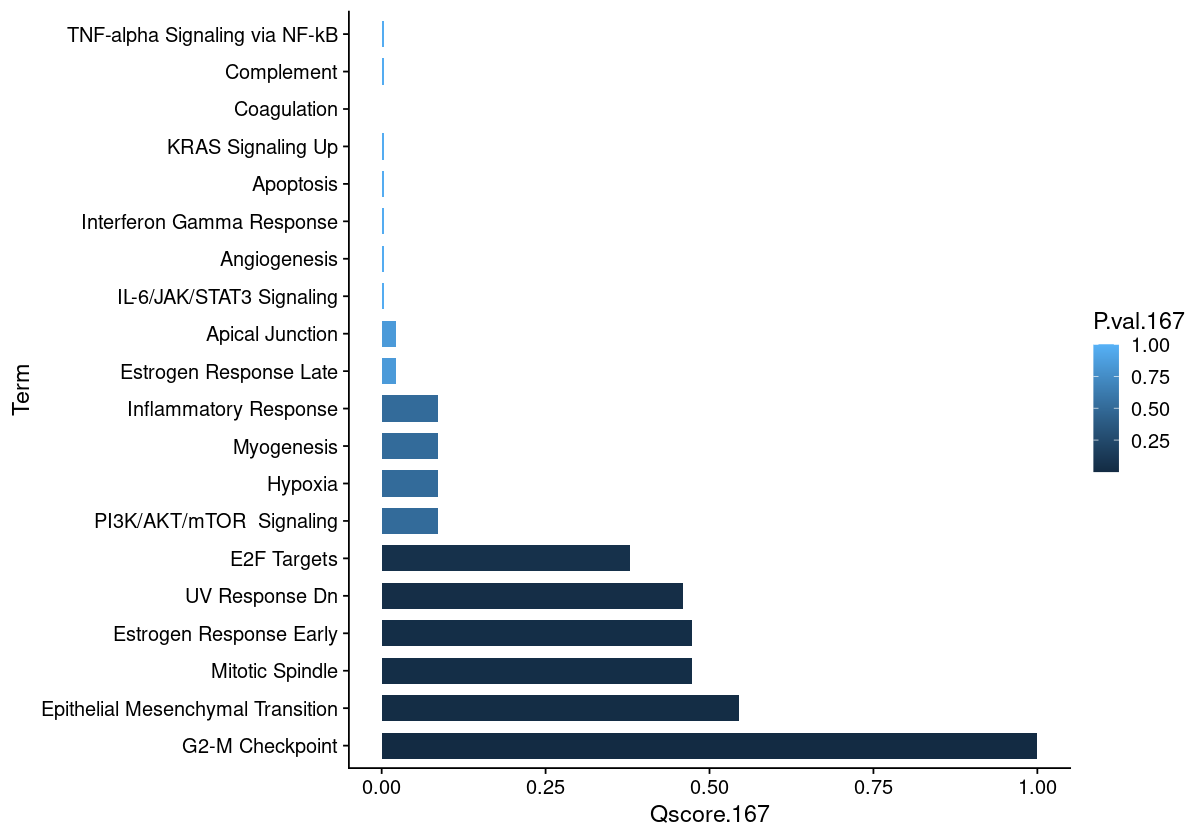

In [98]:
ggplot(t20.167.S410, aes(x = Term , y =  Qscore.167, 
                                  fill=P.val.167)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 0.5)) + coord_flip()


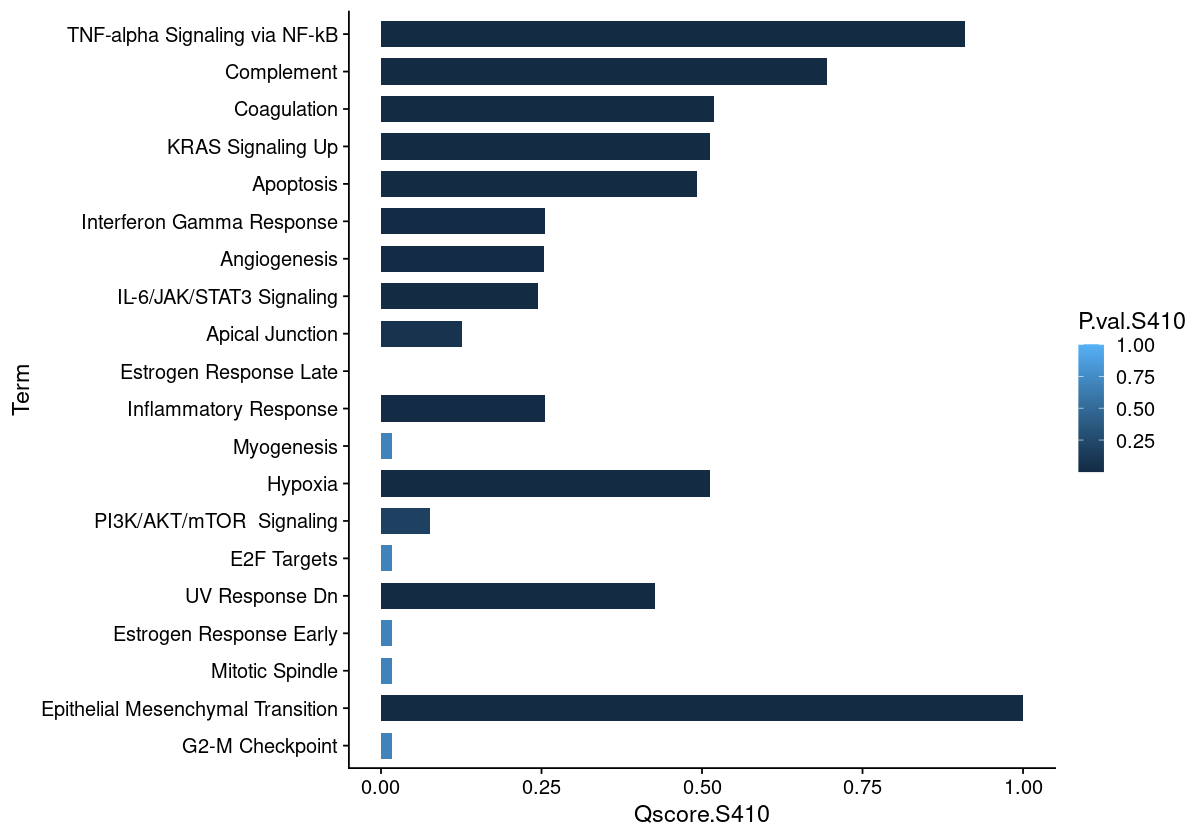

In [99]:
ggplot(t20.167.S410, aes(x = Term , y =  Qscore.S410, 
                                  fill=P.val.S410)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 0.5)) + coord_flip()


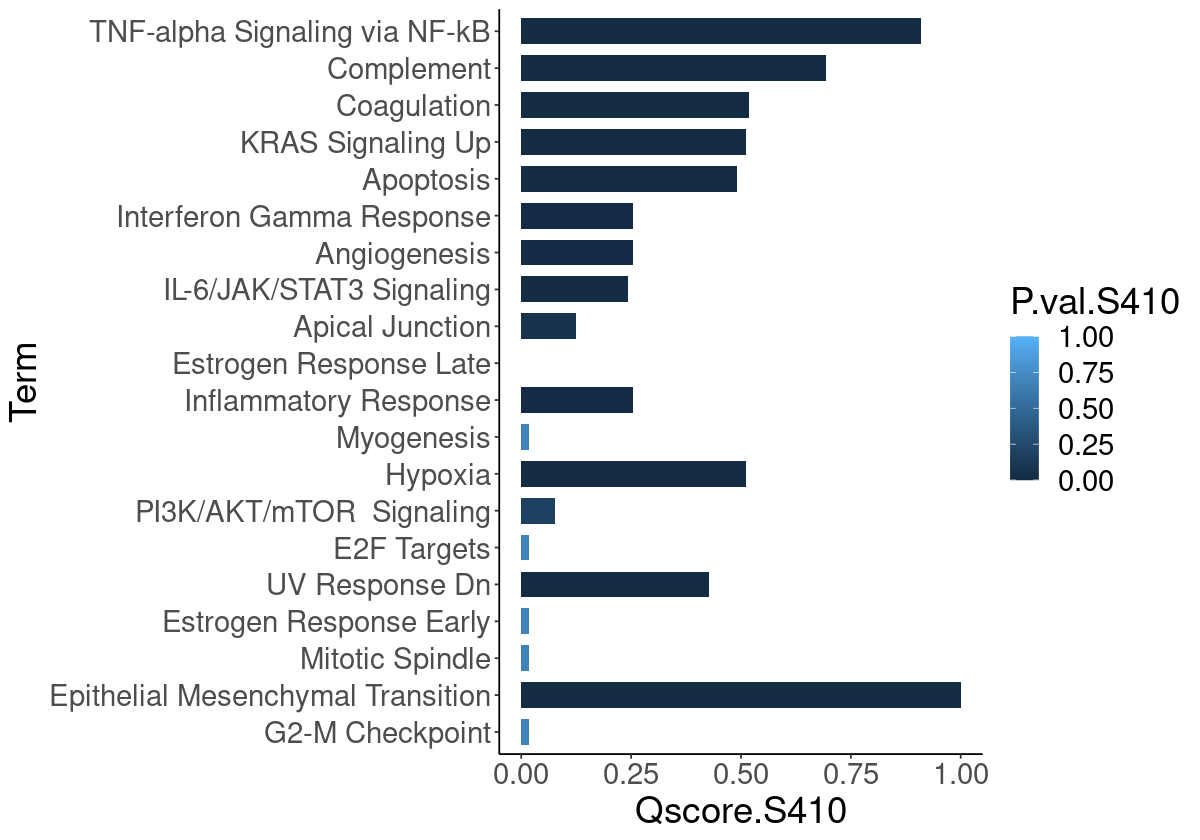

In [113]:
ggplot(t20.167.S410, aes(x = Term, y = Qscore.S410, fill = P.val.S410)) +
  geom_col(width = 0.7) +
  scale_fill_gradient(limits = c(0, 1)) +  # Use scale_fill_gradient for color fill
  coord_flip() +
  theme_bw() +
  theme(
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(colour = "black"),
    text = element_text(size = 22, color = "black")  # Adjust the text size and color
  )

In [79]:
mark.322_S914

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster
MKI67        0.000000e+00  1.8790702 0.598 0.180  0.000000e+00 shared 
TPX2         0.000000e+00  1.6259749 0.517 0.143  0.000000e+00 shared 
ASPM         0.000000e+00  1.3962390 0.500 0.142  0.000000e+00 shared 
GTSE1        0.000000e+00  0.8191220 0.515 0.176  0.000000e+00 shared 
PRKN        4.440842e-298 -0.7874072 0.471 0.729 8.881684e-295 shared 
CKAP2       5.727209e-287  0.7540458 0.472 0.129 1.145442e-283 shared 
TOP2A       3.435567e-286  1.8543537 0.512 0.132 6.871133e-283 shared 
PLXDC2      2.115102e-281 -0.8450414 0.731 0.822 4.230204e-278 shared 
ANLN        1.948684e-272  1.4886966 0.508 0.159 3.897369e-269 shared 
TUBA1B      1.134791e-267  1.8837064 0.654 0.369 2.269581e-264 shared 
KIFC1       3.178125e-267  1.0396596 0.535 0.237 6.356250e-264 shared 
CCNA2       3.316513e-245  0.6348433 0.371 0.069 6.633027e-242 shared 
AF165147.1  6.119668e-239 -0.8029124 0.648 0.821 1.223934e-235 shared 
MAGI2       3.023445e-238 -0.7588088 0.622 0.806 6.046889e-235 shared 
KIF18B      2.529524e-235  0.4650959 0.422 0.096 5.059048e-232 shared 
DIAPH3      3.343177e-232  1.9100453 0.560 0.276 6.686354e-229 shared 
STMN1       4.558405e-224  1.5799919 0.525 0.174 9.116810e-221 shared 
CDCA2       1.107016e-222  0.6711446 0.426 0.102 2.214031e-219 shared 
LINC00882   1.490047e-221 -0.7290990 0.477 0.704 2.980094e-218 shared 
SHCBP1      3.445733e-220  0.6850352 0.406 0.107 6.891465e-217 shared 
BUB1B       7.801278e-220  0.5770709 0.448 0.185 1.560256e-216 shared 
HJURP       8.433454e-220  0.3336055 0.343 0.075 1.686691e-216 shared 
RRM2        4.463367e-218  1.0306508 0.458 0.139 8.926734e-215 shared 
BUB1        8.414050e-217  0.7268012 0.437 0.159 1.682810e-213 shared 
WDR62       3.208109e-211  0.2709942 0.445 0.174 6.416219e-208 shared 
KIF14       2.446562e-209  0.8076478 0.420 0.127 4.893125e-206 shared 
UBE2E2      1.131724e-206 -0.6123376 0.694 0.860 2.263448e-203 shared 
NUSAP1      6.029168e-201  0.9907656 0.439 0.106 1.205834e-197 shared 
NUF2        3.666856e-197  1.2602384 0.439 0.137 7.333712e-194 shared 
H2AFZ       3.990657e-197  1.2532418 0.497 0.162 7.981314e-194 shared 
⋮           ⋮             ⋮          ⋮     ⋮     ⋮             ⋮      
CR1.1       1.169744e-06   0.4188582 0.109 0.159 0.002339489   S914   
RXFP1.1     1.816361e-06   0.3128203 0.312 0.325 0.003632721   S914   
THSD4.1     2.184074e-06  -0.4213254 0.151 0.277 0.004368148   S914   
NIBAN1.1    3.471560e-06  -0.4376535 0.266 0.376 0.006943120   S914   
PIEZO2.1    6.168782e-06  -0.3302052 0.403 0.490 0.012337564   S914   
TNS3.1      7.483078e-06   0.3152742 0.520 0.571 0.014966156   S914   
HSPD1.1     1.152900e-05   0.3603655 0.678 0.719 0.023057995   S914   
NAV2.1      1.194593e-05  -1.1001703 0.724 0.720 0.023891867   S914   
ADAMTS4.1   4.879588e-05  -0.2806364 0.212 0.337 0.097591769   S914   
BRCA2.1     5.418977e-05  -0.3945679 0.317 0.418 0.108379530   S914   
LYN.1       5.938059e-05   0.2542725 0.107 0.077 0.118761175   S914   
LINC00278.1 6.641514e-05   0.2559649 0.114 0.120 0.132830275   S914   
WARS.1      9.308309e-05  -0.3013334 0.671 0.708 0.186166173   S914   
ZFAND2A.1   1.374096e-04   0.2692381 0.350 0.402 0.274819254   S914   
PIK3R3.1    2.367637e-04  -0.3049547 0.156 0.288 0.473527317   S914   
GAS2L3.1    2.616892e-04  -0.3941134 0.333 0.420 0.523378370   S914   
FLNB.1      3.268699e-04  -0.4850714 0.587 0.615 0.653739711   S914   
CENPP.1     3.349282e-04  -0.2713189 0.671 0.643 0.669856328   S914   
HSPH1.1     6.444873e-04   0.9164237 0.528 0.634 1.000000000   S914   
DOCK8.1     8.092820e-04   0.2761403 0.351 0.377 1.000000000   S914   
DMXL2.1     1.121608e-03   0.3106520 0.364 0.452 1.000000000   S914   
CD163.1     1.340375e-03   0.3035441 0.216 0.266 1.000000000   S914   
HSPB1.1     1.919329e-03  -0.2654085 0.721 0.719 1.000000000   S914   
CLSTN2.1    3.235711e-03  -0.2894719 0.487 0.501 1.000000000   S914   
ABCC6.1     3.574037e-03   0.2949754

In [106]:
genes = mark.322_S914[mark.322_S914$cluster == "shared" & mark.322_S914$p_val_adj < 0.05 & 
              mark.322_S914$avg_log2FC >0, ]$gene

print(genes)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_167 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
h_mut_enr_shared <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))


h_mut_enr_shared





  [1] "MKI67"      "TPX2"       "ASPM"       "GTSE1"      "CKAP2"     
  [6] "TOP2A"      "ANLN"       "TUBA1B"     "KIFC1"      "CCNA2"     
 [11] "KIF18B"     "DIAPH3"     "STMN1"      "CDCA2"      "SHCBP1"    
 [16] "BUB1B"      "HJURP"      "RRM2"       "BUB1"       "WDR62"     
 [21] "KIF14"      "NUSAP1"     "NUF2"       "H2AFZ"      "ARHGEF39"  
 [26] "CKAP2L"     "NCAPG"      "PRC1"       "CENPF"      "KIF11"     
 [31] "KIF2C"      "AC091057.6" "HIST1H4C"   "KIF4A"      "POLQ"      
 [36] "SPAG5"      "MELK"       "LGALS1"     "KIF24"      "CDKN3"     
 [41] "HMGB2"      "CENPL"      "IQGAP3"     "KNL1"       "ZNF367"    
 [46] "AURKA"      "ARHGAP11A"  "CDCA8"      "KIF15"      "UBE2S"     
 [51] "DEPDC1"     "CENPE"      "CKS2"       "KIF20B"     "SMC4"      
 [56] "RACGAP1"    "HMMR"       "UBE2C"      "AURKB"      "CCNB1"     
 [61] "APOD"       "ACTN1"      "PRR11"      "UBALD2"     "NEIL3"     
 [66] "A2M"        "RGS3"       "BRIP1"      "E2F7"       "TACC3"     
 [71] 

[1] 30 10

[1] 1063   10

Term                              Overlap P.value      Adjusted.P.value
1  G2-M Checkpoint                   47/200  1.254004e-54 3.762011e-53    
2  E2F Targets                       39/200  1.002222e-41 1.503333e-40    
3  Mitotic Spindle                   24/199  1.238345e-20 1.238345e-19    
4  Spermatogenesis                   9/135   2.973912e-06 2.230434e-05    
5  mTORC1 Signaling                  6/200   8.423155e-03 3.609924e-02    
6  Epithelial Mesenchymal Transition 6/200   8.423155e-03 3.609924e-02    
7  Glycolysis                        6/200   8.423155e-03 3.609924e-02    
8  Cholesterol Homeostasis           3/74    2.714245e-02 1.017842e-01    
9  Estrogen Response Late            5/200   3.147279e-02 1.049093e-01    
10 Myogenesis                        4/200   9.897276e-02 2.969183e-01    
11 Fatty Acid Metabolism             3/158   1.610352e-01 4.391870e-01    
12 Androgen Response                 2/100   2.180559e-01 4.506776e-01    
13 TNF-alpha Signaling via NF-kB     3/200   2.553840e-01 4.506776e-01    
14 Estrogen Response Early           3/200   2.553840e-01 4.506776e-01    
15 Apical Junction                   3/200   2.553840e-01 4.506776e-01    
16 Myc Targets V1                    3/200   2.553840e-01 4.506776e-01    
17 KRAS Signaling Up                 3/200   2.553840e-01 4.506776e-01    
18 UV Response Dn                    2/144   3.596738e-01 5.994563e-01    
19 Apoptosis                         2/161   4.123606e-01 6.510957e-01    
20 IL-6/JAK/STAT3 Signaling          1/87    5.352494e-01 8.028741e-01    
21 Pperoxisome                       1/104   6.000336e-01 8.225349e-01    
22 PI3K/AKT/mTOR  Signaling          1/105   6.035516e-01 8.225349e-01    
23 Unfolded Protein Response         1/113   6.306101e-01 8.225349e-01    
24 Coagulation                       1/138   7.038835e-01 8.290760e-01    
25 DNA Repair                        1/150   7.337260e-01 8.290760e-01    
26 Hypoxia                           1/200   8.290760e-01 8.290760e-01    
27 Adipogenesis                      1/200   8.290760e-01 8.290760e-01    
28 Xenobiotic Metabolism             1/200   8.290760e-01 8.290760e-01    
29 Oxidative Phosphorylation         1/200   8.290760e-01 8.290760e-01    
30 KRAS Signaling Dn                 1/200   8.290760e-01 8.290760e-01    
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0           0                    47.2111928 5859.5347547  
2  0           0                    35.0244794 3306.4428751  
3  0           0                    17.8467360  818.0573732  
4  0           0                     8.4763339  107.8667099  
5  0           0                     3.5925700   17.1608835  
6  0           0                     3.5925700   17.1608835  
7  0           0                     3.5925700   17.1608835  
8  0           0                     4.8527678   17.5022663  
9  0           0                     2.9607843   10.2402632  
10 0           0                     2.3426423    5.4183223  
11 0           0                     2.2134284    4.0420128  
12 0           0                     2.3271204    3.5442136  
13 0           0                     1.7378114    2.3720901  
14 0           0                     1.7378114    2.3720901  
15 0           0                     1.7378114    2.3720901  
16 0           0                     1.7378114    2.3720901  
17 0           0                     1.7378114    2.3720901  
18 0           0                     1.6024587    1.6386066  
19 0           0                     1.4298906    1.2666786  
20 0           0                     1.3190992    0.8244666  
21 0           0                     1.1004352    0.5620688  
22 0           0                     1.0897989    0.5502653  
23 0           0                     1.0115456    0.4663909  
24 0           0                     0.8259082    0.2900115  
25 0           0                     0.7589293    0.2349794  
26 0           0                     0.5667995    0.1062428  
27 0

In [107]:
genes = mark.322_S914[mark.322_S914$cluster == "S914" & mark.322_S914$p_val_adj < 0.05 & 
              mark.322_S914$avg_log2FC >0, ]$gene

print(genes)
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_167 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
h_mut_enr_S914 <- mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))


h_mut_enr_S914

  [1] "PRKN"       "PLXDC2"     "AF165147.1" "MAGI2"      "LINC00882" 
  [6] "UBE2E2"     "RORA"       "SEMA3C"     "SAMD4A"     "PDE4B"     
 [11] "ADH1B"      "KCNH1"      "DISC1"      "DMD"        "AC104123.1"
 [16] "SOX5"       "PPARGC1A"   "AOAH"       "KYNU"       "TSHZ2"     
 [21] "KDM7A"      "DOCK4"      "MCC"        "ADAMTSL1"   "CAMKMT"    
 [26] "PPM1L"      "AL139383.1" "MTSS1"      "STARD13"    "PCOLCE2"   
 [31] "LINC01915"  "WWOX"       "AC109466.1" "ARL15"      "PLCB1"     
 [36] "LINC01482"  "LMCD1"      "GULP1"      "LGMN"       "BBOX1-AS1" 
 [41] "NAV3"       "AC013652.1" "FOXP2"      "AL162414.1" "ITSN1"     
 [46] "LDLRAD4"    "LINC02476"  "OSMR"       "AC016987.1" "AL049828.1"
 [51] "KLHL29"     "CELF2"      "P4HA1"      "LINC02328"  "DIRC3"     
 [56] "AC097460.1" "ROR1"       "GRIN2A"     "DAB1"       "AC079804.3"
 [61] "KCNMA1"     "LRMDA"      "AFF3"       "PXDNL"      "SIGLEC1"   
 [66] "ELL2"       "AC109927.1" "PCSK5"      "SGO1-AS1"   "LIMCH1"    
 [71] 

[1] 38 10

[1] 1325   10

Term                              Overlap P.value      Adjusted.P.value
1  TNF-alpha Signaling via NF-kB     8/200   0.0002212159 0.008406204     
2  Hypoxia                           6/200   0.0056802615 0.053962484     
3  Complement                        6/200   0.0056802615 0.053962484     
4  Inflammatory Response             6/200   0.0056802615 0.053962484     
5  mTORC1 Signaling                  5/200   0.0230375965 0.145904778     
6  p53 Pathway                       5/200   0.0230375965 0.145904778     
7  UV Response Dn                    4/144   0.0291965417 0.157704924     
8  IL-6/JAK/STAT3 Signaling          3/87    0.0332010367 0.157704924     
9  Androgen Response                 3/100   0.0470094530 0.198484357     
10 Mitotic Spindle                   4/199   0.0773319904 0.270974684     
11 Myogenesis                        4/200   0.0784400401 0.270974684     
12 Pperoxisome                       2/104   0.2042325192 0.433306481     
13 PI3K/AKT/mTOR  Signaling          2/105   0.2071697890 0.433306481     
14 IL-2/STAT5 Signaling              3/199   0.2161960569 0.433306481     
15 Interferon Gamma Response         3/200   0.2182938646 0.433306481     
16 Epithelial Mesenchymal Transition 3/200   0.2182938646 0.433306481     
17 Glycolysis                        3/200   0.2182938646 0.433306481     
18 Allograft Rejection               3/200   0.2182938646 0.433306481     
19 KRAS Signaling Up                 3/200   0.2182938646 0.433306481     
20 Notch Signaling                   1/32    0.2280560429 0.433306481     
21 Fatty Acid Metabolism             2/158   0.3639538217 0.588465050     
22 UV Response Up                    2/158   0.3639538217 0.588465050     
23 Apoptosis                         2/161   0.3726134174 0.588465050     
24 Myc Targets V2                    1/58    0.3746604675 0.588465050     
25 Cholesterol Homeostasis           1/74    0.4507536137 0.588465050     
26 Adipogenesis                      2/200   0.4800635937 0.588465050     
27 Estrogen Response Early           2/200   0.4800635937 0.588465050     
28 Estrogen Response Late            2/200   0.4800635937 0.588465050     
29 Xenobiotic Metabolism             2/200   0.4800635937 0.588465050     
30 heme Metabolism                   2/200   0.4800635937 0.588465050     
31 KRAS Signaling Dn                 2/200   0.4800635937 0.588465050     
32 Interferon Alpha Response         1/97    0.5442922852 0.646347089     
33 Bile Acid Metabolism              1/112   0.5965804793 0.670416436     
34 Unfolded Protein Response         1/113   0.5998462848 0.670416436     
35 Coagulation                       1/138   0.6734741741 0.731200532     
36 DNA Repair                        1/150   0.7038651979 0.742968820     
37 G2-M Checkpoint                   1/200   0.8030171440 0.803017144     
38 Myc Targets V1                    1/200   0.8030171440 0.803017144     
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1  0           0                    5.3504902  45.0317132    
2  0           0                    3.9198537  20.2686148    
3  0           0                    3.9198537  20.2686148    
4  0           0                    3.9198537  20.2686148    
5  0           0                    3.2287968  12.1745910    
6  0           0                    3.2287968  12.1745910    
7  0           0                    3.5848954  12.6679627    
8  0           0                    4.4654159  15.2055190    
9  0           0                    3.8644134  11.8150830    
10 0           0                    2.5665850   6.5695531    
11 0           0                    2.5533602   6.4993761    
12 0           0                    2.4339623   3.8663396    
13 0           0                    2.4102094   3.7941917    
14 0           0                    1.9028998   2.9144235    
15 0           0                    1.8931440   2.8812007    
16 0           0                    1.8931440   2.8812007    
17 0           0        

In [108]:
h_mut_enr_S914_t <- h_mut_enr_S914[rev(rownames(h_mut_enr_S914)),]

pathways<- (unique(c(h_mut_enr_shared[1:12,]$Term, tail(h_mut_enr_S914_t, n = 11)$Term)))

length(pathways)
pathways

[1] 19

[1] "G2-M Checkpoint"                   "E2F Targets"                      
 [3] "Mitotic Spindle"                   "Spermatogenesis"                  
 [5] "mTORC1 Signaling"                  "Epithelial Mesenchymal Transition"
 [7] "Glycolysis"                        "Cholesterol Homeostasis"          
 [9] "Estrogen Response Late"            "Myogenesis"                       
[11] "Fatty Acid Metabolism"             "Androgen Response"                
[13] "IL-6/JAK/STAT3 Signaling"          "UV Response Dn"                   
[15] "p53 Pathway"                       "Inflammatory Response"            
[17] "Complement"                        "Hypoxia"                          
[19] "TNF-alpha Signaling via NF-kB"

In [109]:
t20.322.S914 <- (h_mut_enr_shared[h_mut_enr_shared$Term %in% pathways,])
rownames(t20.322.S914) <- t20.322.S914$Term
t20.322.S914<- t20.322.S914[pathways,]
temp <- t20.322.S914[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
t20.322.S914 <- t20.322.S914[,c()]
t20.322.S914$P.val.S914 <- temp$Adjusted.P.value
t20.322.S914$Qscore.S914 <- temp$qscore
temp <- (h_mut_enr_S914_t[h_mut_enr_S914_t$Term %in% pathways,])
rownames(temp) <- temp$Term
temp<- temp[pathways,]
t20.322.S914$P.val.322 <- temp$Adjusted.P.value
t20.322.S914$Qscore.322 <- temp$qscore
t20.322.S914$Qscore.322[is.na(t20.322.S914$Qscore.322)] <- 0
t20.322.S914$P.val.322[is.na(t20.322.S914$P.val.322)] <- 0.5
t20.322.S914$Qscore.S914[is.na(t20.322.S914$Qscore.S914)] <- 0
t20.322.S914$P.val.S914[is.na(t20.322.S914$P.val.S914)] <- 0.5

library("scales")
 
t20.322.S914$Qscore.322 <- rescale(t20.322.S914$Qscore.322, to=c(0,1))
t20.322.S914$Qscore.S914 <- rescale(t20.322.S914$Qscore.S914, to=c(0,1))

rownames(t20.322.S914) <- pathways
t20.322.S914

P.val.S914   Qscore.S914 P.val.322  
G2-M Checkpoint                   3.762011e-53 1.000000000 0.803017144
E2F Targets                       1.503333e-40 0.759623537 0.500000000
Mitotic Spindle                   1.238345e-19 0.360654458 0.270974684
Spermatogenesis                   2.230434e-05 0.088729575 0.500000000
mTORC1 Signaling                  3.609924e-02 0.027515757 0.145904778
Epithelial Mesenchymal Transition 3.609924e-02 0.027515757 0.433306481
Glycolysis                        3.609924e-02 0.027515757 0.433306481
Cholesterol Homeostasis           1.017842e-01 0.018928520 0.588465050
Estrogen Response Late            1.049093e-01 0.018677995 0.588465050
Myogenesis                        2.969183e-01 0.010059462 0.270974684
Fatty Acid Metabolism             4.391870e-01 0.006816470 0.588465050
Androgen Response                 4.506776e-01 0.006602514 0.198484357
IL-6/JAK/STAT3 Signaling          8.028741e-01 0.001818852 0.157704924
UV Response Dn                    5.994563e-01 0.004239279 0.157704924
p53 Pathway                       5.000000e-01 0.000000000 0.145904778
Inflammatory Response             5.000000e-01 0.000000000 0.053962484
Complement                        5.000000e-01 0.000000000 0.053962484
Hypoxia                           8.290760e-01 0.001552814 0.053962484
TNF-alpha Signaling via NF-kB     4.506776e-01 0.006602514 0.008406204
                                  Qscore.322
G2-M Checkpoint                   0.0459069 
E2F Targets                       0.0000000 
Mitotic Spindle                   0.2732347 
Spermatogenesis                   0.0000000 
mTORC1 Signaling                  0.4027804 
Epithelial Mesenchymal Transition 0.1750047 
Glycolysis                        0.1750047 
Cholesterol Homeostasis           0.1109566 
Estrogen Response Late            0.1109566 
Myogenesis                        0.2732347 
Fatty Acid Metabolism             0.1109566 
Androgen Response                 0.3383799 
IL-6/JAK/STAT3 Signaling          0.3865061 
UV Response Dn                    0.3865061 
p53 Pathway                       0.4027804 
Inflammatory Response             0.6109222 
Complement                        0.6109222 
Hypoxia                           0.6109222 
TNF-alpha Signaling via NF-kB     1.0000000

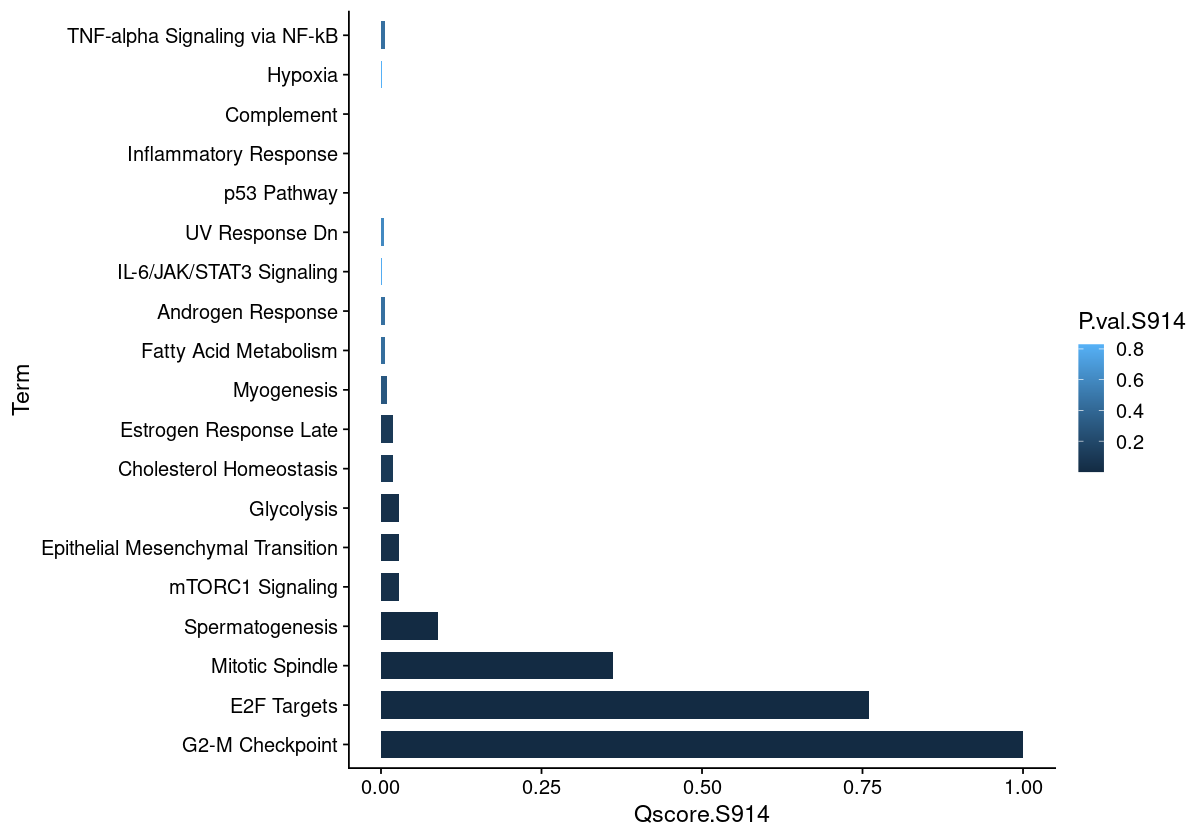

In [110]:
#t20.167.S410 <- t20.322.S914[rev(rownames(t20.167.S410)),]

t20.322.S914$Term <- rownames(t20.322.S914)


t20.322.S914$Term <- factor(t20.322.S914$Term, levels = t20.322.S914$Term)

ggplot(t20.322.S914, aes(x = Term , y =  Qscore.S914, 
                                  fill=P.val.S914)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 0.5)) + coord_flip()


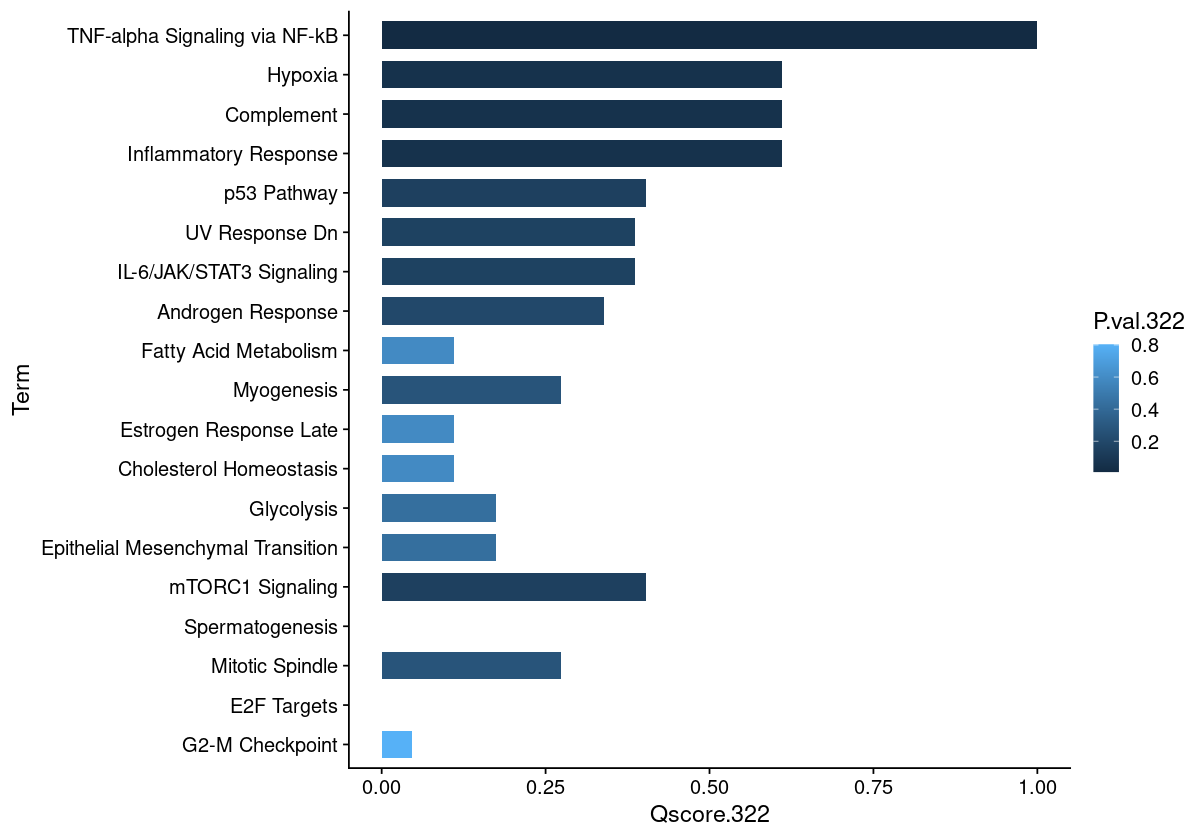

In [111]:

t20.322.S914$Term <- rownames(t20.322.S914)


t20.322.S914$Term <- factor(t20.322.S914$Term, levels = t20.322.S914$Term)

ggplot(t20.322.S914, aes(x = Term , y =   Qscore.322 , 
                                  fill=P.val.322)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 0.5)) + coord_flip()

In [86]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)


genes = c('DACH2','NCAPG','CDH6',
          'KCNQ3','MARCH1','AC073050.1','PTCHD1-AS',
          'PI15','AC010967.1','FYB1','MRC1','SNHG31',
          'SPC25','CENPE','KCNMB2','KCNN2')

# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature

#CHANGE Your DATABASES ACCORDINGLY
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)

mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="GSEA_ouput.csv")
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"

#plot top 25 GSEA
h_mut_enr <- mut_enr[1:25,]#[1:500,]


ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+
                              ggtitle(paste("TITLE HERE")) +
                              xlab("qscore") + ylab("Description")
pdf(paste0("object_pdf.pdf"), width = 10, height = 10)
print(myggp)
dev.off()


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



geneCoverage genesPerTerm libraryName                     
1 13362         275         Genome_Browser_PWMs             
2 27884        1284         TRANSFAC_and_JASPAR_PWMs        
3  6002          77         Transcription_Factor_PPIs       
4 47172        1370         ChEA_2013                       
5 47107         509         Drug_Perturbations_from_GEO_2014
6 21493        3713         ENCODE_TF_ChIP-seq_2014         
  link                                                     numTerms
1 http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/ 615     
2 http://jaspar.genereg.net/html/DOWNLOAD/                 326     
3                                                          290     
4 http://amp.pharm.mssm.edu/lib/cheadownload.jsp           353     
5 http://www.ncbi.nlm.nih.gov/geo/                         701     
6 http://genome.ucsc.edu/ENCODE/downloads.html             498     
  appyter                                  categoryId
1 ea115789fcbf12797fd692cec6df0ab4dbc79c6a 1         
2 7d42eb43a64a4e3b20d721fc7148f685b53b6b30 1         
3 849f222220618e2599d925b6b51868cf1dab3763 1         
4 7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630 7         
5 ad270a6876534b7cb063e004289dcd4d3164f342 7         
6 497787ebc418d308045efb63b8586f10c526af51 7

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1]  7 10

[1] 66 10

[1] 73 10

png 
  2